
# **AIML Capstone Project: Automatic Ticket Assignment(NLP)**

## **Problem Statement**


---


One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the
Business operations. IT leverages Incident Management process to achieve the
above Objective. An incident is something that is unplanned interruption to an IT service or
reduction in the quality of an IT service that affects the Users and the Business. The main goal
of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the
interruption and restores the service to its full capacity to ensure no business impact. In most of the
organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have
access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the
incidents to the appropriate person or unit in the support team has critical importance to provide
improved user satisfaction while ensuring better allocation of support resources. The assignment of
incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual
assignment of incidents is time consuming and requires human efforts. There may be mistakes due to
human errors and resource consumption is carried out ineffectively because of
the misaddressing. On the other hand, manual assignment increases the response and resolution times
which result in user satisfaction deterioration / poor customer service.

### **Business Domain Value**


---



---


In the support process, incoming incidents are analyzed and assessed by organization’s support teams to
fulfill the request. In many organizations, better allocation and effective usage of the valuable support
resources will directly result in substantial cost savings.
Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring
Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This
team will review the incidents for right ticket categorization, priorities and then carry out initial
diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase
L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from
Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams
by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve
the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support
is needed, they will reach out for their support towards incident closure.
L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to
Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket
assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed
only for incident assignment to L3 teams.

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple
instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are
wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right
functional groups. During this process, some of the incidents are in queue and not addressed timely
resulting in poor customer service

Guided by powerful AI techniques that can classify incidents to right functional groups can help
organizations to reduce the resolving time of the issue and can focus on more productive tasks.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Project Description & Dataset**

Details about the data and dataset files are given in below link,
https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ


  *   Pre-Processing, Data Visualization and EDA:
      *   Exploring the given Data files.
      *   Understanding the structure of data.
      *   Missing points in data.
      *   Finding inconsistencies in the data.
      *   Visualizing different patterns.
      *   Visualizing different text features.
      *   Dealing with missing values.
      *   Text preprocessing.
      *   Creating word vocabulary from the corpus of report text data.
      *   Creating tokens as required.

  *   Model Building:
      *   Building a model architecture which can classify.
      *   Trying different model architectures by researching state of the art for similar tasks.
      *   Train the model.
      *   To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

  *   Test the Model, Fine-tuning and Repeat:
      *   Test the model and report as per evaluation metrics.
      *   Try different models.
      *   Try different evaluation metrics.
      *   Set different hyper parameters, by trying different. optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them.
      *   Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.


### **Goal**

In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.

### **Project Objectives**

The objective of the project is,
 *   Learn how to use different classification models.
 *   Use transfer learning to use pre-built models.
 *   Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.
 *   Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.


In [ ]:
# Setting the current working directory
import os; os.chdir('/content/drive/My Drive/AIML/CapstoneProject')

In [ ]:
#Install libraries which are not available
!pip install preprocessing
!pip install googletrans
!pip install langdetect
!pip install -U gensim
!pip install ftfy wordcloud goslate spacy plotly cufflinks nltk rake-nltk fasttext pyLDAvisa

In [ ]:
#Install libraries which are not available
!pip install -U imbalanced-learn
!pip install nltk rake-nltk
!pip install -U scikit-learn
!pip install six
!pip install mlrose fasttext

### **Load the dataset & Libraries**

Here the dataset is an excel file and use pandas library to load the excel file(dataset)
 to a pandas dataframe.

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [ ]:
# Import packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, tensorflow as tf
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

import random, re
assert tf.__version__ >= '2.0'
%matplotlib inline

from preprocessing import *
from itertools import islice

# Models
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Set random state
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [ ]:
# Loading Dataset
tickets_df = pd.read_excel('input_data.xlsx')
print(f'Data has {tickets_df.shape[0]} rows and {tickets_df.shape[1]} columns. Here are the first five rows of the data...')
print("\n")
display(tickets_df.head())
print("\n")
print("\nHere are the last five rows of the data...\n")
display(tickets_df.tail())

Data has 8500 rows and 4 columns. Here are the first five rows of the data...




Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]




Here are the last five rows of the data...



Short description  ... Assignment group
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[5 rows x 4 columns]

### **Pre-Processing(Feature Engineering and Selection), Data Visualization and EDA**

#### **Why is data pre-processing required?**

In any Machine Learning process, Data Preprocessing is that step in which the data gets transformed, or Encoded, to bring it to such a state that now the machine can easily parse it. In other words, the features of the data can now be easily interpreted by the algorithm.

#### **What is Feature Engineering and selection?**

Feature engineering: The process of creating new features from raw data to increase the predictive power of the learning algorithm. Engineered features should capture additional information that is not easily apparent in the original feature set.

Feature selection: The process of selecting the key subset of features to reduce the dimensionality of the training problem.

#### **Why data visualization for EDA required?**

It provides a high-level interface for drawing attractive and informative statistical graphics. Data visualization is an important part of analysis since it allows even non-programmers to be able to decipher trends and patterns


Here, we start by identifying the basic traits of the data that is rows and columns

In [ ]:
#Shape & Size of the dataset
print('No of rows:\033[1m', tickets_df.shape[0], '\033[0m')
print('No of cols:\033[1m', tickets_df.shape[1], '\033[0m')

No of rows: 8500 
No of cols: 4 


In [ ]:
#info on dataset
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


#### **Feature Description**

  1.   Short description: Ticket Issue title or short desciption about the issue. Sometimes, the issue is understood from short desciption itself.

  2.   Description: Detailed explanation of issue and the scenario.

  3.   Caller: The person who raised the ticket or raised it behalf of someone.
  
  4.   Assignment group: The group/category to which the ticket is assigned.




In [ ]:
#detail info on dataset
tickets_df.describe().T

count unique                top  freq
Short description  8492   7481     password reset    38
Description        8499   7817                the    56
Caller             8500   2950  bpctwhsn kzqsbmtp   810
Assignment group   8500     74              GRP_0  3976

In [ ]:
# Find out the null value counts in each column
tickets_df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

## **Initial observaion of data set**


1. We observe that all columns don't have 8500 non null values, means there are null vales in data that we have to take care of We can observe that the data is higly imbalanced & skewed.

2. Total records: 8500 & Total Attributes: 4

3. Since our goal is automatic ticket assignment, It doesn't depend on the caller. Also a caller can raise tickets for any issue he/she is facing. Therefore, we can ignore the caller attribute/feature for further detail analysis.

4. There are 8 records with null value in short description and 1 record with null value in description.

5. One user/caller has raised 810 tickets.

6. There are 74 unique groups and the group GRP_0 has been assigned 3976 tickets. GRP_0 has maximum instances around ~40%

7. Top description is just the word 'the' which also we have to take care of.

8. Short description & description count doesn't match with the total no of callers or assigned groups.

9. Password Reset is one of the most occuring ticket topic.



In [ ]:
# Check the records with null values
tickets_df[pd.isnull(tickets_df).any(axis=1)]

Short description  ... Assignment group
2604                       NaN  ...           GRP_34
3383                       NaN  ...            GRP_0
3906                       NaN  ...            GRP_0
3910                       NaN  ...            GRP_0
3915                       NaN  ...            GRP_0
3921                       NaN  ...            GRP_0
3924                       NaN  ...            GRP_0
4341                       NaN  ...            GRP_0
4395  i am locked out of skype  ...            GRP_0

[9 rows x 4 columns]



---


Now we will be dropping the caller attribute from the data set since it doesn't make an impact in our task of automatic ticket assignment, and then find out the unique groups that are there in the data

In [ ]:
# Drop the 'Caller' attribute, since it doesn't make an impact in our task of automatic ticket assignment
df_incidents = tickets_df.drop('Caller',axis=1)

In [ ]:
#Unique Groups
unique_grp = df_incidents['Assignment group'].unique()
unique_grp

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)



---


Here we are creating a dataframe which shows us the percentage of data present
in the given groups

In [ ]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

index  Assignment group  percentage
0   GRP_0              3976   46.776471
1   GRP_8               661    7.776471
2  GRP_24               289    3.400000
3  GRP_12               257    3.023529
4   GRP_9               252    2.964706

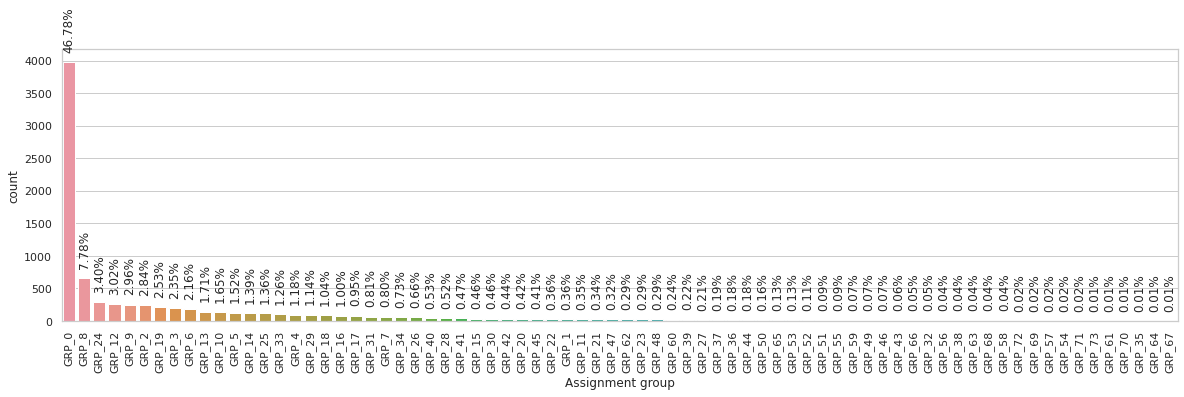

In [ ]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

This plot above, shows the percentage of data distribution across different groups within the data. The data below shows us the top 20 groups that have the most number of records.

In [ ]:
df_top_20 = df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

index  Assignment group
0    GRP_0              3976
1    GRP_8               661
2   GRP_24               289
3   GRP_12               257
4    GRP_9               252
5    GRP_2               241
6   GRP_19               215
7    GRP_3               200
8    GRP_6               184
9   GRP_13               145
10  GRP_10               140
11   GRP_5               129
12  GRP_14               118
13  GRP_25               116
14  GRP_33               107
15   GRP_4               100
16  GRP_29                97
17  GRP_18                88
18  GRP_16                85
19  GRP_17                81

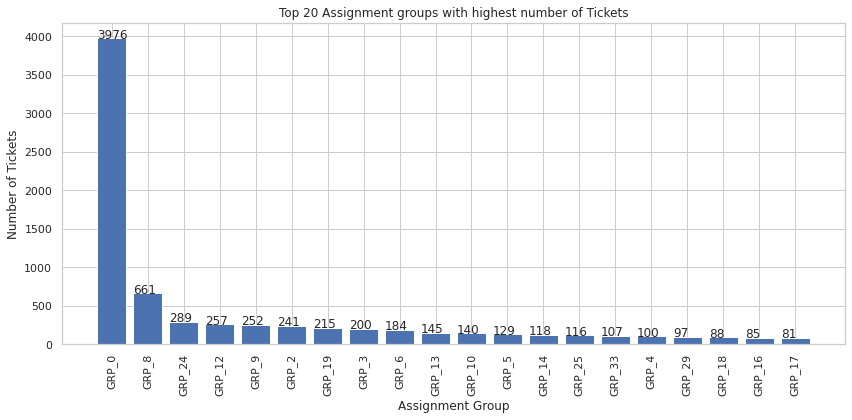

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

Here we have the plot of the top 20 groups that have the data assigned to them.

Below, we are checking the data that has the least number of groups assigned.

In [ ]:
df_bottom_20 = df_incidents['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

index  Assignment group
0   GRP_73                 1
1   GRP_61                 1
2   GRP_70                 1
3   GRP_35                 1
4   GRP_64                 1
5   GRP_67                 1
6   GRP_72                 2
7   GRP_69                 2
8   GRP_57                 2
9   GRP_54                 2
10  GRP_71                 2
11  GRP_56                 3
12  GRP_38                 3
13  GRP_63                 3
14  GRP_68                 3
15  GRP_58                 3
16  GRP_66                 4
17  GRP_32                 4
18  GRP_43                 5
19  GRP_59                 6

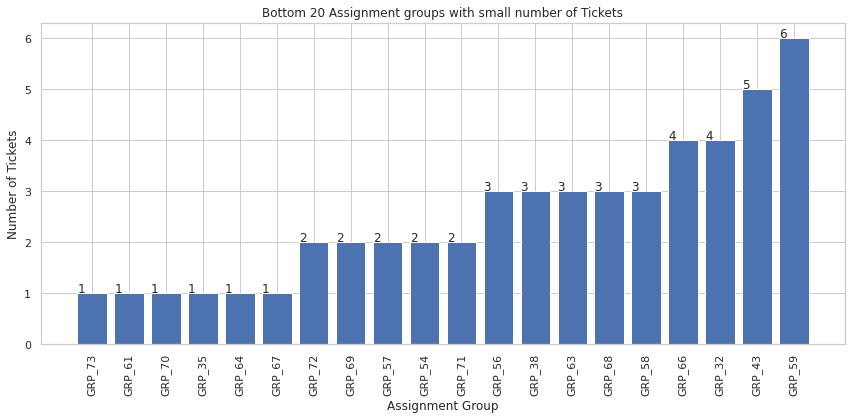

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

Here we have the plot of the bottom 20 groups that have the data assigned to them.

In [ ]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

Description Ticket Count
0        1 ticket            6
1      2-5 ticket           13
2     6-10 ticket            6
3    11-20 ticket            9
4    21-50 ticket           16
5   51-100 ticket            9
6     >100 ticket           15

In the dataframe above, we identify the number of groups that have tickets assigned to them in specific ranges. Ex : There are 6 groups that have just 1 ticket assigned to them.

### **Null Value Treatment.**

1. Drop the missing values: The number of complete cases i.e. observation with no missing data must be sufficient for the selected analysis technique then we can se this. However in our case, we already have quite skewed data and a long tail. So ignoring null rows can be fatal in totally missing out some groups
2. Imputation: If the missing values in a column or feature are numerical, the values can be imputed by the mean or median of the complete cases of the variable. But in our case we have character strings
3. COnjoining/ custom replacement: The cases where we can find anoher custom solution to give a logical value to null. In our case fortunately the we observed that wherever we have NaN in any description we have proper input in short column and vice versa. Hence we can make a readable combined description and make NaN replaceable and combine short and description as one column.

Thus to eliminate the null values, we'll be replacing them with space.

In [ ]:
df_incidents[df_incidents['Short description'].isnull()]

Short description  ... Assignment group
2604               NaN  ...           GRP_34
3383               NaN  ...            GRP_0
3906               NaN  ...            GRP_0
3910               NaN  ...            GRP_0
3915               NaN  ...            GRP_0
3921               NaN  ...            GRP_0
3924               NaN  ...            GRP_0
4341               NaN  ...            GRP_0

[8 rows x 3 columns]

In [ ]:
df_incidents[df_incidents['Description'].isnull()]

Short description Description Assignment group
4395  i am locked out of skype         NaN            GRP_0

Thus to eliminate the null values, we'll be replacing them with space.

In [ ]:
#Replace NaN values in Short Description and Description columns
df_incidents['Short description'] = df_incidents['Short description'].replace(np.nan, '', regex=True)
df_incidents['Description'] = df_incidents['Description'].replace(np.nan, '', regex=True)

In [ ]:
df_incidents.describe().T

count unique             top  freq
Short description  8500   7482  password reset    38
Description        8500   7818             the    56
Assignment group   8500     74           GRP_0  3976

####**Joining the two columns short description and description.**

Here, we are joining the two columns into a new columns because of the null values we replaced above, some of the short description/description columns have just spaces as their text. If this is the case, then we would have to join the columns, so that while making the vocabulary, we can refer to a single column to work with.

In [ ]:
#Concatenate Short Description and Description columns
df_incidents['New_Description'] = df_incidents['Short description'] + ' ' +df_incidents['Description']

We do this concatenation here, to help with data pre-processing & data cleansing.

Later we will remove the repeated words in each combined description.

In [ ]:
df_incidents.head()

Short description  ...                                    New_Description
0                    login issue  ...  login issue -verified user details.(employee# ...
1                        outlook  ...  outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2             cant log in to vpn  ...  cant log in to vpn \r\n\r\nreceived from: eylq...
3  unable to access hr_tool page  ...  unable to access hr_tool page unable to access...
4                   skype error   ...                          skype error  skype error 

[5 rows x 4 columns]

#### **Creating a wordcloud.**

A wordcloud is an image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance. Here in the below wordcloud, we intend to do the same.

In [ ]:
def f_word_cloud(column):

    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in column:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        for words in tokens:
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    return wordcloud

Wordcloud image of the description.

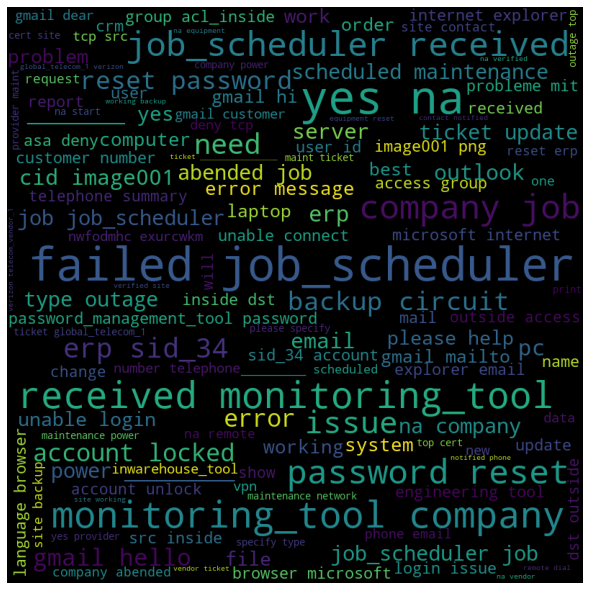

In [ ]:
from wordcloud import WordCloud, STOPWORDS


wordcloud = f_word_cloud(df_incidents.New_Description)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Lets view the word cloud of top 4 assignment groups to see the kind of tickets assigned to them Word Cloud for tickets with Assignment group 'GRP_0'

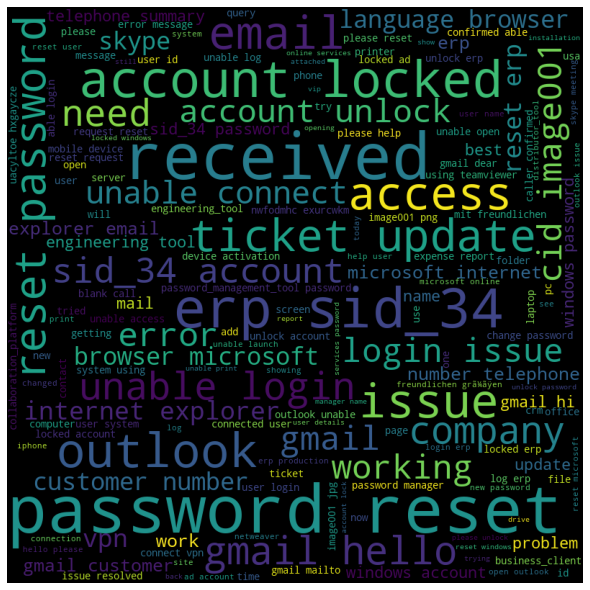

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].New_Description)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Word Cloud for tickets with Assignment group 'GRP_8'.

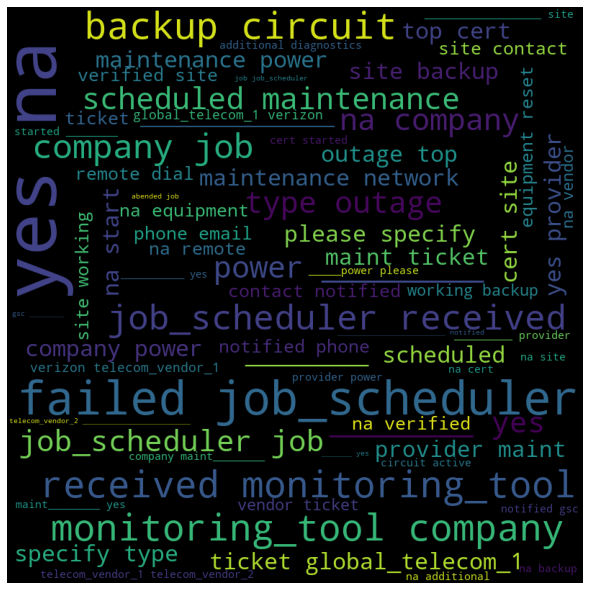

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_8'].New_Description)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

GRP_8 seems to have tickets related to outage, job failures, monitoring tool etc.

Word Cloud for tickets with Assignment group 'GRP_12'

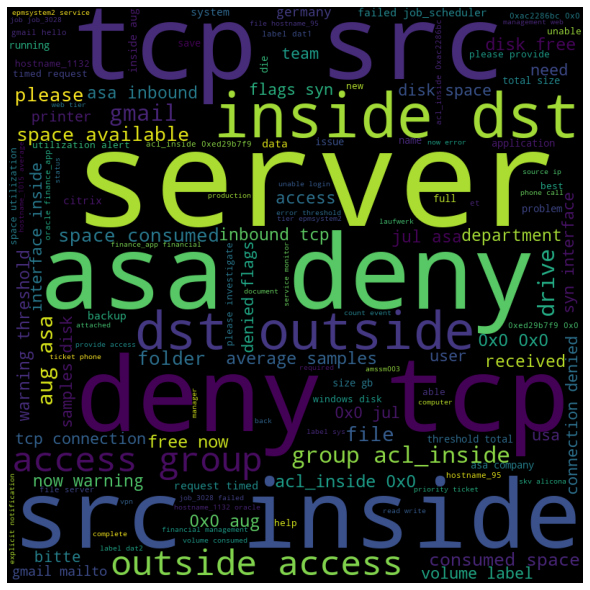

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_12'].New_Description)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

GRP_12 contains tickets related to systems like disk space issues, t network issues like tie out, citrix issue, connectivity timeout etc.

Word Cloud for tickets with Assignment group 'GRP_24'.

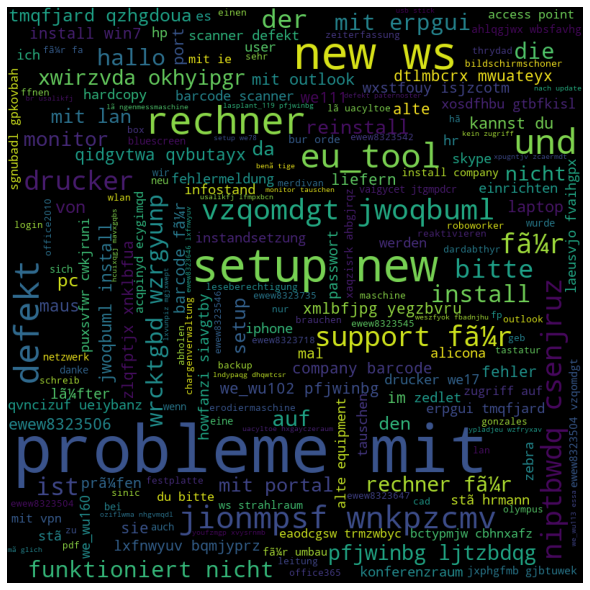

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

GRP_24 - Tickets are mainly in german, these tickets need to be translated to english before passing it to our model.


Seems like there are few tickets with description in some other language, probably in German.

###**Data Encoding and translation**

Text encoding transforms words into numbers and texts into number vectors. And in the given data set we also found that ther are a lot of entries/records that are in multiple languages. Thus we need them to translate as well to one language, that is easily understandable. Here we choose english. Also, there are some special characters in some records, so we will be translating them as well.

In [ ]:
df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description

222     support fÃ¼r fa.gstry \arexjftu ohxdwngl suppo...
223     probleme mit bluescreen . hallo ,\n\nes ist er...
255     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
                              ...                        
8413    pobleme mit we_combi \jionmpsf wnkpzcmv poblem...
8414    langsamer rechner \Ã¼berprÃ¼fung \niptbwdq cse...
8416    setup new ws \kebogxzp difnjlkp  setup new ws ...
8417    bluetooth keybankrd defekt \dardabthyr bluetoo...
8419    probleme mit bildschirmschoner \ we91 \jionmps...
Name: New_Description, Length: 289, dtype: object

In [ ]:
df_incidents.shape

(8500, 4)

**Language Detection**

In [ ]:
#Lets encode the string, to make it easier to be passed to language detection api.
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8")

df_incidents['New_Description'] = df_incidents['New_Description'].apply(fn_decode_to_ascii)

In the below code, we are now using langdetect library to detect the languages used in the data set.

In [ ]:
from langdetect import detect

def fn_lan_detect(df):
   try:
      return detect(df)
   except:
      return 'no'

df_incidents['language'] = df_incidents['New_Description'].apply(fn_lan_detect)

In [ ]:
#Languages detected
df_incidents["language"].value_counts()

en    7119
de     382
af     283
it     132
fr     111
no     102
nl      71
sv      52
es      47
ca      38
da      29
pl      29
pt      18
ro      14
sl      12
cy      11
tl      10
sq       9
hr       5
fi       5
id       5
so       4
cs       3
et       3
sk       2
lt       2
vi       1
lv       1
Name: language, dtype: int64

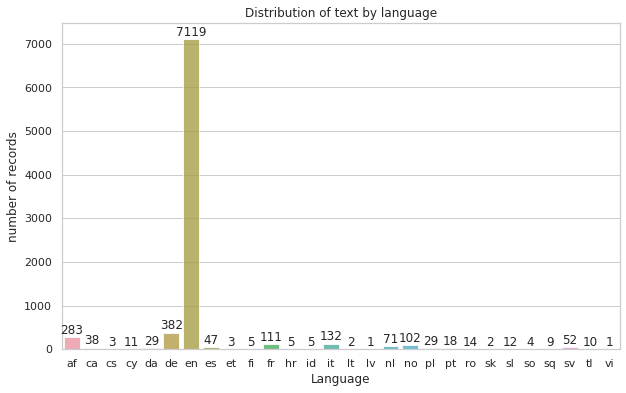

In [ ]:
x = df_incidents["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

**Language Translation**

We can see that most of the tickets are in english, followed by tickets in German language. We need to translate these into english. We will be using google translate package to translate

In [ ]:
import googletrans
from googletrans import Translator
translator = Translator()
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df,dest='en', src=lang).text
  except:
    return df

In [ ]:
df_incidents['English_Description'] = df_incidents.apply(lambda x: fn_translate(x['New_Description'], x['language']), axis=1)

Google Translate API is used for translating the non-english text. However, there is limit imposed due to garbage values and non-ascii symbols preventing proper translation.

So the traslation was done in 2 batches:
  *   Before data cleansing.
  *   After data cleansing.


In [ ]:
df_incidents[df_incidents["Short description"].str.contains("account lock")]["Assignment group"].value_counts()

GRP_0     226
GRP_2       3
GRP_72      1
GRP_34      1
Name: Assignment group, dtype: int64

In [ ]:
df_incidents[df_incidents["Short description"].str.contains("oneteam")]["Assignment group"].value_counts()

GRP_0     3
GRP_73    1
Name: Assignment group, dtype: int64

In [ ]:
df_incidents.head(10)

Short description  ...                                English_Description
0                                        login issue  ...  login issue -verified user details.(employee# ...
1                                            outlook  ...  outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2                                 cant log in to vpn  ...  cant log in to vpn \r\n\r\nreceived from: eylq...
3                      unable to access hr_tool page  ...  unable to access hr_tool page unable to access...
4                                       skype error   ...                          skype error  skype error 
5     unable to log in to engineering tool and skype  ...  unable to log in to engineering tool and skype...
6  event: critical:HostName_221.company.com the v...  ...  event: critical:HostName_221.company.com the v...
7  ticket_no1550391- employment status - new non-...  ...  ticket_no1550391- employment status - new non-...
8               unable to disable add ins on outlook  ...  unable to disable add ins on outlook unable to...
9                    ticket update on inplant_874773  ...  ticket update on inplant_874773 ticket update ...

[10 rows x 6 columns]

In [ ]:
df_incidents[df_incidents.language=='no']['Assignment group'].unique()

array(['GRP_0', 'GRP_24', 'GRP_27', 'GRP_14', 'GRP_48', 'GRP_30',
       'GRP_33', 'GRP_31', 'GRP_13', 'GRP_19', 'GRP_12', 'GRP_3'],
      dtype=object)

In [ ]:
lang_list = df_incidents.language.unique().tolist()
list_groups=[]
for lang in lang_list:
    if not lang=='en':
        #print(lang)
        list_groups=list_groups+(df_incidents[df_incidents.language==lang]['Assignment group'].unique().tolist())

print(len(list(set(list_groups))))

42


In [ ]:
len(list(set(list_groups)))

42

In [ ]:
list_groups

['GRP_0',
 'GRP_24',
 'GRP_27',
 'GRP_14',
 'GRP_48',
 'GRP_30',
 'GRP_33',
 'GRP_31',
 'GRP_13',
 'GRP_19',
 'GRP_12',
 'GRP_3',
 'GRP_0',
 'GRP_1',
 'GRP_14',
 'GRP_24',
 'GRP_19',
 'GRP_3',
 'GRP_31',
 'GRP_40',
 'GRP_65',
 'GRP_13',
 'GRP_9',
 'GRP_0',
 'GRP_42',
 'GRP_24',
 'GRP_12',
 'GRP_31',
 'GRP_40',
 'GRP_9',
 'GRP_30',
 'GRP_62',
 'GRP_19',
 'GRP_15',
 'GRP_18',
 'GRP_0',
 'GRP_19',
 'GRP_2',
 'GRP_25',
 'GRP_28',
 'GRP_62',
 'GRP_24',
 'GRP_34',
 'GRP_0',
 'GRP_24',
 'GRP_12',
 'GRP_2',
 'GRP_26',
 'GRP_42',
 'GRP_48',
 'GRP_31',
 'GRP_19',
 'GRP_34',
 'GRP_17',
 'GRP_30',
 'GRP_27',
 'GRP_3',
 'GRP_62',
 'GRP_45',
 'GRP_0',
 'GRP_24',
 'GRP_48',
 'GRP_0',
 'GRP_24',
 'GRP_30',
 'GRP_3',
 'GRP_31',
 'GRP_15',
 'GRP_1',
 'GRP_0',
 'GRP_3',
 'GRP_25',
 'GRP_24',
 'GRP_17',
 'GRP_49',
 'GRP_13',
 'GRP_40',
 'GRP_33',
 'GRP_30',
 'GRP_42',
 'GRP_44',
 'GRP_16',
 'GRP_34',
 'GRP_46',
 'GRP_8',
 'GRP_0',
 'GRP_24',
 'GRP_28',
 'GRP_25',
 'GRP_33',
 'GRP_2',
 'GRP_42',
 'GRP_34',

In [ ]:
df_incidents.to_csv("inc_tranlated.csv",index=False)

In [ ]:
df_incidents.head()

Short description  ...                                English_Description
0                    login issue  ...  login issue -verified user details.(employee# ...
1                        outlook  ...  outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2             cant log in to vpn  ...  cant log in to vpn \r\n\r\nreceived from: eylq...
3  unable to access hr_tool page  ...  unable to access hr_tool page unable to access...
4                   skype error   ...                          skype error  skype error 

[5 rows x 6 columns]

In [ ]:
df_tranlated_text = pd.read_csv('inc_tranlated.csv',encoding='utf-8')
df_tranlated_inc = df_tranlated_text.drop(['Short description','Description','New_Description'],axis=1)
df_tranlated_inc.English_Description=df_tranlated_inc.English_Description.astype(str)
df_tranlated_inc.head()

Assignment group language                                English_Description
0            GRP_0       en  login issue -verified user details.(employee# ...
1            GRP_0       en  outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2            GRP_0       en  cant log in to vpn \r\n\r\nreceived from: eylq...
3            GRP_0       en  unable to access hr_tool page unable to access...
4            GRP_0       no                          skype error  skype error

In [ ]:
df_tranlated_text.tail()

Short description  ...                                English_Description
8495                  emails not coming in from zz mail  ...  emails not coming in from zz mail \r\n\r\nrece...
8496                           telephony_software issue  ...  telephony_software issue telephony_software issue
8497  vip2: windows password reset for tifpdchb pedx...  ...  vip2: windows password reset for tifpdchb pedx...
8498                     machine nÃ£o estÃ¡ funcionando  ...  machine no est funcionando i am unable to acce...
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...  Different program types cannot be opened on se...

[5 rows x 6 columns]

**Exploring the different language disribution in the Dataset**

In [ ]:
#Unique Languages & Unique grps
det_lang = df_tranlated_text['language']
det_lang2 = np.array(det_lang)
det_lang2 = np.unique(det_lang)
det_lang2

array(['af', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr',
       'hr', 'id', 'it', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro', 'sk',
       'sl', 'so', 'sq', 'sv', 'tl', 'vi'], dtype=object)

In [ ]:
print("Total No: of languages detected: ", det_lang2.size)

Total No: of languages detected:  28


In [ ]:
# Value Counts of Language distribution
lang_valcount = df_tranlated_text['language'].value_counts()
print(lang_valcount)

en    7119
de     382
af     283
it     132
fr     111
no     102
nl      71
sv      52
es      47
ca      38
da      29
pl      29
pt      18
ro      14
sl      12
cy      11
tl      10
sq       9
hr       5
fi       5
id       5
so       4
cs       3
et       3
sk       2
lt       2
vi       1
lv       1
Name: language, dtype: int64


In [ ]:
det_lang3  = np.array(det_lang)
occurrences = np.count_nonzero(det_lang3 != 'en')
print("Non-English language count: ", occurrences)

Non-English language count:  1381


In [ ]:
# Find Language Distribution in Groups
grplang_df = pd.DataFrame(df_tranlated_text['Assignment group'].unique(),columns=['AsgnGrp'])
asgLngGrp = []

for ct2 in grplang_df.itertuples():
  strVar = []
  for ct1 in df_tranlated_text.itertuples():
    if ct2.AsgnGrp == ct1._3:
      strVar.append(ct1.language)
  strArrVar = str(np.unique(strVar))
  asgLngGrp.append(strArrVar)

**Group-wise Language Distribution**

In [ ]:
grplang_df['AsgnLang'] = asgLngGrp
pd.set_option('display.max_rows', None)
print(grplang_df)

   AsgnGrp                                           AsgnLang
0    GRP_0  ['af' 'ca' 'cs' 'cy' 'da' 'de' 'en' 'es' 'fi' ...
1    GRP_1                                   ['ca' 'en' 'fr']
2    GRP_3               ['af' 'ca' 'en' 'fr' 'hr' 'nl' 'no']
3    GRP_4                                             ['en']
4    GRP_5                                   ['da' 'de' 'en']
5    GRP_6                                        ['da' 'en']
6    GRP_7                                             ['en']
7    GRP_8                         ['en' 'nl' 'pt' 'sl' 'so']
8    GRP_9                              ['da' 'en' 'fr' 'it']
9   GRP_10                                   ['de' 'en' 'pt']
10  GRP_11                                        ['de' 'en']
11  GRP_12               ['af' 'de' 'en' 'id' 'it' 'no' 'pl']
12  GRP_13                         ['de' 'en' 'fr' 'nl' 'no']
13  GRP_14                              ['de' 'en' 'fr' 'no']
14  GRP_15                                   ['ca' 'en' 'it']
15  GRP_

**Observation:**

From above table and bar chart, we can observe that the language is distributed across groups and are not specific to certain groups alone.

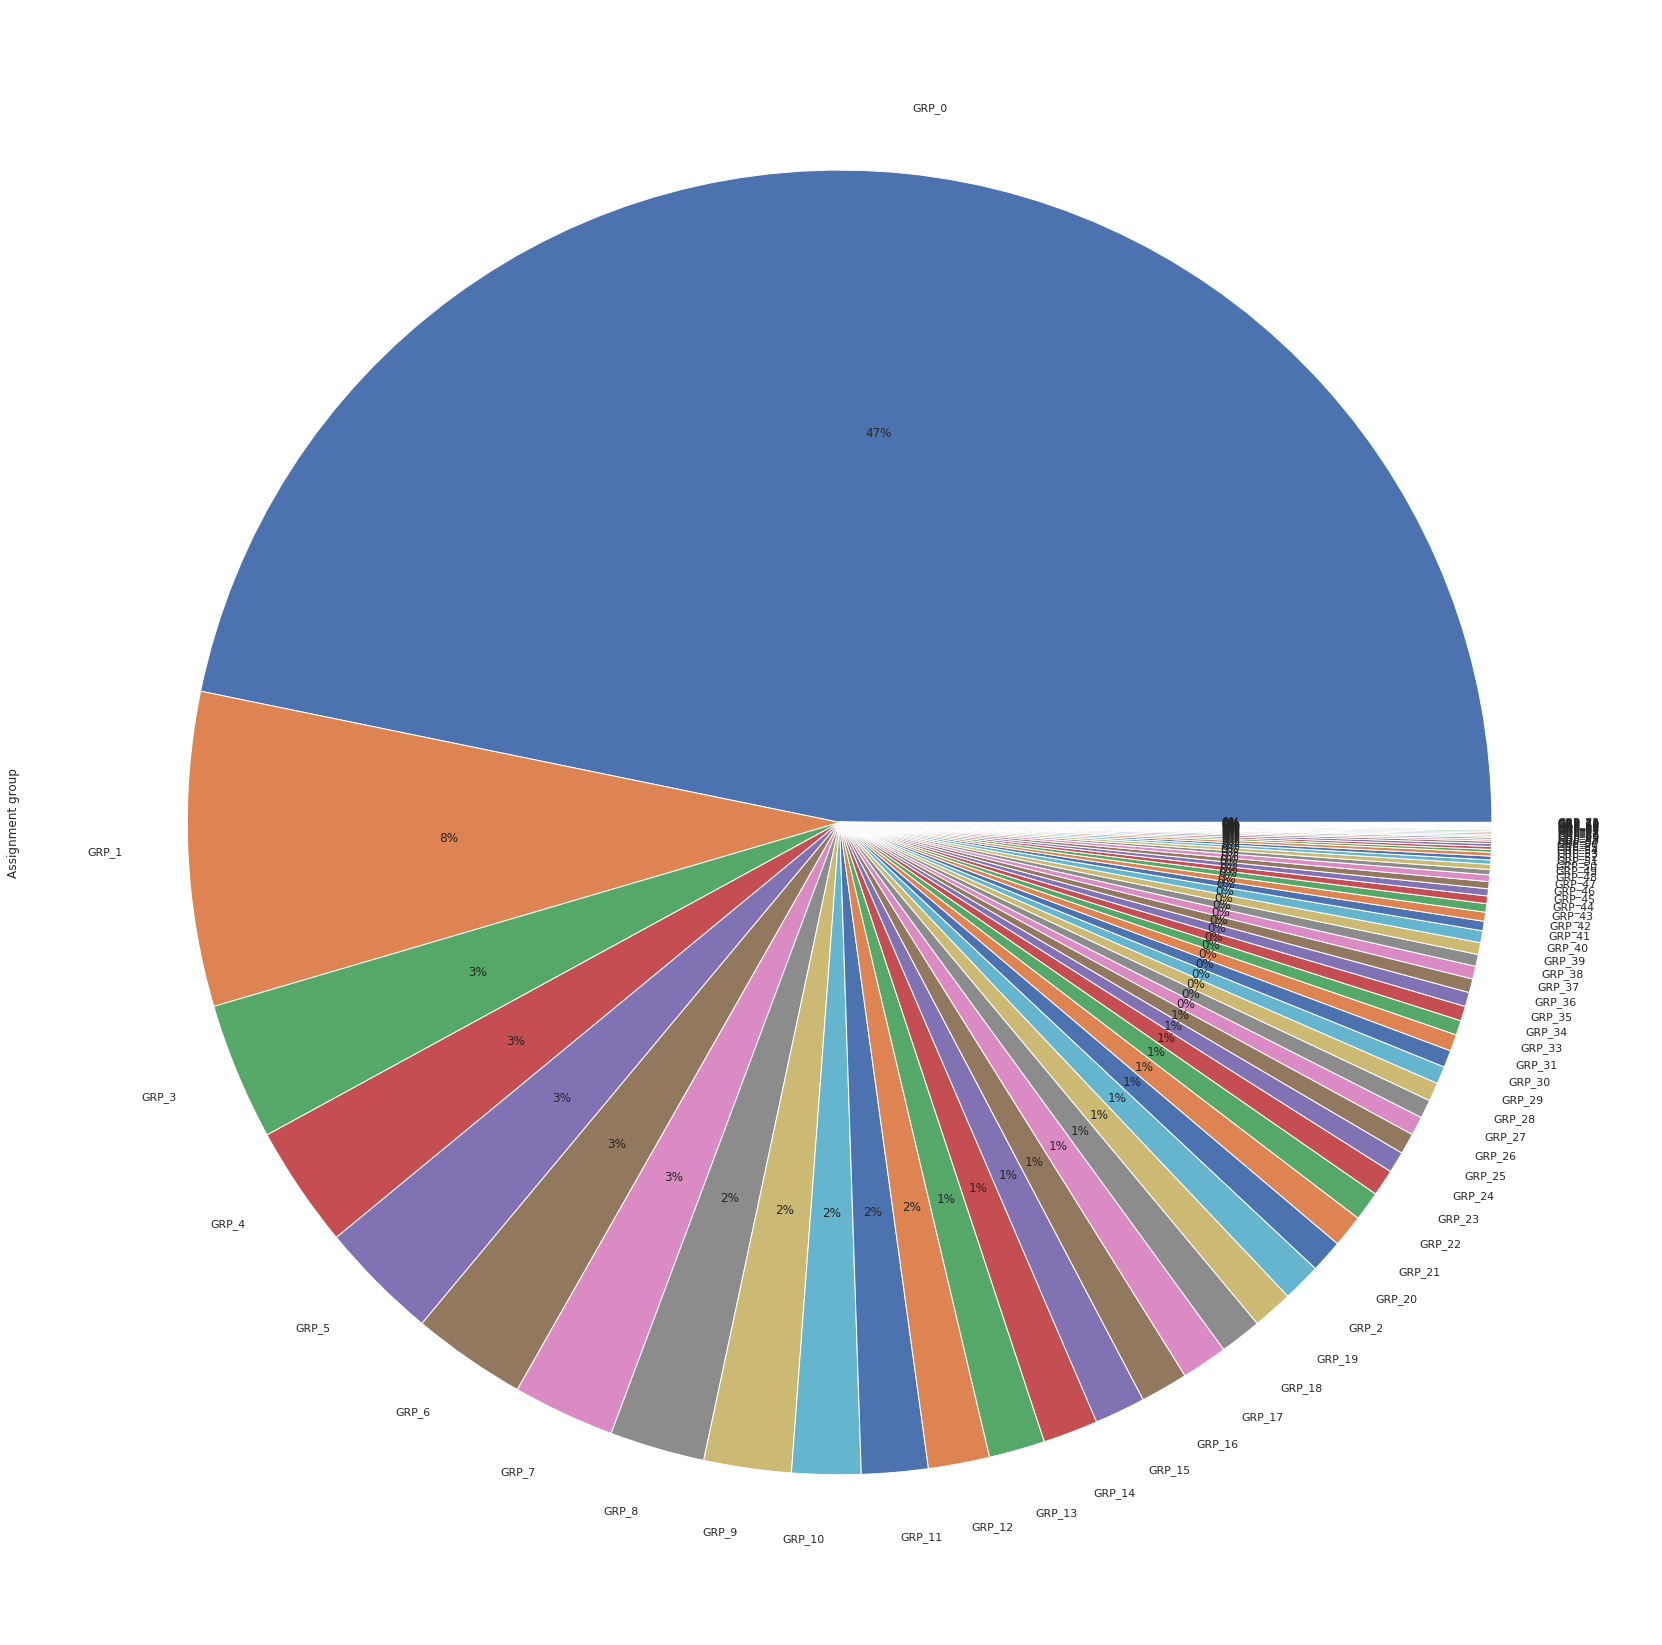

In [ ]:
#Pie Chart of target group
df_tranlated_text['Assignment group'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = grplang_df['AsgnGrp'], figsize = (30, 30))

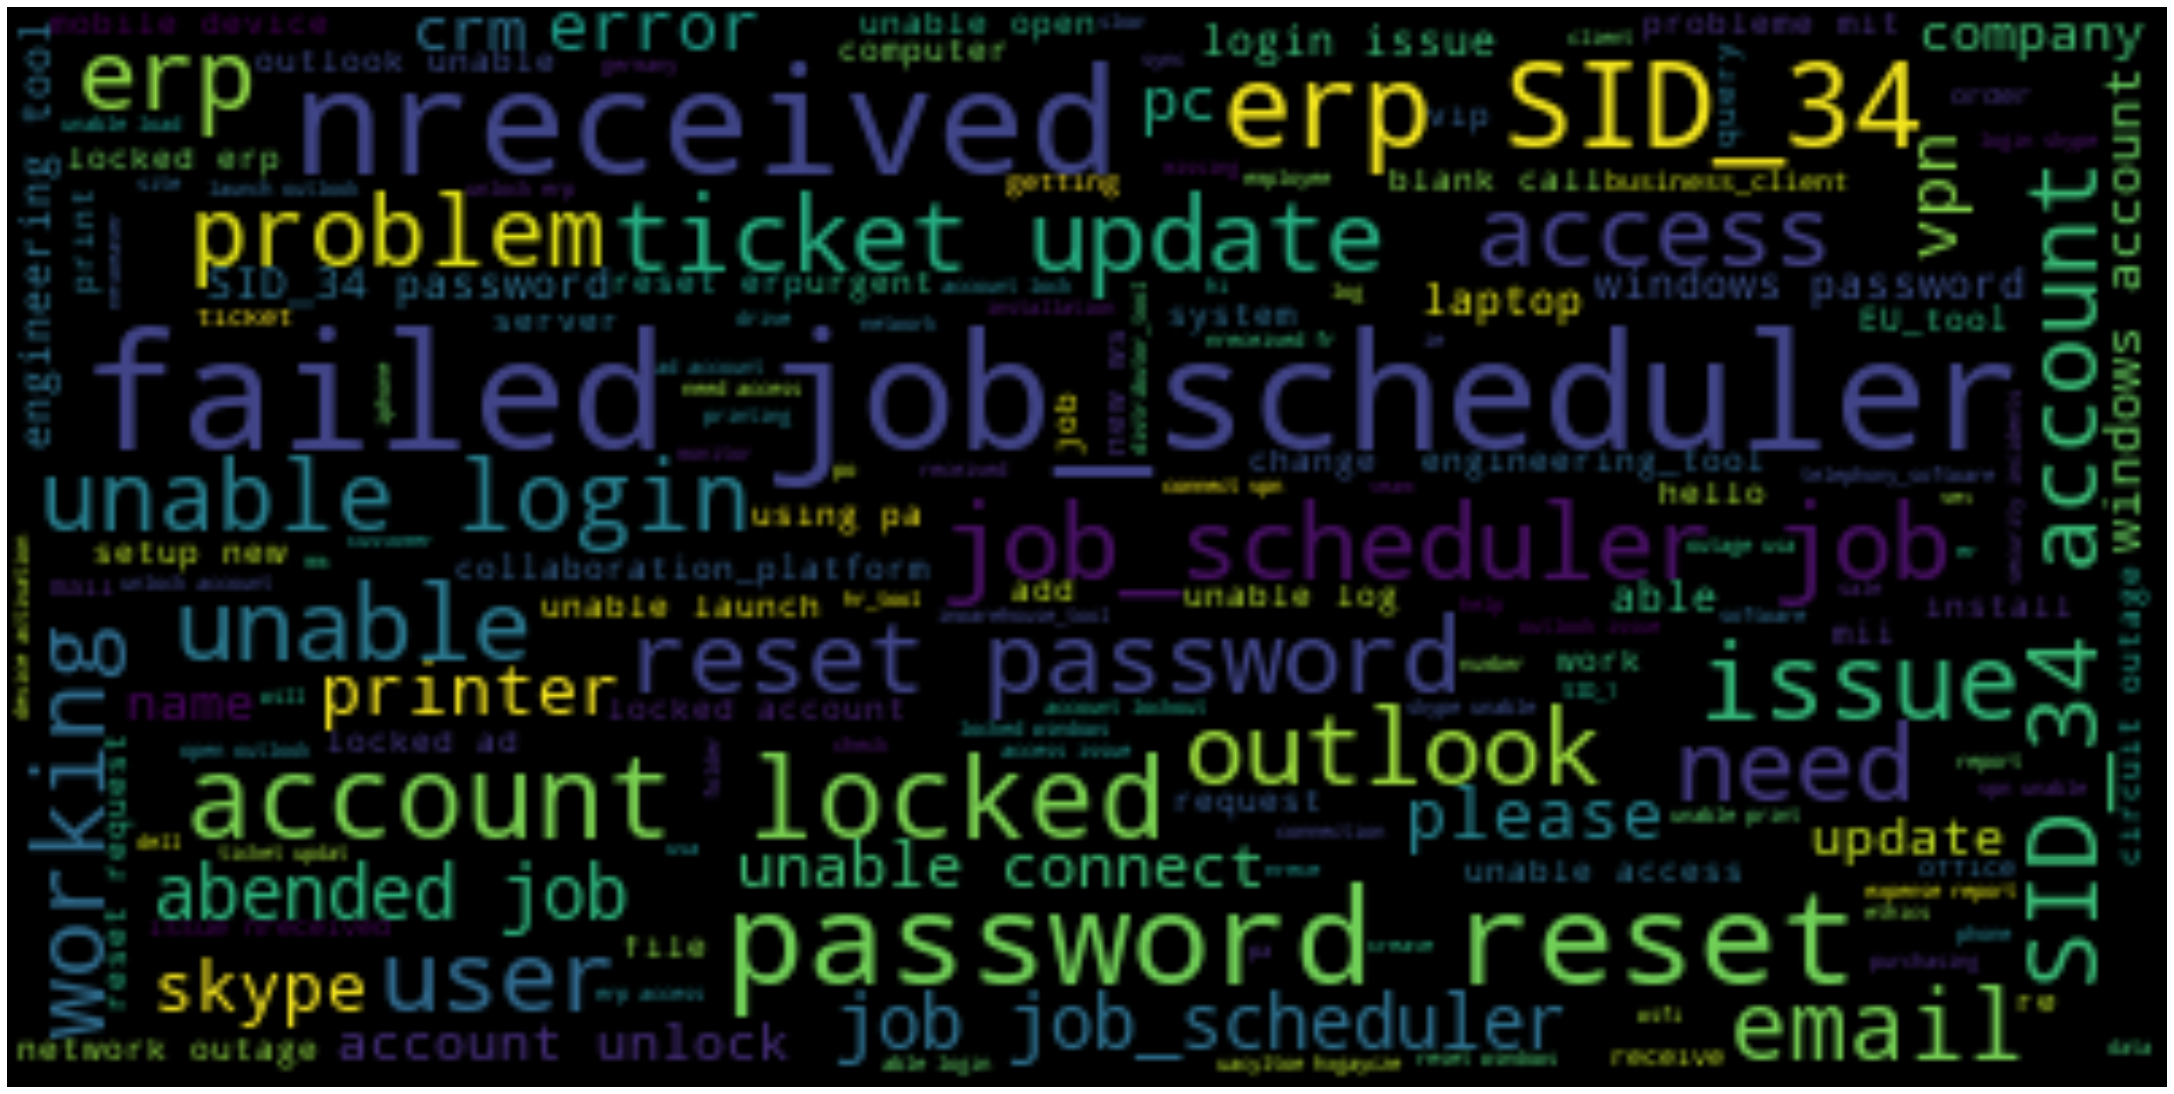

In [ ]:
# Wordcloud before data cleaning & after language translation
wordcloudImg2 = WordCloud().generate(str(df_tranlated_text["English_Description"]))
plt.figure(figsize=(30,20))
plt.imshow(wordcloudImg2, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### **Data Cleansing**

* In NLP, the first step before building the machine learning model, is to pre-process the data.If the data is fairly pre-processed the results would be reliable
* We need to make sure the data passed to any algorithm should be well translated from Natural human conversational form to what the computer is able to understand.
* Without the cleaning process, the dataset is often a cluster of words that the computer doesn’t understand.

In [ ]:
df_tranlated_inc.shape

(8500, 3)

In [ ]:
import string
import spacy
from nltk import tokenize

## **Various different steps that are followed while preprocessing the data:**
1. Lowercasing: converting the words into lower case format. (NLU -> nlu). Words having the same meaning like nlp and NLP if they are not converted into lowercase then these both will constitute as non-identical words in the vector space model.

2. Stop words removal: These are the most often used that do not have any significance while determining the two different documents like (a, an, the, etc.) so they are to be removed.

3. Contextual conversational words removal: In our case, words like 'recieved from','to','regards','subject','email address', which are identified as words used in an standard email converstaions to be removed

4. Punctuation: The text has several punctuations. Punctuations are often unnecessary as it doesn’t add value or meaning to the NLP model.

5. Other steps: Other cleaning steps can be performed based on the data. Listed a few of them below,Remove URLs, Remove HTML tags, Remove numbers, Remove hashtags etc are also used here

In [ ]:
# Define a function to clean the data
import re

def clean_data(text):
    text = text.lower()
    text = ' '.join([w for w in text.split()])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    text = re.sub(r"email:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"email address:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"cid:image",' ',text)
    text = re.sub(r"this message was sent from an unmonitored email address",' ',text)
    text = re.sub(r"please do not reply to this message",' ',text)
    text = re.sub(r"monitoring_tool@company.com",' ',text)
    text = re.sub(r"MonitoringTool",' ',text)
    text = re.sub(r"select the following link to view the disclaimer in an alternate language",' ',text)
    text = re.sub(r"description problem",' ',text)
    text = re.sub(r"steps taken far",' ',text)
    text = re.sub(r"customer job title",' ',text)
    text = re.sub(r"sales engineer contact",' ',text)
    text = re.sub(r"description of problem:",' ',text)
    text = re.sub(r"steps taken so far",' ',text)
    text = re.sub(r"please do the needful",' ',text)
    text = re.sub(r"please note that",' ',text)
    text = re.sub(r"please find below",' ',text)
    text = re.sub(r"date and time",' ',text)
    text = re.sub(r"kindly refer mail",' ',text)
    text = re.sub(r"name:",' ',text)
    text = re.sub(r"language:",' ',text)
    text = re.sub(r"customer number:",' ',text)
    text = re.sub(r"telephone:",' ',text)
    text = re.sub(r"summary:",' ',text)
    text = re.sub(r"sincerely",' ',text)
    text = re.sub(r"company inc",' ',text)
    text = re.sub(r"importance:",' ',text)
    text = re.sub(r"gmail.com",' ',text)
    text = re.sub(r"company.com",' ',text)
    text = re.sub(r"microsoftonline.com",' ',text)
    text = re.sub(r"company.onmicrosoft.com",' ',text)
    text = re.sub(r"hello",' ',text)
    text = re.sub(r"hallo",' ',text)
    text = re.sub(r"hi it team",' ',text)
    text = re.sub(r"hi team",' ',text)
    text = re.sub(r"hi",' ',text)
    text = re.sub(r"best regards",' ',text)
    text = re.sub(r"kind regards",' ',text)
    text = re.sub(r"regards",' ',text)
    text = re.sub(r"good morning",' ',text)
    text = re.sub(r"please",' ',text)
    text = re.sub(r"kindly",' ',text)

    #Remove email
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers
    text = re.sub(r'\d+','' ,text)
    # Remove new line characters
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF')
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())


    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [ ]:
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['English_Description'].apply(lambda x: clean_data(x))
df_tranlated_inc.drop(['English_Description'],axis=1,inplace=True)

In [ ]:
df_tranlated_inc['cleaned_description'].head()

0    login issue verified user details employee and...
1    outlook team my meetings skype meetings etc ar...
2         cant log in to vpn cannot log on to vpn best
3    unable to access hr tool page unable to access...
4                              skype error skype error
Name: cleaned_description, dtype: object

**Language Translation after cleaning & before stop words removal & tokenization**

In [ ]:
df_tranlated_inc['cleaned_description'] = df_tranlated_inc.apply(lambda x: fn_translate(x['cleaned_description'], x['language']), axis=1)

In [ ]:
df_tranlated_inc.head()

Assignment group language                                cleaned_description
0            GRP_0       en  login issue verified user details employee and...
1            GRP_0       en  outlook team my meetings skype meetings etc ar...
2            GRP_0       en       cant log in to vpn cannot log on to vpn best
3            GRP_0       en  unable to access hr tool page unable to access...
4            GRP_0       no                            skype error skype error

In [ ]:
## Removal of Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df_tranlated_inc['cleaned_description'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    login issue verified user details employee man...
1    outlook team meetings skype meetings etc appea...
2                     cant log vpn cannot log vpn best
3    unable access hr tool page unable access hr to...
4                              skype error skype error
Name: cleaned_description, dtype: object

**Remove duplicates in combined descriptions**

In [ ]:
desc_Arr = []
for tk1 in df_tranlated_inc.itertuples():
  texArr = []
  texArr = list(tk1.cleaned_description.split(" "))
  str1 = " "
  texStr = str1.join(np.unique(texArr))
  desc_Arr.append(texStr)

This step was necessary to remove the duplicate words which were formed due to the concatenation of short description & long description columns of the dataset.

These duplicate words would increase the word counts and possibly impact the model building steps and the performance of models.

In [ ]:
desc_Arr[4]

'error skype'

In [ ]:
df_tranlated_inc['cleaned_description'] = desc_Arr
df_tranlated_inc.head()

Assignment group language                                cleaned_description
0            GRP_0       en  able ad advised caller check checked confirmed...
1            GRP_0       en  advise appearing calendar correct etc kind mee...
2            GRP_0       en                           best cannot cant log vpn
3            GRP_0       en                         access hr page tool unable
4            GRP_0       no                                        error skype

### **Deriving n-grams**

N-grams of texts are extensively used in text mining and natural language processing tasks.

They are basically a set of co-occuring words within a given window. N-grams is a contiguous sequence of N items from a given sample of text or speech, in the fields of computational linguistics and probability. The items can be phonemes, syllables, letters, words or base pairs according to the application. N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase. We'll be using scikit-learn’s CountVectorizer function to derive n-grams We will write a generic method to derive the n-grams.

In [ ]:
# Generic function to derive top N n-grams from the corpus
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_ngrams(corpus, top_n=None, ngram_range=(1,1), stopwords=None):
    vec = CountVectorizer(ngram_range=ngram_range,
                          stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

In [ ]:
# Top Unigrams after removing stop words
top_n = 50
ngram_range = (1,1)
uni_grams_sw = get_top_n_ngrams(df_tranlated_inc.cleaned_description, top_n, ngram_range, stopwords=stop)

unigram_df = pd.DataFrame(uni_grams_sw, columns = ['Summary' , 'count'])
figure = unigram_df.groupby('Summary').sum()['count'].sort_values(ascending=False)
figure.head(10)

Summary
erp          1081
password     1053
job          1010
scheduler     969
tool          946
failed        884
unable        879
reset         871
issue         850
sid           741
Name: count, dtype: int64

In [ ]:
# Top Bigrams after removing stop words
top_n = 50
ngram_range = (2,2)
bi_grams_sw = get_top_n_ngrams(df_tranlated_inc.cleaned_description, top_n, ngram_range, stopwords=stop)

bigrams_df = pd.DataFrame(bi_grams_sw, columns = ['Summary' , 'count'])
figure2 = bigrams_df.groupby('Summary').sum()['count'].sort_values(ascending=False)
figure2.head(10)

Summary
job scheduler         778
failed job            587
password reset        360
erp error             170
company contact       156
ticket update         155
scheduler sid         154
password passwords    147
start started         146
reset sid             146
Name: count, dtype: int64

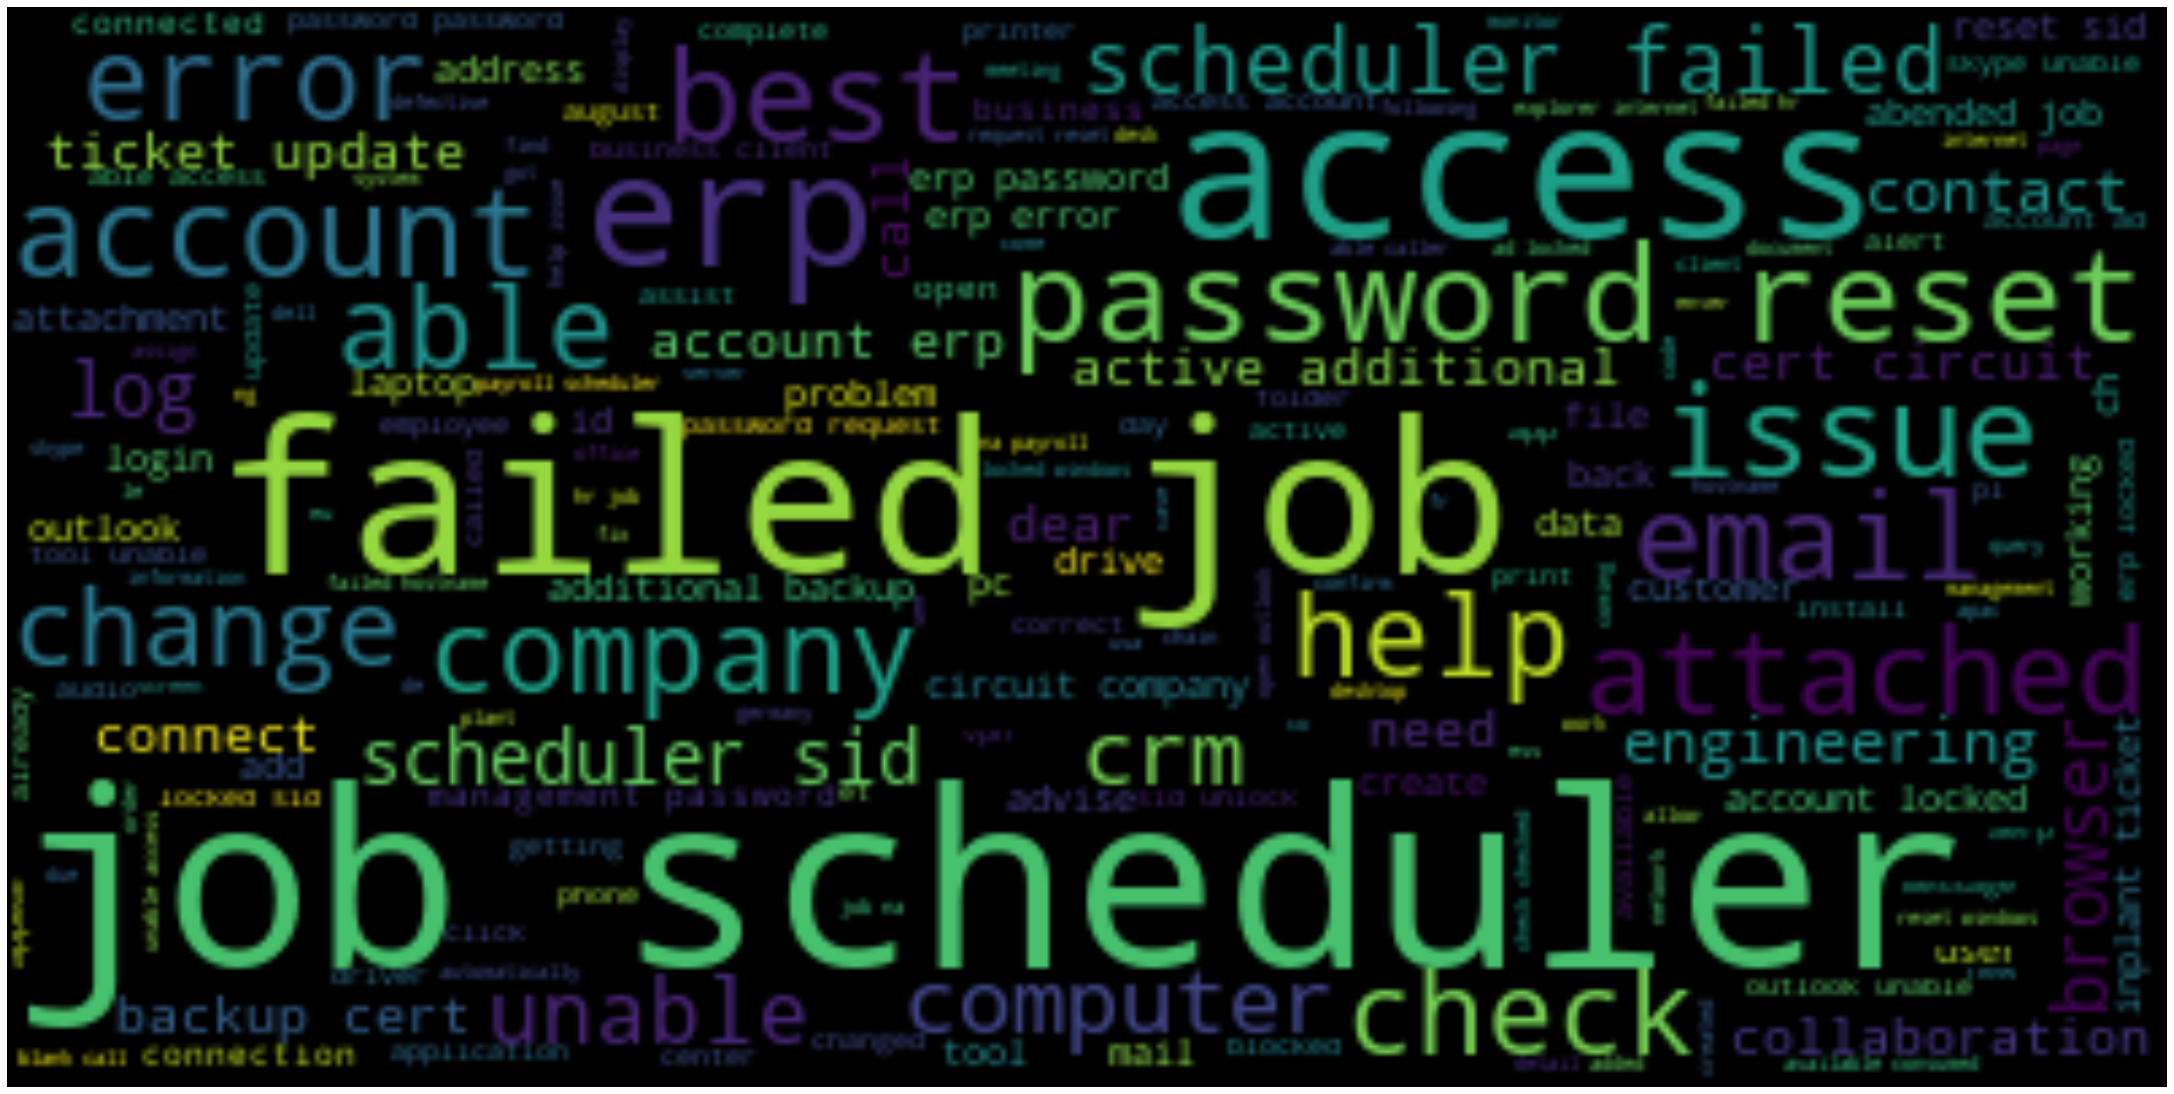

In [ ]:
# Wordcloud after data cleaning
wordcloudImg3 = WordCloud().generate(str(df_tranlated_inc["cleaned_description"]))
plt.figure(figsize=(30,20))
plt.imshow(wordcloudImg3, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##**Lemmatization**

1.Lemmatization is the process of process of reducing a word to its root form by grouping together the different inflected forms of a word so they can be analysed as a single item.

2.It helps to reduce variations of the same word, thereby reducing the corpus of words to be included in the model.

So,it returns the base or dictionary form of a word, which is known as the lemma.It is important when clean the data of all words of a given root.Lemmatizing considers the context of the word and shortens the word into its root form based on the dictionary definition.

In [ ]:
    # Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

df_tranlated_inc["cleaned_description"] = df_tranlated_inc["cleaned_description"].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df_tranlated_inc['cleaned_description'].head()

0    able ad advise caller check check confirm deta...
1    advise appear calendar correct etc kind meetin...
2                         good can not can not log vpn
3                           access hr page tool unable
4                                          error skype
Name: cleaned_description, dtype: object

In [ ]:
# Wordcloud for corpus after data cleaning, removal of stop words & lemmatization
from wordcloud import WordCloud
def generate_word_cloud(corpus,x):
    wordcloudImg4 = WordCloud(width = 500, height = 500,
                    background_color ='black',
                    stopwords=stop,
                    min_font_size = 10).generate(corpus)

    # plot the WordCloud image
    plt.figure(figsize = (12, 12), facecolor = None)
    plt.imshow(wordcloudImg4, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common words of {}".format(x))
    plt.tight_layout(pad = 0)
    plt.show()

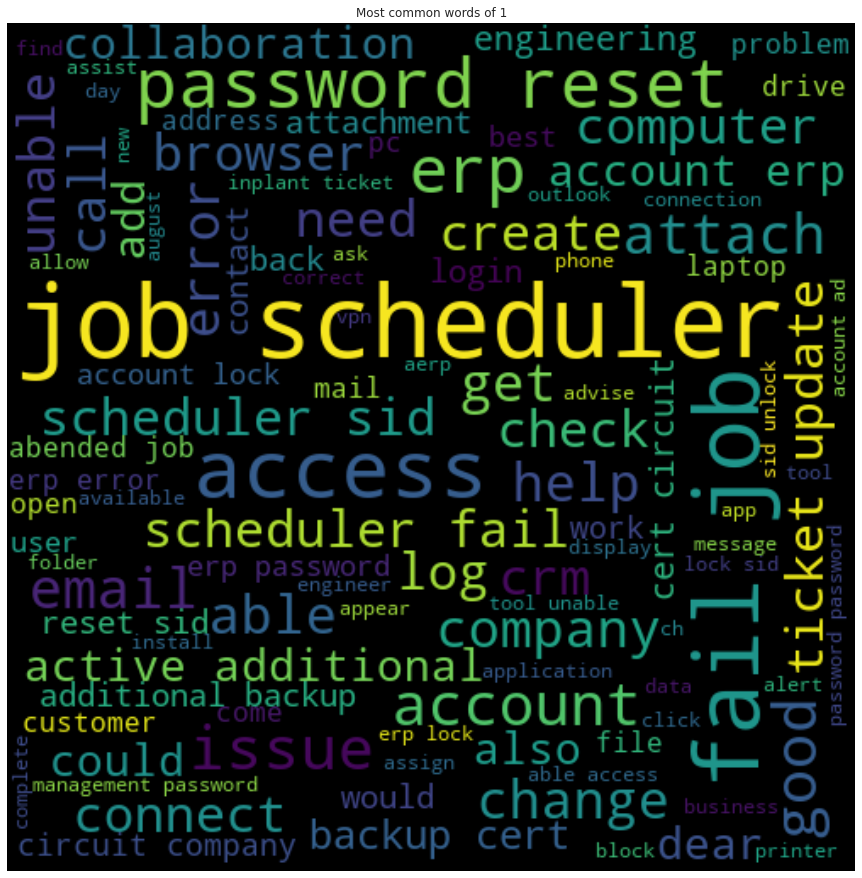

In [ ]:
generate_word_cloud(str(df_tranlated_inc['cleaned_description']),1)

In [ ]:
valueCts = df_tranlated_inc['Assignment group'].value_counts().sort_values(ascending=False).index
valueCts

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_17', 'GRP_31',
       'GRP_7', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_15',
       'GRP_30', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_1', 'GRP_22', 'GRP_11',
       'GRP_21', 'GRP_47', 'GRP_62', 'GRP_23', 'GRP_48', 'GRP_60', 'GRP_39',
       'GRP_27', 'GRP_37', 'GRP_44', 'GRP_36', 'GRP_50', 'GRP_65', 'GRP_53',
       'GRP_52', 'GRP_51', 'GRP_55', 'GRP_49', 'GRP_46', 'GRP_59', 'GRP_43',
       'GRP_66', 'GRP_32', 'GRP_56', 'GRP_38', 'GRP_63', 'GRP_68', 'GRP_58',
       'GRP_72', 'GRP_69', 'GRP_57', 'GRP_54', 'GRP_71', 'GRP_70', 'GRP_35',
       'GRP_64', 'GRP_61', 'GRP_73', 'GRP_67'],
      dtype='object')

In [ ]:
# Generate Worldcloud
for i in range(16):
    generate_word_cloud(' '.join(df_tranlated_inc[df_tranlated_inc['Assignment group'] == valueCts[i]].cleaned_description.str.strip()),valueCts[i])

**Observations**


It is clear from the n-gram analysis and the word cloud that in the dataset, most issues are related to:
  *   password reset
  *   fail job & scheduler

Sample Analysis on GRP_0:
It is the most frequent group and most of the tickets assigned to this group, shows us that this group deals with mostly the maintenance problems such as password reset, account lock, login issue, ticket update etc.

Maximum of the tickets from GRP_0 for human intervention can be reduced by putting automation scripts/mechanisms to help resolve these common maintenance issues. This will help in lowering the inflow of service tickets which need human intervention and thereby saving the resource/hour efforts spend and reducing cost involved for man hours.

In [ ]:
df_tranlated_inc['num_wds'] = df_tranlated_inc['cleaned_description'].apply(lambda x: len(x.split()))
df_tranlated_inc['num_wds'].mean()

13.306588235294118

In [ ]:
print(df_tranlated_inc['num_wds'].max())
print(df_tranlated_inc['num_wds'].min())

469
0


In [ ]:
len(df_tranlated_inc[df_tranlated_inc['num_wds']==0])

36

**Here we remove those records from our dataframe for which the no of words in the cleaned description is less than 2 words**

**Hence we have considered those records where the 'num_wds' is greater than  1**

In [ ]:
df_tranlated_inc= df_tranlated_inc[df_tranlated_inc['num_wds']>1]

In [ ]:
df_tranlated_inc.shape

(8425, 4)

The new dataframe has 8424 records now.

76 records had no: of words less than 2 and hence they were removed.

In [ ]:
print(df_tranlated_inc['num_wds'].max())
print(df_tranlated_inc['num_wds'].min())

469
2


In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))


df_tranlated_inc['avg_word'] = df_tranlated_inc['cleaned_description'].apply(lambda x: avg_word(str(x)))
df_tranlated_inc.head()

Assignment group language  ... num_wds  avg_word
0            GRP_0       en  ...      18  5.555556
1            GRP_0       en  ...      11  5.909091
2            GRP_0       en  ...       7  3.142857
3            GRP_0       en  ...       5  4.400000
4            GRP_0       no  ...       2  5.000000

[5 rows x 5 columns]

**Visualize a distribution of the description word counts to see how skewed our average might be by outliers. Let's generate another plot to take a look**

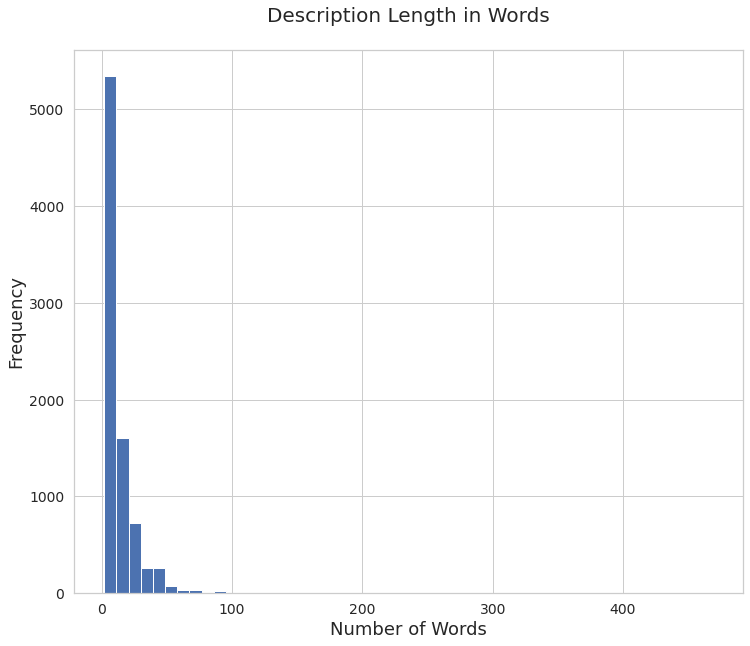

In [ ]:
ax=df_tranlated_inc['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Description Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

Number of unique words in each article

In [ ]:
df_tranlated_inc['uniq_wds'] = df_tranlated_inc['cleaned_description'].str.split().apply(lambda x: len(set(x)))
df_tranlated_inc['uniq_wds'].head()

0    17
1    11
2     5
3     5
4     2
Name: uniq_wds, dtype: int64

average (mean) number of unique words per incident, and the minimum and maximum unique word counts.

In [ ]:
print("Mean: ",df_tranlated_inc['uniq_wds'].mean())
print("Min: ",df_tranlated_inc['uniq_wds'].min())
print("Max: ",df_tranlated_inc['uniq_wds'].max())

Mean:  13.12913946587537
Min:  2
Max:  438


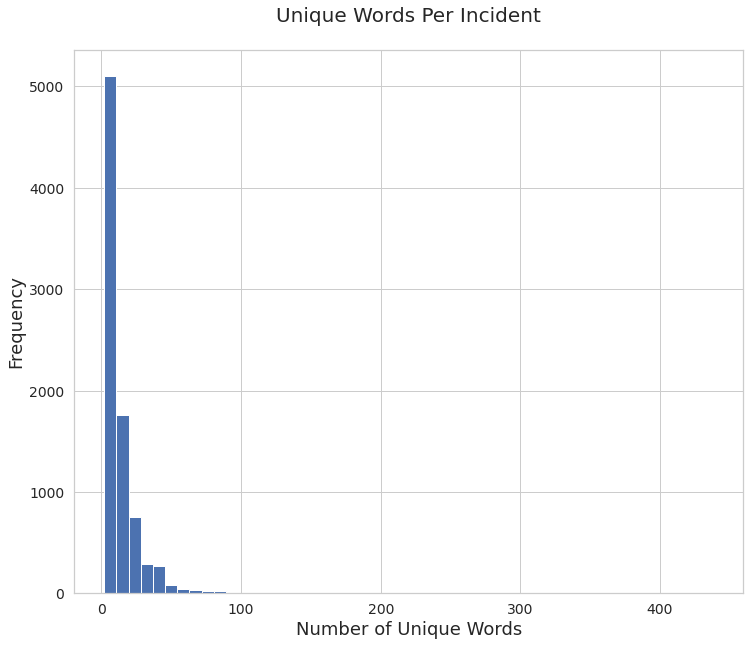

In [ ]:
ax=df_tranlated_inc['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Incident\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);


When we plot this into a chart, we can see that while the distribution of unique words is not skewed..


**Mean Number of Words in tickets per Assignment Group**

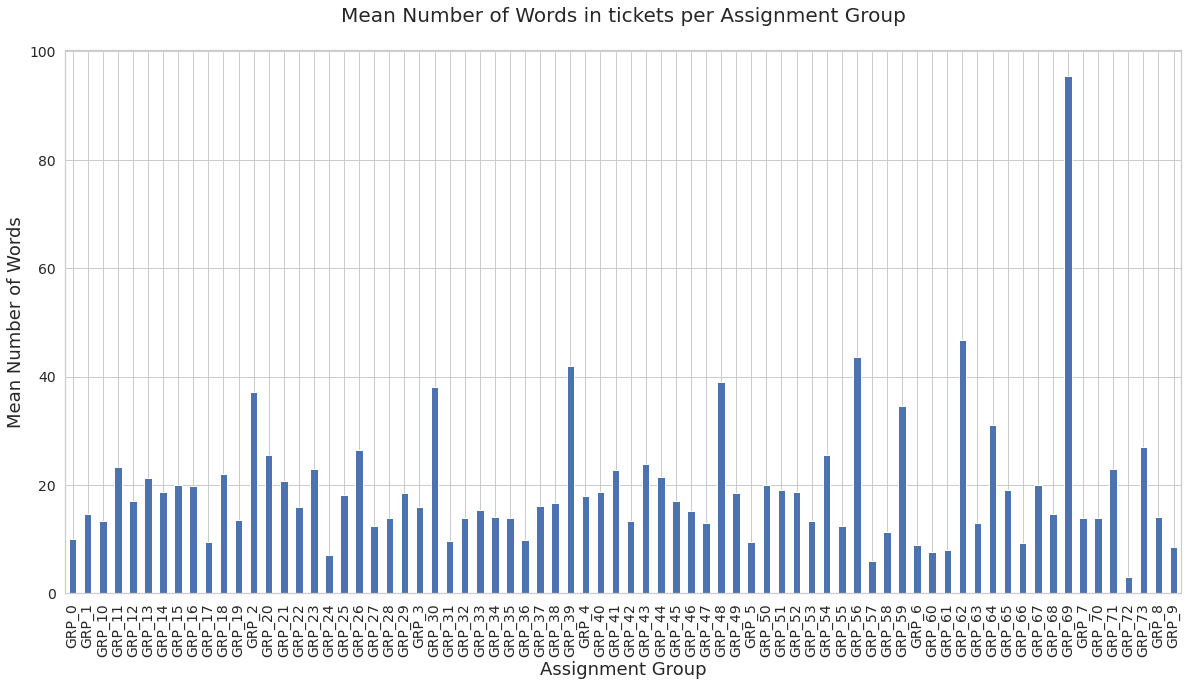

In [ ]:
assign_grps = df_tranlated_inc.groupby('Assignment group')
ax=assign_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

**Mean Number of Unique Words in tickets per Assignment Group**

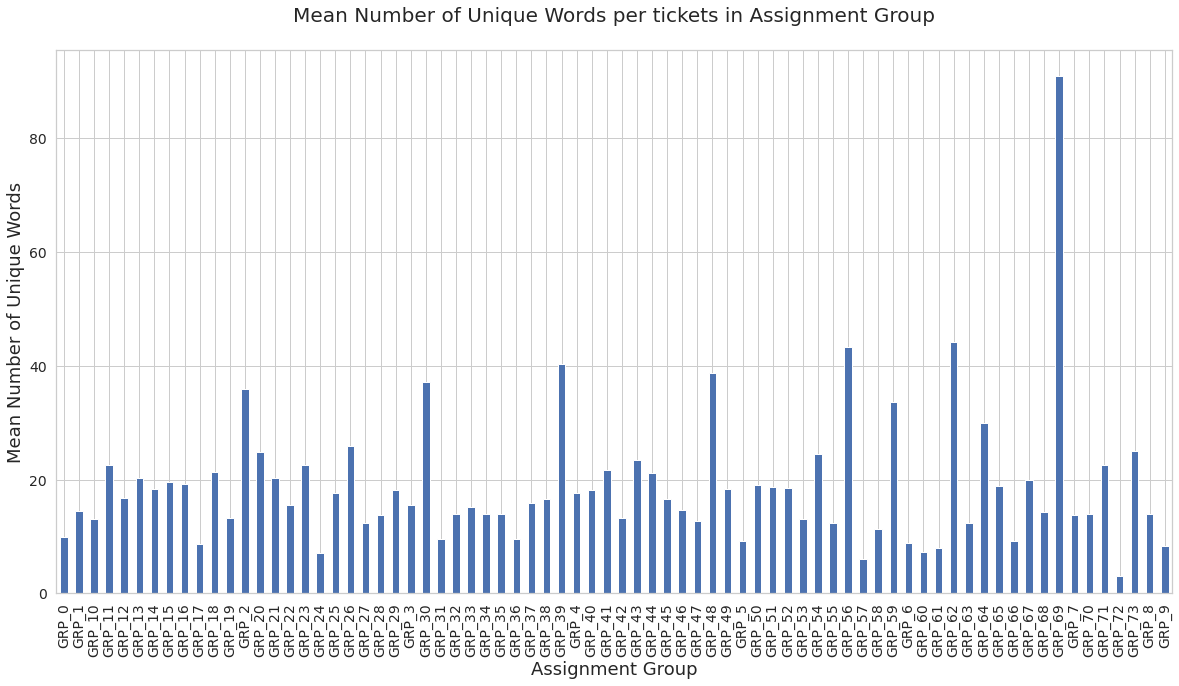

In [ ]:
ax=assign_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Unique Words per tickets in Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

Finally, let’s look at the most common words over the entire corpus.

In [ ]:
from collections import Counter
wd_counts = Counter()
for i, row in df_tranlated_inc.iterrows():
    wd_counts.update(row['cleaned_description'].split())

wd_counts.most_common(20)

[('password', 1181),
 ('erp', 1079),
 ('job', 1035),
 ('tool', 1009),
 ('issue', 1007),
 ('scheduler', 969),
 ('fail', 926),
 ('reset', 882),
 ('unable', 879),
 ('user', 878),
 ('work', 860),
 ('access', 745),
 ('sid', 741),
 ('need', 736),
 ('error', 734),
 ('account', 693),
 ('company', 671),
 ('ticket', 644),
 ('help', 627),
 ('get', 625)]

In [ ]:
df_tranlated_inc.tail()

Assignment group language  ...  avg_word  uniq_wds
8495           GRP_29       en  ...  5.222222         9
8496            GRP_0       en  ...  7.333333         3
8497            GRP_0       en  ...  6.333333         6
8498           GRP_62       en  ...  6.000000        12
8499           GRP_49       de  ...  4.600000        10

[5 rows x 6 columns]

#### **Tokenization**


Tokenization is a process that splits an input sequence into so-called tokens where the tokens can be a word, sentence, paragraph etc.

In [ ]:
import nltk
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_tranlated_inc['token_desc'] = df_tranlated_inc['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
df_tranlated_inc['token_desc'].head()

0    [able, ad, advise, caller, check, check, confi...
1    [advise, appear, calendar, correct, etc, kind,...
2                 [good, can, not, can, not, log, vpn]
3                     [access, hr, page, tool, unable]
4                                       [error, skype]
Name: token_desc, dtype: object

In [ ]:
# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

df_tranlated_inc['token_desc'] = df_tranlated_inc['token_desc'].apply(lambda x : combine_text(x))

In [ ]:
df_tranlated_inc.describe().T

count       mean        std  ...       50%        75%         max
num_wds   8425.0  13.420415  20.282487  ...  8.000000  16.000000  469.000000
avg_word  8425.0   5.707930   0.923351  ...  5.636364   6.294118   10.970588
uniq_wds  8425.0  13.129139  19.345166  ...  8.000000  16.000000  438.000000

[3 rows x 8 columns]

In [ ]:
df_tranlated_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8425 entries, 0 to 8499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Assignment group     8425 non-null   object 
 1   language             8425 non-null   object 
 2   cleaned_description  8425 non-null   object 
 3   num_wds              8425 non-null   int64  
 4   avg_word             8425 non-null   float64
 5   uniq_wds             8425 non-null   int64  
 6   token_desc           8425 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 526.6+ KB


In [ ]:
df_tranlated_inc.to_csv("cleaned_data.csv",index=False)

In [ ]:
df_tranlated_inc = pd.read_csv('cleaned_data.csv')
df_tranlated_inc.head()

Assignment group  ...                                         token_desc
0            GRP_0  ...  able ad advise caller check check confirm deta...
1            GRP_0  ...  advise appear calendar correct etc kind meetin...
2            GRP_0  ...                       good can not can not log vpn
3            GRP_0  ...                         access hr page tool unable
4            GRP_0  ...                                        error skype

[5 rows x 7 columns]

Let's create a copy of the clean df for modeling purpose.

In [ ]:
ticket_df = df_tranlated_inc
ticket_df.head()

Assignment group  ...                                         token_desc
0            GRP_0  ...  able ad advise caller check check confirm deta...
1            GRP_0  ...  advise appear calendar correct etc kind meetin...
2            GRP_0  ...                       good can not can not log vpn
3            GRP_0  ...                         access hr page tool unable
4            GRP_0  ...                                        error skype

[5 rows x 7 columns]

In [ ]:
#Recalling the top 10 grouops with highest ticket count
df_top_10 = ticket_df['Assignment group'].value_counts().nlargest(10).reset_index()
df_top_10

index  Assignment group
0   GRP_0              3970
1   GRP_8               661
2  GRP_24               289
3  GRP_12               257
4   GRP_9               252
5   GRP_2               241
6  GRP_19               215
7   GRP_3               200
8   GRP_6               184
9  GRP_13               145

## **Topic Modeling & LDA**

### **What is topic modelling?**

Topic modeling provides methods for automatically organizing, understanding, searching, and summarizing large electronic archives.
It can help with the following:
* discovering the hidden themes in the collection.
* classifying the documents into the discovered themes.
* using the classification to organize/ summarize/ search the documents.

For example, let’s say a document belongs to the topics food, dogs and health. So if a user queries “dog food”, they might find the above-mentioned document relevant because it covers those topics(among other topics). We are able to figure its relevance with respect to the query without even going through the entire document.

Therefore, by annotating the document, based on the topics predicted by the modeling method, we are able to optimize our search process.

##### **Topic Modeling**

Here for topic modeliing, we are using **Genism**.

Gensim = “Generate Similar” is a popular open source natural language processing (NLP) library used for unsupervised topic modeling. It uses top academic models and modern statistical machine learning to perform various complex tasks such as −

* Building document or word vectors
* Corpora
* Performing topic identification
* Performing document comparison (retrieving semantically similar documents)
* Analysing plain-text documents for semantic structure

Apart from performing the above complex tasks, Gensim, implemented in Python and Cython, is designed to handle large text collections using data streaming as well as incremental online algorithms. This makes it different from those machine learning software packages that target only in-memory processing.

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim

In [ ]:
#to process the simple_process gensim package as input needed as string
combined_text=ticket_df.cleaned_description.values.tolist()
#Convert the combined text from each sentense to the words. use of simple_process as it tokenize() internally
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

Note : Bigram is 2 consecutive words in a sentence. Trigram is 3 consecutive words in a sentence.

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)
wordclouds=' '.join(map(str, data_words_bigrams))

In [ ]:
#Copying to new dataframe to create wordclouds on target class
new_df = ticket_df.copy()
new_df['words'] = data_words_bigrams

In [ ]:
new_df.head()

Assignment group  ...                                              words
0            GRP_0  ...  [able, ad, advise_caller, check, check, confir...
1            GRP_0  ...  [advise, appear, calendar, correct, etc, kind,...
2            GRP_0  ...                 [good, can_not, can_not, log, vpn]
3            GRP_0  ...                   [access, hr, page, tool, unable]
4            GRP_0  ...                                     [error, skype]

[5 rows x 8 columns]

In [ ]:
new_df.tail()

Assignment group  ...                                              words
8420           GRP_29  ...  [advise, afternoon, come, email, good, mail, r...
8421            GRP_0  ...                        [issue, software_telephony]
8422            GRP_0  ...  [password, pedxruyf, reset, tifpdchb, vip, win...
8423           GRP_62  ...  [access, adjustment, drawer, finish, funcionan...
8424           GRP_49  ...  [area, can_not, cnc, different, open, pc, prog...

[5 rows x 8 columns]

In [ ]:
#Sorting based on frequency of target class Assignment group
value = new_df['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_17', 'GRP_7',
       'GRP_34', 'GRP_26', 'GRP_31', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_15',
       'GRP_42', 'GRP_20', 'GRP_45', 'GRP_22', 'GRP_1', 'GRP_11', 'GRP_21',
       'GRP_47', 'GRP_62', 'GRP_23', 'GRP_60', 'GRP_39', 'GRP_27', 'GRP_37',
       'GRP_36', 'GRP_44', 'GRP_50', 'GRP_65', 'GRP_53', 'GRP_52', 'GRP_30',
       'GRP_55', 'GRP_51', 'GRP_46', 'GRP_59', 'GRP_49', 'GRP_43', 'GRP_48',
       'GRP_32', 'GRP_66', 'GRP_63', 'GRP_56', 'GRP_38', 'GRP_58', 'GRP_68',
       'GRP_71', 'GRP_54', 'GRP_72', 'GRP_69', 'GRP_57', 'GRP_70', 'GRP_35',
       'GRP_64', 'GRP_73', 'GRP_67', 'GRP_61'],
      dtype='object')

### **LDA - Latent Dirichlet Allocation**

It is one of the most popular topic modeling methods. Each document is made up of various words, and each topic also has various words belonging to it. **The aim of LDA is to find topics a document belongs to, based on the words in it.**

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus from post clean data
texts = data_words_bigrams

# Term Document Frequency and Bag of words
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = LdaModel(corpus=corpus,id2word=id2word,num_topics=7,random_state=200,update_every=1,chunksize=800,passes=10,alpha='auto',per_word_topics=True)

#top 7 topics from the corpus
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
texts=data_words_bigrams

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

[(0,
  '0.033*"account" + 0.019*"lock" + 0.014*"new" + 0.013*"user" + 0.012*"check" '
  '+ 0.012*"name" + 0.012*"exurcwkm" + 0.011*"window" + 0.010*"ad" + '
  '0.010*"confirm"'),
 (1,
  '0.059*"unable" + 0.030*"outlook" + 0.027*"login" + 0.024*"connect" + '
  '0.019*"microsoft" + 0.018*"internet" + 0.017*"issue" + 0.015*"skype" + '
  '0.014*"user" + 0.014*"access"'),
 (2,
  '0.028*"company" + 0.023*"platform" + 0.022*"collaboration" + 0.020*"work" + '
  '0.020*"email" + 0.019*"ticket" + 0.018*"yes" + 0.017*"reset" + '
  '0.016*"global_gsc" + 0.016*"start"'),
 (3,
  '0.017*"error" + 0.015*"issue" + 0.014*"work" + 0.013*"need" + 0.013*"get" + '
  '0.012*"access" + 0.011*"erp" + 0.011*"help" + 0.010*"see" + 0.010*"tool"'),
 (4,
  '0.080*"password" + 0.078*"job" + 0.073*"scheduler" + 0.054*"reset" + '
  '0.050*"fail" + 0.049*"sid" + 0.040*"erp" + 0.023*"account" + 0.022*"tool" + '
  '0.020*"abended"'),
 (5,
  '0.012*"hostname" + 0.007*"type" + 0.007*"print" + 0.007*"would" + '
  '0.006*"mi

In natural language processing, perplexity is a way of evaluating language models.

A language model is a probability distribution over entire sentences or texts.

A low perplexity indicates the probability distribution is good at predicting the sample.

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4524751106168094


### **What is pyLDavis?**

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.045507  0.265260       1        1  38.701679
5     -0.118534 -0.069793       2        1  12.673705
1      0.012638  0.166566       3        1  11.909951
4      0.323897 -0.106792       4        1  10.567054
0      0.072919  0.025393       5        1   9.895492
6     -0.122868 -0.126861       6        1   9.812813
2     -0.122545 -0.153773       7        1   6.439306, topic_info=          Term        Freq       Total Category  logprob  loglift
178        job  877.000000  877.000000  Default  30.0000  30.0000
11    password  978.000000  978.000000  Default  29.0000  29.0000
202  scheduler  819.000000  819.000000  Default  28.0000  28.0000
35      unable  751.000000  751.000000  Default  27.0000  27.0000
12       reset  726.000000  726.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
122      phone  105.194517  325.635098   Topic7  -4.1793   1.6128
223      email  135.002743  564.882015   Topic7  -3.9298   1.3114
55      ticket  127.482874  536.694943   Topic7  -3.9871   1.3053
90        work  135.699965  765.199920   Topic7  -3.9247   1.0131
12       reset  114.586319  726.736326   Topic7  -4.0938   0.8955

[384 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
10034      4  0.992744       abende
11245      4  0.978407  abende_cold
9193       4  0.996786      abended
0          1  0.504894         able
0          3  0.315928         able
...      ...       ...          ...
132        4  0.102958        would
132        5  0.066620        would
132        6  0.006056        would
310        2  0.207504          yes
310        7  0.786000          yes

[512 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 2, 5, 1, 7, 3])

**Visualize data distribution in the dataset**

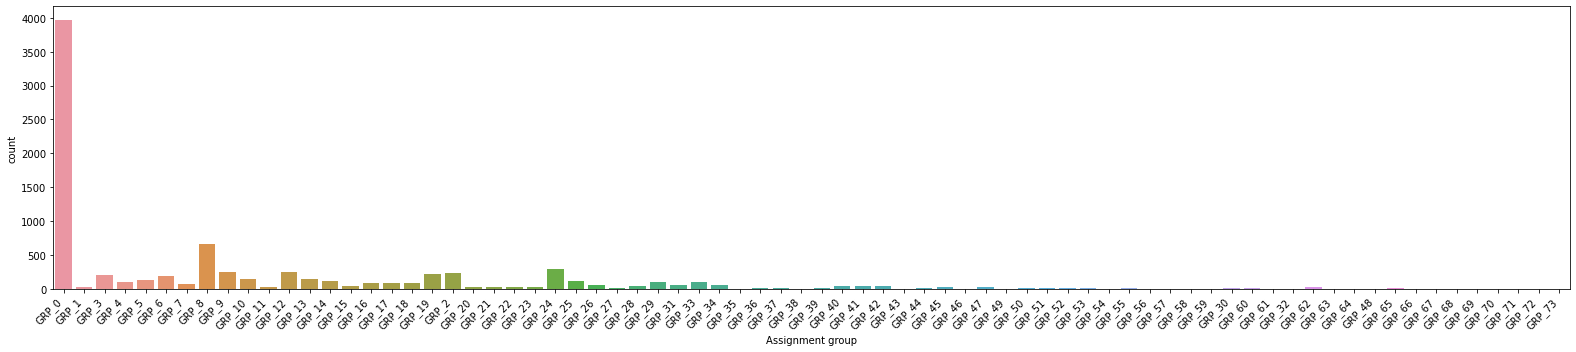

In [ ]:
  #Lets get the visual representation
  descending_order = ticket_df['Assignment group'].value_counts().sort_values(ascending=False).index
  plt.subplots(figsize=(22,5))
  ax=sns.countplot(x='Assignment group', data=ticket_df)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
  plt.tight_layout()
  plt.show()

Even after data cleaning process we can observe a lot of imbalance in the data distribution.

This imbalance in the dataset demands for further processing of the dataset with proper measures like resampling to build better performing prediction models.

In [ ]:
# shape before resampling
ticket_df.shape

(8425, 7)

In [ ]:
ticket_df.head()

Assignment group  ...                                         token_desc
0            GRP_0  ...  able ad advise caller check check confirm deta...
1            GRP_0  ...  advise appear calendar correct etc kind meetin...
2            GRP_0  ...                       good can not can not log vpn
3            GRP_0  ...                         access hr page tool unable
4            GRP_0  ...                                        error skype

[5 rows x 7 columns]

## **Build Models & Evaluate**


**Overview of this step:**

  *   Traditional machine learning algorithms meant for classification problem solving will be tried against the vectorized features generated out of TF-IDF.

  *   Comparison of the model accuracy for selecting best performing model.

  *   Analyse & check for possible improvements, if required.



In [ ]:
import warnings
# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier

# Tools & Evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [ ]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [ ]:
log_cols=["Classifier","Training accuracy","Testing accuracy","f1-score","Recall"]
log = pd.DataFrame(columns=log_cols)

emptyArr = []
cbArr = []

In [ ]:
import sys
# A method to train and test the model
def run_classification(Prediction_model, X_train, X_test, y_train, y_test, cbArr, arch_name=None, pipelineRequired=True, isDeepModel=False) :
  clf = Prediction_model

  if pipelineRequired :
     clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', Prediction_model),])

  if isDeepModel :
     if cbArr:
       clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128, verbose=True, callbacks=cbArr)
     else:
       clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1)
     # predict from the classifier
     y_pred = clf.predict(X_test)
     y_predOrginal = clf
     y_pred = np.argmax(y_pred, axis=1)
     y_train_pred = clf.predict(X_train)
     y_train_pred = np.argmax(y_train_pred, axis=1)
  else :
    clf.fit(X_train, y_train)
    # predict from the classifier
    y_pred = clf.predict(X_test)
    y_predOrginal = clf
    y_train_pred = clf.predict(X_train)

  np.set_printoptions(threshold=np.inf)
  print('Prediction Model:', Prediction_model)
  print('-'*80)
  print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
  print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
  print('-'*80)
  #print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
  cm = confusion_matrix(y_test, y_pred)
  print(cm.shape)
  print('Confusion Matrix:\n')
  print(cm)
  print("\n")
  print('-'*80)
  print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
  log_entry = []
  nameVar = ""
  nameVar = str(Prediction_model)
  predModName = []
  predModName = nameVar.split("(")[0]
  log_entry = pd.DataFrame([[predModName,accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred,average='weighted'),recall_score(y_test,y_pred,average='weighted')]], columns=log_cols)
  return log_entry, y_predOrginal
  # return log.append(log_entry)

In [ ]:
df_inc_sample2 = ticket_df[ticket_df['Assignment group'].map(ticket_df['Assignment group'].value_counts()) > 0]
x2 = ticket_df['cleaned_description']
y2 = ticket_df['Assignment group']

### **Traditional ML Models - without resampling**

**Traditional ML Models considered:**

  *   Multinomial Naive Bayes
  *   K Nearest neighbor (KNN)
  *   Support Vector Machine
  *   Decision Tree
  *   Random Forest
  *   Logistic Regression
  *   Ada Boost Classifier
  *   Bagging Classifier
  *   XG Boost Classifier

In [ ]:
# Create training and test datasets with 80:20 ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2,
                                                    y2,
                                                    test_size=0.20,
                                                    random_state=13)
print('\033[1mShape of the training set:\033[0m', X_train2.shape, X_test2.shape)
print('\033[1mShape of the test set:\033[0m', y_train2.shape, y_test2.shape)

Shape of the training set: (6740,) (1685,)
Shape of the test set: (6740,) (1685,)


In [ ]:
# Copy of Original X_train2 & X_test2
X_trainOrg2 = X_train2
X_testOrg2 = X_test2
# Copy of Original of y_train2 & y_test2
y_trainOrg2 = y_train2
y_testOrg2 = y_test2

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels
y_train2 = encoder.fit_transform(y_trainOrg2)
y_test2 = encoder.fit_transform(y_testOrg2)

### **Naive Bayes**

Naive Bayes method is a probabilistic model on set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.Naive Bayes classifier can be extremely fast compared to more sophisticated methods.

In [ ]:
log_cols3=["Classifier","Training accuracy","Testing accuracy","f1-score","Recall"]
log3 = pd.DataFrame(columns=log_cols3)

emptyArr = []
cbArr = []

In [ ]:
logTmp = []
logTmp, y_pred_MultinomialNB2 = run_classification(MultinomialNB(), X_train2, X_test2, y_train2, y_test2, emptyArr)
logTmp['Classifier'] = "Naive Bayes Model - without Sampling"
log3 = log3.append(logTmp)

Prediction Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
--------------------------------------------------------------------------------
Training accuracy: 57.61%
Testing accuracy: 48.19%
--------------------------------------------------------------------------------
(64, 64)
Confusion Matrix:

[[781   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   2]
 [ 13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    

In [ ]:
log3

Classifier  Training accuracy  ...  f1-score    Recall
0  Naive Bayes Model - without Sampling           0.576113  ...  0.361704  0.481899

[1 rows x 5 columns]

### **K-Nearest Neighbor (KNN)- Without Sampling**

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these.Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.


In [ ]:
logTmp = []
logTmp, y_pred_KNeighbors2 = run_classification(KNeighborsClassifier(), X_train2, X_test2, y_train2, y_test2, emptyArr)
logTmp['Classifier'] = "KNN Model - without Sampling"
log3 = log3.append(logTmp)

Prediction Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
--------------------------------------------------------------------------------
Training accuracy: 70.65%
Testing accuracy: 54.12%
--------------------------------------------------------------------------------
(66, 66)
Confusion Matrix:

[[769   0   0   0   3   0   0   0   0   0   1   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   2   0   1]
 [  0   2   0   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1   0]
 [  5   

In [ ]:
log3

Classifier  Training accuracy  ...  f1-score    Recall
0  Naive Bayes Model - without Sampling           0.576113  ...  0.361704  0.481899
0          KNN Model - without Sampling           0.706528  ...  0.466402  0.541246

[2 rows x 5 columns]

### **Support Vector Machine (SVM)- Without Sampling**

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

**Linear SVM**

The algorithm creates a line or a hyperplane which separates the data into classes.

The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function.

In [ ]:
# SVM with Linear kernel
logTmp = []
logTmp, y_pred_LinearSVC2 = run_classification(LinearSVC(), X_train2, X_test2, y_train2, y_test2, emptyArr)
logTmp['Classifier'] = "Linear SVM Model - without Sampling"
log3 = log3.append(logTmp)

Prediction Model: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
--------------------------------------------------------------------------------
Training accuracy: 92.97%
Testing accuracy: 56.26%
--------------------------------------------------------------------------------
(66, 66)
Confusion Matrix:

[[743   0   1   0   6   1   2   0   0   0   1   5   2   1   1   1   0   2
    0   1   0   0   0   6   0   0   0   0   0   0   0   0   0   1   1   0
    1   0   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0
    0   1   0   0   0   0   0   0   0   2   0   0]
 [  1   2   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   

In [ ]:
log3

Classifier  Training accuracy  ...  f1-score    Recall
0  Naive Bayes Model - without Sampling           0.576113  ...  0.361704  0.481899
0          KNN Model - without Sampling           0.706528  ...  0.466402  0.541246
0   Linear SVM Model - without Sampling           0.929674  ...  0.519584  0.562611

[3 rows x 5 columns]

### **Decision Trees- Without Sampling**

Decision Trees Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

In [ ]:
logTmp = []
logTmp, y_pred_DecisionTree2 = run_classification(DecisionTreeClassifier(), X_train2, X_test2, y_train2, y_test2, emptyArr)
logTmp['Classifier'] = "Decision Trees Model - without Sampling"
log3 = log3.append(logTmp)

Prediction Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
--------------------------------------------------------------------------------
Training accuracy: 95.31%
Testing accuracy: 48.84%
--------------------------------------------------------------------------------
(66, 66)
Confusion Matrix:

[[649   0   2   0   7   6   6   2   8   1   2  10  16   0   0   2   1   6
    5   5   3   5   2  12   0   3   0   9   3   0   0   1   0   1   1   2
    0   0   1   1   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   1   0   0   0   1   0   0   0   2   1   3]
 [  1   1   0   0   2   0   0   0   0   0

In [ ]:
log3

Classifier  ...    Recall
0     Naive Bayes Model - without Sampling  ...  0.481899
0             KNN Model - without Sampling  ...  0.541246
0      Linear SVM Model - without Sampling  ...  0.562611
0  Decision Trees Model - without Sampling  ...  0.488427

[4 rows x 5 columns]

### **Random Forest Classifier- Without Sampling**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.Essentially, Random Forest is a good model if we want high performance with less need for interpretation.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

logTmp = []
logTmp, y_pred_RandomForest2 = run_classification(RandomForestClassifier(n_estimators=100), X_train2, X_test2, y_train2, y_test2, emptyArr)
logTmp['Classifier'] = "Random Forest Classifier Model - without Sampling"
log3 = log3.append(logTmp)

Prediction Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Training accuracy: 95.31%
Testing accuracy: 54.84%
--------------------------------------------------------------------------------
(66, 66)
Confusion Matrix:

[[768   0   0   0   2   1   0   0   0   0   0   1   1   0   0   0   1   2
    1   1   0   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0 

In [ ]:
log3

Classifier  ...    Recall
0               Naive Bayes Model - without Sampling  ...  0.481899
0                       KNN Model - without Sampling  ...  0.541246
0                Linear SVM Model - without Sampling  ...  0.562611
0            Decision Trees Model - without Sampling  ...  0.488427
0  Random Forest Classifier Model - without Sampling  ...  0.548368

[5 rows x 5 columns]

### **Logistic Regression- Without Sampling**

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).


In [ ]:
from sklearn.linear_model import LogisticRegression

logTmp = []
logTmp, y_pred_LogReg2 = run_classification(LogisticRegression(), X_train2, X_test2, y_train2, y_test2, emptyArr)
logTmp['Classifier'] = "Logistic Regression Model - without Sampling"
log3 = log3.append(logTmp)

Prediction Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------------------------------------------------------------------
Training accuracy: 69.17%
Testing accuracy: 53.95%
--------------------------------------------------------------------------------
(66, 66)
Confusion Matrix:

[[772   0   0   0   3   1   0   0   0   2   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   2   0   0]
 [  2   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
log3

Classifier  ...    Recall
0               Naive Bayes Model - without Sampling  ...  0.481899
0                       KNN Model - without Sampling  ...  0.541246
0                Linear SVM Model - without Sampling  ...  0.562611
0            Decision Trees Model - without Sampling  ...  0.488427
0  Random Forest Classifier Model - without Sampling  ...  0.548368
0       Logistic Regression Model - without Sampling  ...  0.539466

[6 rows x 5 columns]

### **ADA Boost Classifier- Without Classifier**

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
logTmp = []
dtc2 = DecisionTreeClassifier(max_depth=7)

logTmp, y_pred_AdaBoost2 = run_classification(AdaBoostClassifier(n_estimators= 200, base_estimator=dtc2, learning_rate=0.1, random_state=22), X_train2, X_test2, y_train2, y_test2, emptyArr)
logTmp['Classifier'] = "ADA Boost Classifier Model - without Sampling"
log3 = log3.append(logTmp)

Prediction Model: AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=7,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
        

In [ ]:
log3

Classifier  ...    Recall
0               Naive Bayes Model - without Sampling  ...  0.481899
0                       KNN Model - without Sampling  ...  0.541246
0                Linear SVM Model - without Sampling  ...  0.562611
0            Decision Trees Model - without Sampling  ...  0.488427
0  Random Forest Classifier Model - without Sampling  ...  0.548368
0       Logistic Regression Model - without Sampling  ...  0.539466
0      ADA Boost Classifier Model - without Sampling  ...  0.502077

[7 rows x 5 columns]

### **Bagging Classifier-Wihout Sampling**

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [ ]:
logTmp = []
logTmp, y_pred_Bagging2 = run_classification(BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, n_jobs=4, random_state=22), X_train2, X_test2, y_train2, y_test2, emptyArr)
logTmp['Classifier'] = "Bagging Classifier Model - without Sampling"
log3 = log3.append(logTmp)

Prediction Model: BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.7, n_estimators=100, n_jobs=4,
                  oob_score=True, random_state=22, verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Training accuracy: 93.62%
Testing accuracy: 54.36%
--------------------------------------------------------------------------------
(66, 66)
Confusion Matrix:

[[746   0   1   0   4   5   1   0   4   0   0   4   2   0   0   0   0   5
    1   0   0   0   0   2   0   0   0   1   0   0   0   0   0   0   0   0
    1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   1   1   0]
 [  1   2   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    

In [ ]:
log3

Classifier  ...    Recall
0               Naive Bayes Model - without Sampling  ...  0.481899
0                       KNN Model - without Sampling  ...  0.541246
0                Linear SVM Model - without Sampling  ...  0.562611
0            Decision Trees Model - without Sampling  ...  0.488427
0  Random Forest Classifier Model - without Sampling  ...  0.548368
0       Logistic Regression Model - without Sampling  ...  0.539466
0      ADA Boost Classifier Model - without Sampling  ...  0.502077
0        Bagging Classifier Model - without Sampling  ...  0.543620

[8 rows x 5 columns]

### **XG Boost Classifier-Without Sampling**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve the problem in a fast and accurate way.

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
logTmp = []
logTmp, y_pred_XGBoost2 = run_classification(XGBClassifier(n_estimators=100, max_depth=7, min_child_weight=6, colsample_bytree=0.8, subsample=0.8,n_jobs=4, learning_rate=0.1), X_train2, X_test2, y_train2, y_test2, emptyArr)
logTmp['Classifier'] = "XG Boost Classifier Model - without Sampling"
log3 = log3.append(logTmp)

Prediction Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=6, missing=None, n_estimators=100, n_jobs=4,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
--------------------------------------------------------------------------------
Training accuracy: 71.20%
Testing accuracy: 52.70%
--------------------------------------------------------------------------------
(66, 66)
Confusion Matrix:

[[747   0   0   0   6   2   2   0   6   0   0   5   3   0   0   0   0   1
    1   2   0   0   0   3   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0 

In [ ]:
log3

Classifier  ...    Recall
0               Naive Bayes Model - without Sampling  ...  0.481899
0                       KNN Model - without Sampling  ...  0.541246
0                Linear SVM Model - without Sampling  ...  0.562611
0            Decision Trees Model - without Sampling  ...  0.488427
0  Random Forest Classifier Model - without Sampling  ...  0.548368
0       Logistic Regression Model - without Sampling  ...  0.539466
0      ADA Boost Classifier Model - without Sampling  ...  0.502077
0        Bagging Classifier Model - without Sampling  ...  0.543620
0       XG Boost Classifier Model - without Sampling  ...  0.527003

[9 rows x 5 columns]

### **Comparison of Traditional ML Models - without Sampling**

In [ ]:
logObs3 = log3
logObs3.set_index(["Classifier"],inplace=True)
logObs3.sort_values(by=['f1-score'])

Training accuracy  ...    Recall
Classifier                                                            ...          
Naive Bayes Model - without Sampling                        0.576113  ...  0.481899
ADA Boost Classifier Model - without Sampling               0.661128  ...  0.502077
Logistic Regression Model - without Sampling                0.691691  ...  0.539466
XG Boost Classifier Model - without Sampling                0.712018  ...  0.527003
KNN Model - without Sampling                                0.706528  ...  0.541246
Decision Trees Model - without Sampling                     0.953116  ...  0.488427
Random Forest Classifier Model - without Sampling           0.953116  ...  0.548368
Bagging Classifier Model - without Sampling                 0.936202  ...  0.543620
Linear SVM Model - without Sampling                         0.929674  ...  0.562611

[9 rows x 4 columns]

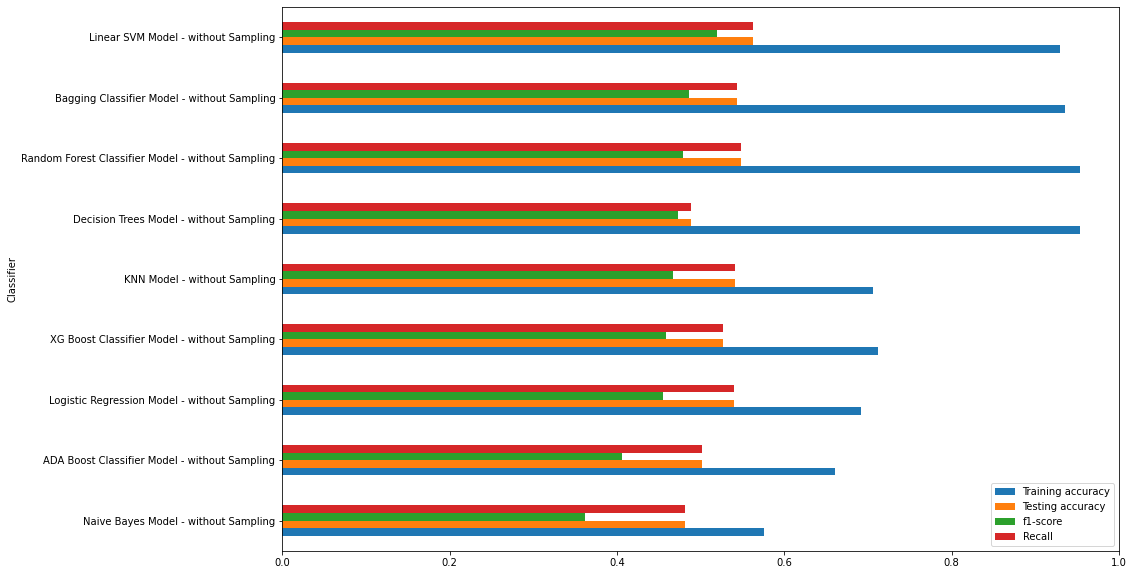

In [ ]:
logObs3.sort_values(by=['f1-score']).plot(kind='barh',figsize=[15,10])

**Observation:**

We first analysed the dataset provided to us, undestood the structure of the data provided - number of columns, field , datatypes etc.

We did Exploratory Data Analysis to derive further insights from this data set and we found that Data is very much imbalanced, there are around ~45% of the Groups with less than 20 tickets.

 Few of the tickets are in foreign language like German The data has lot of noise in it, for eg- few tickets related to account setup are spread across multiple assignment groups. We performed the data cleaning, google translation and preprocessing.

 Here in this comparison of different traditional ML models, we can observe a substantial difference in the accuracy of training and test sets.
 Major reason is possibly the imbalanced data distribution of the dataset used and the inability of the model to learn and adapt during training.

 We need to check if these issues can be handled by resampled data and using deep learning techniques.

## **Model Improvement 1: Utlizing Deep Learning Techniques**

*   List item

*   List item
*   List item


*   List item



#### **Deep Learning Models - without Sampling**
Deep learning is a subset of machine learning where artificial neural networks, algorithms inspired by the human brain, learn from large amounts of data. Similarly to how we learn from experience, the deep learning algorithm would perform a task repeatedly, each time tweaking it a little to improve the outcome. We refer to ‘deep learning’ because the neural networks have various (deep) layers that enable learning.
**Deep Learmning Models considered:**
  *   Recurrent Neural Network(RNN)-LSTM Model:
  Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. LSTM is well-suited to classify, process and predict time series given time lags of unknown duration. It trains the model by using back-propagation.
  *   Recurrent Neural Network(RNN)-GRU Model: GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize.They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the output neither they have the output gate.
  *   Bidirectional LSTM Model: Bidirectional recurrent neural networks(RNN) are really just putting two independent RNNs together. This structure allows the networks to have both backward and forward information about the sequence at every time step. Using bidirectional will run your inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backwards you preserve information from the future and using the two hidden states combined you are able in any point in time to preserve information from both past and future.

### **Importing needed libraries to create the model:**


1.   Importing sequence flow
2.   Importing Input layers, Droup out module Flattenn layer, Dense layer module, Embedding laye module, LSTM and GRU modules
3.   Importing BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D, SpatialDropout1D modules
4.   Importing Text Tokenizer module and concatenating module






In [ ]:
from keras.models import Sequential, Model
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.layers.merge import Concatenate

### **Embedding Matrix creation:**
*   Instead of learning word embeddings jointly with the problem we want to solve, we prefer loading embedding vectors from a pre-computed embedding space known to be highly structured and to exhibit useful properties – that captures generic aspects of language structure.
*   Such word embeddings are generally computed using word occurrence statistics (observations about what words co-occur in sentences or documents), using a variety of techniques, some involving neural networks, others not. In our case, we will use GloVe.
*   GloVe- developed by Stanford researchers in 2014. It stands for “Global Vectors for Word Representation”, and it is an embedding technique based on factorizing a matrix of word co-occurrence statistics. Its developers have made available pre-computed embeddings for millions of English tokens, obtained from Wikipedia data or from Common Crawl data.
*   GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.
*   The GloVe model is trained on the non-zero entries of a global word-word co-occurrence matrix, which tabulates how frequently words co-occur with one another in a given corpus. Populating this matrix requires a single pass through the entire corpus to collect the statistics.
*   We are using glove.6B.200d.txt which is Glove embeddings with 6 Billion words with each word being a 200 dimensional vector.





In [ ]:
# Create embedding matrix
EMBEDDING_FILE = 'glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=400000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

In [ ]:
def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("Could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

### Load the GloVe embeddings in the model
The embedding layer has a single weight matrix: a 2D float matrix where each entry i is the word vector meant to be associated with index i. Simple enough. Load the GloVe matrix you prepared into the embedding layer, the first layer in the model.

In [ ]:
# Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train2,X_test2,EMBEDDING_FILE)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

Found 12183 unique tokens.
(8425, 500)
Total 400000 word vectors.


### **Recurrent Neural Network(RNN) - LSTM Model - without Sampling**

Defining the model can be done with below points:

1. we've used Keras' Sequential() to instantiate a model. It takes a group of sequential layers and stacks them together into a single model. Into the Sequential() constructor, we pass a list that contains the layers we want to use in our model.

2. We've made several Dense layers and a single Dropout layer in this model. We've made the input_shape equal to the Maximum Sequenec Length

3. We defined Embedding Layer on the first layer as the input of that layer.

4. There are 200 neurons in Convolution layers and It has relu as activation funtionand 128 neurosn for LSTM layer.

5. There's 100 neurons in dense layer. This is typically up to testing - putting in more neurons per layer will help extract more features, but these can also sometimes work against the goal.It has relu as activation funtion

6. Finally, we have a Dense layer with size as the output layer. It has the Softmax activation function.

7. At last, we measure the loss with ategorical cross entropy fucntion, The efficient ADAM optimization algorithm is used to find the weights and the accuracy metric is calculated and reported each epoch.

In [ ]:
def Build_Model_RNN_Text(word_index, embeddings_matrix,ytrain,nclasses,dropout=0.5):
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    model.add(Input(shape=(MAX_SEQUENCE_LENGTH,),dtype=tf.int64))
    model.add(embedding_layer)
    model.add(Conv1D(200,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Conv1D(200,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(128))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(len((pd.Series(ytrain)).unique()),activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    print(model.summary())
    return model

In [ ]:
model_RNN = Build_Model_RNN_Text(word_index,embedding_matrix,y_train2,17)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 200)          2436800   
_________________________________________________________________
conv1d (Conv1D)              (None, 491, 200)          400200    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 245, 200)          0         
_________________________________________________________________
dropout (Dropout)            (None, 245, 200)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 236, 200)          400200    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 118, 200)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               1

In [ ]:
log_cols2=["Classifier","Training accuracy","Testing accuracy","f1-score","Recall"]
log2 = pd.DataFrame(columns=log_cols2)

#### We have to add some call backs to the model for early stopping and reduce on plateau if we see no improvement in loss

In [ ]:
# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('rnn_model.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)

In [ ]:
logTmp2 = []
cbArr = [es, mc, rl]
logTmp2, y_pred_RNNmodel = run_classification(model_RNN, X_train_Glove, X_test_Glove, y_train2, y_test2, cbArr, pipelineRequired = False,isDeepModel=True)
logTmp2['Classifier'] = "RNN-LSTM Model - without Sampling"
log2 = log2.append(logTmp2)

Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 2.7141 - accuracy: 0.4660
Epoch 00001: val_accuracy improved from -inf to 0.46350, saving model to rnn_model.h5
53/53 [==============================] - 8s 155ms/step - loss: 2.7141 - accuracy: 0.4660 - val_loss: 3.2162 - val_accuracy: 0.4635
Epoch 2/10
53/53 [==============================] - ETA: 0s - loss: 2.4609 - accuracy: 0.4881
Epoch 00002: val_accuracy did not improve from 0.46350
53/53 [==============================] - 6s 122ms/step - loss: 2.4609 - accuracy: 0.4881 - val_loss: 3.2591 - val_accuracy: 0.4629
Epoch 3/10
53/53 [==============================] - ETA: 0s - loss: 2.3838 - accuracy: 0.4896
Epoch 00003: val_accuracy did not improve from 0.46350
53/53 [==============================] - 6s 122ms/step - loss: 2.3838 - accuracy: 0.4896 - val_loss: 3.2927 - val_accuracy: 0.4617
Epoch 4/10
53/53 [==============================] - ETA: 0s - loss: 2.2980 - accuracy: 0.4917
Epoch 00004: val_accuracy did not i

### Performance of the RNN with LSTM

In [ ]:
log2

Classifier  Training accuracy  ...  f1-score    Recall
0  RNN-LSTM Model - without Sampling           0.496439  ...  0.307287  0.464688

[1 rows x 5 columns]

 ### **Recurrent Neural Network(RNN) - GRU Model - without Sampling**

Model can be defined as:

1. we've used Keras' Sequential() to instantiate a model. It takes a group of sequential layers and stacks them together into a single model. Into the Sequential() constructor, we pass a list that contains the layers we want to use in our model.

2. We've made several Dense layers and a single Dropout layer in this model. We've made the input_shape equal to the Maximum Sequence Length

3. We defined Embedding Layer on the first layer as the input of that layer.

4. We added a GRU function layer with 128 neurons.

5. There's 100 neurons in dense layer. This is typically up to testing - putting in more neurons per layer will help extract more features, but these can also sometimes work against the goal.It has relu as activation funtion

6. Finally, we have a Dense layer with size as the output layer. It has the Softmax activation function.

7. At last, we measure the loss with ategorical cross entropy fucntion, The efficient ADAM optimization algorithm is used to find the weights and the accuracy metric is calculated and reported each epoch.

In [ ]:
# Build GRU model
def Build_Model_RNNGRU_Text(word_index, embeddings_matrix, ytrain, nclasses, dropout=0.5):

    input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype=tf.int64)
    embed = Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embeddings_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True)(input_layer)
    gru=GRU(128)(embed)
    drop=Dropout(0.3)(gru)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(ytrain)).unique()),activation='softmax')(dense)
    model = Model(input_layer,out)
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
    # Print model summary
    print(model.summary())
    return model

#### We have to add some call backs to the model for early stopping and reduce on plateau if we see no improvement in loss

In [ ]:
# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('rnnGru_model.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)

In [ ]:
model_RNNGRU = Build_Model_RNNGRU_Text(word_index,embedding_matrix,y_train2,17)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 200)          2436800   
_________________________________________________________________
gru (GRU)                    (None, 128)               126720    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_3 (Dense)              (None, 71)                7171      
Total params: 2,583,591
Trainable params: 2,583,591
Non-trainable params: 0
____________________________________________

In [ ]:
logTmp2 = []
cbArr = [es, mc, rl]
logTmp2, y_pred_RNNGRUmodel = run_classification(model_RNNGRU, X_train_Glove, X_test_Glove, y_train2, y_test2, cbArr, pipelineRequired = False,isDeepModel=True)
logTmp2['Classifier'] = "RNN-GRU Model - without Sampling"
log2 = log2.append(logTmp2)

Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 2.6152 - accuracy: 0.4681
Epoch 00001: val_loss improved from inf to 3.04671, saving model to rnnGru_model.h5
53/53 [==============================] - 6s 113ms/step - loss: 2.6152 - accuracy: 0.4681 - val_loss: 3.0467 - val_accuracy: 0.4629
Epoch 2/10
53/53 [==============================] - ETA: 0s - loss: 1.9830 - accuracy: 0.5496
Epoch 00002: val_loss did not improve from 3.04671
53/53 [==============================] - 5s 93ms/step - loss: 1.9830 - accuracy: 0.5496 - val_loss: 3.1346 - val_accuracy: 0.4849
Epoch 3/10
53/53 [==============================] - ETA: 0s - loss: 1.7361 - accuracy: 0.5850
Epoch 00003: val_loss did not improve from 3.04671
53/53 [==============================] - 5s 94ms/step - loss: 1.7361 - accuracy: 0.5850 - val_loss: 3.1953 - val_accuracy: 0.5021
Epoch 4/10
53/53 [==============================] - ETA: 0s - loss: 1.5411 - accuracy: 0.6174
Epoch 00004: val_loss did not improve from 3.04

### Performance of the RNN with LSTM and RNN wih GRU model

In [ ]:
log2

Classifier  Training accuracy  ...  f1-score    Recall
0  RNN-LSTM Model - without Sampling           0.496439  ...  0.307287  0.464688
0   RNN-GRU Model - without Sampling           0.643917  ...  0.431207  0.513353

[2 rows x 5 columns]

### **LSTM model (Bidirectional)  - without Sampling**

---



---



In [ ]:
len(word_index) + 1

12184

  Model can be defined as:

1. We created two copies of the hidden layer, one fit in the input sequences as-is and one on a reversed copy of the input sequence. By default, the output values from these LSTMs will be concatenated.

2. We defined Embedding Layer on the first layer as the input of that layer.

4. We added a LSTM layer with 128 neurons.

5. There's 100 neurons in dense layer. This is typically up to testing - putting in more neurons per layer will help extract more features, but these can also sometimes work against the goal.It has relu as activation funtion

6. Finally, we have a Dense layer with size as the output layer. It has the Softmax activation function.

7. At last, we measure the loss with ategorical cross entropy fucntion,The efficient ADAM optimization algorithm is used to find the weights and the accuracy metric is calculated and reported each epoch.

In [ ]:
def Build_Model_BiDirLSTM_Text(word_index, embeddings_matrix,ytrain):
  vocab_size = len(word_index) + 1
  input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype=tf.int64)
  embed = Embedding(input_dim=vocab_size, output_dim=200, weights=[embeddings_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True)(input_layer)
  lstm = Bidirectional(LSTM(128))(embed)
  drop = Dropout(0.3)(lstm)
  dense = Dense(100,activation='relu')(drop)
  out = Dense(len((pd.Series(ytrain)).unique()),activation='softmax')(dense)
  model = Model(input_layer,out)
  # Compile the model
  model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
  # Print model summary
  print(model.summary())
  return model

#### We have to add some call backs to the model for early stopping and reduce on plateau if we see no improvement in loss

In [ ]:
# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('bidirlstm_model.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)

In [ ]:
model_BiDirLSTM = Build_Model_BiDirLSTM_Text(word_index,embedding_matrix,y_train2)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 500, 200)          2436800   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               336896    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_5 (Dense)              (None, 71)                7171      
Total params: 2,806,567
Trainable params: 2,806,567
Non-trainable params: 0
____________________________________________

In [ ]:
logTmp2 = []
cbArr = [es, mc, rl]
logTmp2, y_pred_BiDirLSTM = run_classification(model_BiDirLSTM, X_train_Glove, X_test_Glove, y_train2, y_test2, cbArr, pipelineRequired = False,isDeepModel=True)
logTmp2['Classifier'] = "BiDirectional LSTM Model - without Sampling"
log2 = log2.append(logTmp2)

Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 2.5617 - accuracy: 0.4812
Epoch 00001: val_accuracy improved from -inf to 0.47537, saving model to bidirlstm_model.h5
53/53 [==============================] - 10s 191ms/step - loss: 2.5617 - accuracy: 0.4812 - val_loss: 3.0234 - val_accuracy: 0.4754
Epoch 2/10
53/53 [==============================] - ETA: 0s - loss: 1.9430 - accuracy: 0.5613
Epoch 00002: val_accuracy improved from 0.47537 to 0.49674, saving model to bidirlstm_model.h5
53/53 [==============================] - 9s 164ms/step - loss: 1.9430 - accuracy: 0.5613 - val_loss: 3.1376 - val_accuracy: 0.4967
Epoch 3/10
53/53 [==============================] - ETA: 0s - loss: 1.6776 - accuracy: 0.5981
Epoch 00003: val_accuracy improved from 0.49674 to 0.51217, saving model to bidirlstm_model.h5
53/53 [==============================] - 9s 170ms/step - loss: 1.6776 - accuracy: 0.5981 - val_loss: 3.2174 - val_accuracy: 0.5122
Epoch 4/10
53/53 [========================

In [ ]:
log2

Classifier  ...    Recall
0            RNN-LSTM Model - without Sampling  ...  0.464688
0             RNN-GRU Model - without Sampling  ...  0.513353
0  BiDirectional LSTM Model - without Sampling  ...  0.525223

[3 rows x 5 columns]

### Performance comparion of the RNN with LSTM, RNN wih GRU model and Bidirectional LSTM model

In [ ]:
logObs2 = log2
logObs2.set_index(["Classifier"],inplace=True)
logObs2.sort_values(by=['f1-score'])

Training accuracy  ...    Recall
Classifier                                                      ...          
RNN-LSTM Model - without Sampling                     0.496439  ...  0.464688
RNN-GRU Model - without Sampling                      0.643917  ...  0.513353
BiDirectional LSTM Model - without Sampling           0.659050  ...  0.525223

[3 rows x 4 columns]

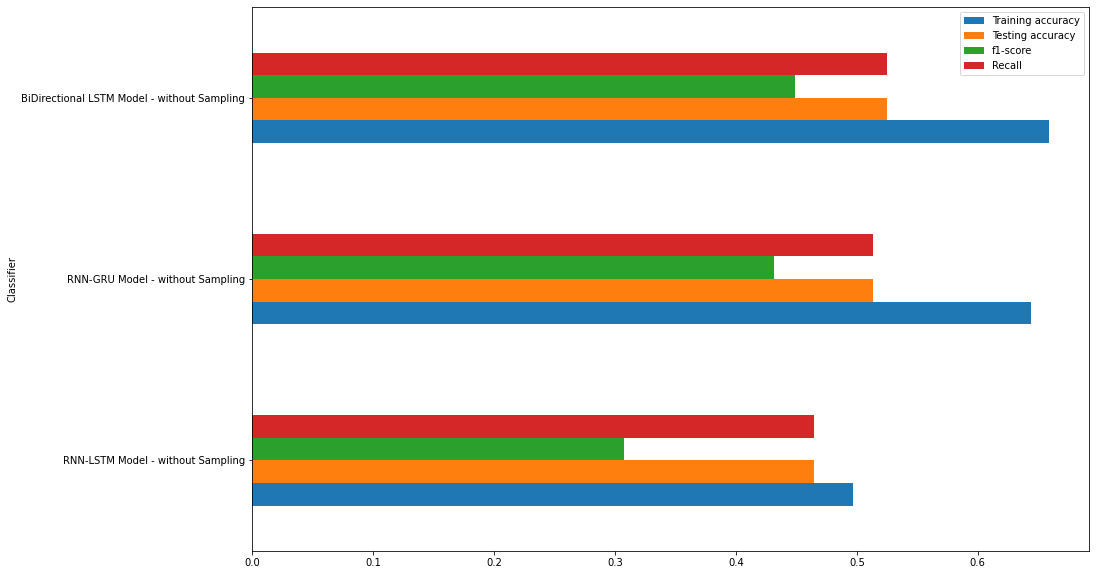

In [ ]:
logObs2.sort_values(by=['f1-score']).plot(kind='barh',figsize=[15,10])

### **Observation:**

The difference between training accuracy and testing accuracy is not high. There is scope for much improvement in deep learning models and the testing accuracies of these models look promising.

The model seems to be overfitting even with high need of tuning the model, but we still observe the overfitting already

The low accuracy is suspected to be due to imbalanced dataset used for training and testing.

We have to work upon the resampling the data to make the model work better

If we see in the above results we see that RNN-LSTM MOdel has more room to be tuned without getting overfitted

We need to explore ways to improve & fine tune the model performance without overfitting.


## **Future steps planned for deriving better results**
1. Data Imbalance Rationalisation: Data set will be resampled based on multiple approaches:

	a. Creating seperate single target group for not well represeted groups(may be with 20 or less assigned tickets) and then classify against highly represented group.
  
	b. The reclassify the group (cluster of meagre groups) in to the original groups.

	c. May be total drop off of some groups that are very sparsely represented (may be with less than 5 observations).
    
  
2. Caution to be taken for avoiding data leak between training and testing runs.
3. Hyper-parameter tuning for both Traditional ML models.
4. Playing with the learning rate to derive optimal speed and avoid minima jumps.
5. Increasing epochs for model to avoid underfitting
6. Will also try to find any new feature that is more defining to the assignment groups.
7. Increasing number of layers in Deep Learning Model
8. Increasing number of neurons in hidden layers

### **Model Improvement 2: Utilization of Resampled Training Dataset**

##### **Load Required Libraries and Define Common Functions**

In [ ]:
import warnings
# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier

# Tools & Evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

#deeplearning
from keras.models import Sequential, Model
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.layers.merge import Concatenate
from sklearn import utils
from sklearn.utils import resample

In [ ]:
log_cols=["Classifier","Training accuracy","Testing accuracy","f1-score","Recall"]

In [ ]:
import sys
# A method to train and test the model
def run_classification(Prediction_model, X_train, X_test, y_train, y_test, cbArr, arch_name=None, pipelineRequired=True, isDeepModel=False) :
  clf = Prediction_model

  if pipelineRequired :
     clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', Prediction_model),])

  if isDeepModel :
     if cbArr:
       clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=20, batch_size=200, verbose=1, callbacks=cbArr)
     else:
       clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=20, batch_size=200,verbose=1)
     # predict from the classifier
     y_pred = clf.predict(X_test)
     y_predOrginal = clf
     y_pred = np.argmax(y_pred, axis=1)
     y_train_pred = clf.predict(X_train)
     y_train_pred = np.argmax(y_train_pred, axis=1)
  else :
    clf.fit(X_train, y_train)
    # predict from the classifier
    y_pred = clf.predict(X_test)
    y_predOrginal = clf
    y_train_pred = clf.predict(X_train)

  np.set_printoptions(threshold=np.inf)
  print('Prediction Model:', Prediction_model)
  print('-'*80)
  print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
  print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
  print('-'*80)
  #print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
  cm = confusion_matrix(y_test, y_pred)
  print(cm.shape)
  print('Confusion Matrix:\n')
  print(cm)
  print("\n")
  print('-'*80)
  print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
  log_entry = []
  nameVar = ""
  nameVar = str(Prediction_model)
  predModName = []
  predModName = nameVar.split("(")[0]
  log_entry = pd.DataFrame([[predModName,accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred,average='weighted'),recall_score(y_test,y_pred,average='weighted')]], columns=log_cols)
  return log_entry, y_predOrginal

In [ ]:
# Create embedding matrix
EMBEDDING_FILE = 'glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=400000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

In [ ]:
def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("Could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
df_tranlated_inc = pd.read_csv('cleaned_data.csv')
df_tranlated_inc.head()

Assignment group  ...                                         token_desc
0            GRP_0  ...  able ad advise caller check check confirm deta...
1            GRP_0  ...  advise appear calendar correct etc kind meetin...
2            GRP_0  ...                       good can not can not log vpn
3            GRP_0  ...                         access hr page tool unable
4            GRP_0  ...                                        error skype

[5 rows x 7 columns]

In [ ]:
ticket_df = df_tranlated_inc.copy()
ticket_df.head()

Assignment group  ...                                         token_desc
0            GRP_0  ...  able ad advise caller check check confirm deta...
1            GRP_0  ...  advise appear calendar correct etc kind meetin...
2            GRP_0  ...                       good can not can not log vpn
3            GRP_0  ...                         access hr page tool unable
4            GRP_0  ...                                        error skype

[5 rows x 7 columns]

In [ ]:
ticket_dfCpy = ticket_df.copy()

In [ ]:
vola = ticket_dfCpy['Assignment group'].value_counts() >= 2
vola.reset_index()

index  Assignment group
0    GRP_0              True
1    GRP_8              True
2   GRP_24              True
3   GRP_12              True
4    GRP_9              True
..     ...               ...
69  GRP_61             False
70  GRP_70             False
71  GRP_73             False
72  GRP_35             False
73  GRP_67             False

[74 rows x 2 columns]

In [ ]:
vola = pd.DataFrame(vola)

In [ ]:
(vola[vola['Assignment group'] == False]).head(68)

Assignment group
GRP_64             False
GRP_61             False
GRP_70             False
GRP_73             False
GRP_35             False
GRP_67             False

In [ ]:
df_inc_sample2 = ticket_dfCpy[ticket_dfCpy['Assignment group'].map(ticket_dfCpy['Assignment group'].value_counts()) >= 2]

In [ ]:
df_inc_sample2

Assignment group  ...                                         token_desc
0               GRP_0  ...  able ad advise caller check check confirm deta...
1               GRP_0  ...  advise appear calendar correct etc kind meetin...
2               GRP_0  ...                       good can not can not log vpn
3               GRP_0  ...                         access hr page tool unable
4               GRP_0  ...                                        error skype
...               ...  ...                                                ...
8420           GRP_29  ...  advise afternoon come email good mail receivin...
8421            GRP_0  ...                           issue software telephony
8422            GRP_0  ...        password pedxruyf reset tifpdchb vip window
8423           GRP_62  ...  access adjustment drawer e finish funcionando ...
8424           GRP_49  ...  area can not cnc different open pc program sev...

[8419 rows x 7 columns]

In [ ]:
x2 = df_inc_sample2['cleaned_description']
y2 = df_inc_sample2['Assignment group']

In [ ]:
# Create training and test datasets with 80:20 ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2,
                                                    y2,
                                                    test_size=0.20,
                                                    random_state=13, stratify=y2)
print('\033[1mShape of the training set:\033[0m', X_train2.shape,y_train2.shape)
print('\033[1mShape of the test set:\033[0m',X_test2.shape, y_test2.shape)

Shape of the training set: (6735,) (6735,)
Shape of the test set: (1684,) (1684,)


In [ ]:
# Copy of Original X_train2 & X_test2
X_trainOrg2 = X_train2
X_testOrg2 = X_test2
# Copy of Original of y_train2 & y_test2
y_trainOrg2 = y_train2
y_testOrg2 = y_test2

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels
y_train2 = encoder.fit_transform(y_trainOrg2)
y_test2 = encoder.fit_transform(y_testOrg2)

In [ ]:
# Copy of Original X_trainOrg2 & X_testOrg2
X_trainChk2 = X_trainOrg2
X_testChk2 = X_testOrg2
# Copy of Original of y_trainOrg2 & y_testOrg2
y_trainChk2 = y_trainOrg2
y_testChk2 = y_testOrg2

#### **Grouping of Dataset based on ticket count**

The groups with tickets less than 100 are grouped into a new Group - GRP_Rare.

A new dataframe(df_sample2) is created to hold these group data separately.

The datarame "df_sample1" holds all the groups and a new column to be added where the Group Name is given as "GRP_Rare", if the corresponding record belongs to a group with ticket count <= 100.


In [ ]:
ticket_dfCpy.tail()

Assignment group  ...                                         token_desc
8420           GRP_29  ...  advise afternoon come email good mail receivin...
8421            GRP_0  ...                           issue software telephony
8422            GRP_0  ...        password pedxruyf reset tifpdchb vip window
8423           GRP_62  ...  access adjustment drawer e finish funcionando ...
8424           GRP_49  ...  area can not cnc different open pc program sev...

[5 rows x 7 columns]

In [ ]:
ticket_dfCpy['Assignment group'].value_counts()

GRP_0     3970
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_70       1
GRP_73       1
GRP_35       1
GRP_67       1
Name: Assignment group, Length: 74, dtype: int64

In [ ]:
df_sample2 = ticket_dfCpy[ticket_dfCpy['Assignment group'].map(ticket_dfCpy['Assignment group'].value_counts()) <= 100]

In [ ]:
df_sample1 = ticket_dfCpy.copy()

In [ ]:
# Group the tickets count < 100 as GRP_RARE
Ticket1 = pd.DataFrame(ticket_dfCpy['Assignment group'].value_counts())
Ticket1 = Ticket1.T
Ticket1

GRP_0  GRP_8  GRP_24  GRP_12  ...  GRP_70  GRP_73  GRP_35  GRP_67
Assignment group   3970    661     289     257  ...       1       1       1       1

[1 rows x 74 columns]

In [ ]:
df_sample1['NewGrp'] = df_sample1['Assignment group']

In [ ]:
df_sample1['GrpCount'] = ticket_dfCpy.apply(lambda row: Ticket1[row['Assignment group']] , axis=1)
df_sample1.loc[df_sample1['GrpCount'] <= 100 , "NewGrp"] = "GRP_Rare"

Sample 1: All Groups

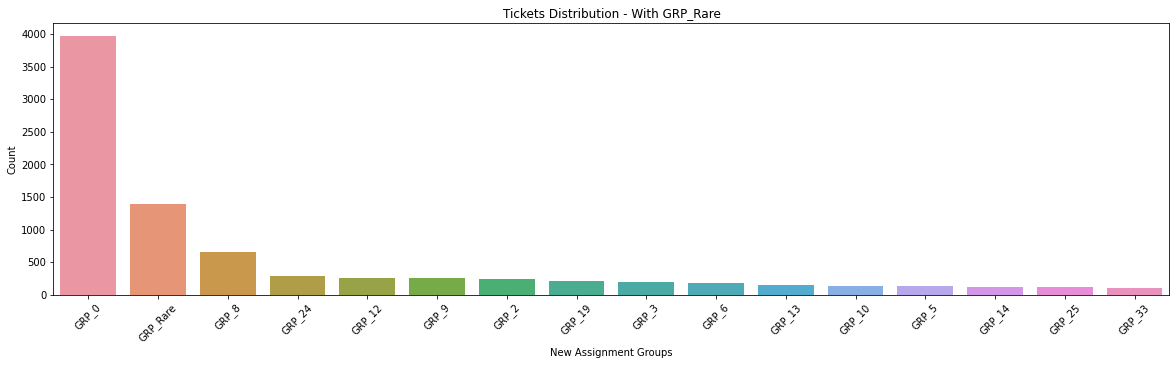

In [ ]:
plt.subplots(figsize = (20,5))

sns.countplot(x='NewGrp', data=df_sample1,order = df_sample1['NewGrp'].value_counts().index)
plt.xlabel('New Assignment Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Tickets Distribution - With GRP_Rare')

plt.show()

**Sample 2: Groups with tickets <= 100**

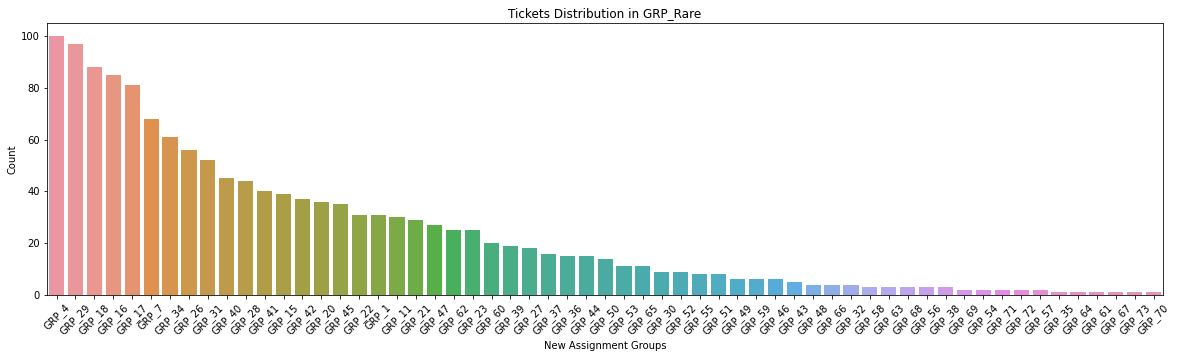

In [ ]:
plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=df_sample2,order = df_sample2['Assignment group'].value_counts().index)
plt.xlabel('New Assignment Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Tickets Distribution in GRP_Rare')

plt.show()

In [ ]:
df_sampleTmp = df_sample1.copy()

In [ ]:
df_sample1.drop(columns=['GrpCount'],inplace=True)
df_sample1.head()

Assignment group  ... NewGrp
0            GRP_0  ...  GRP_0
1            GRP_0  ...  GRP_0
2            GRP_0  ...  GRP_0
3            GRP_0  ...  GRP_0
4            GRP_0  ...  GRP_0

[5 rows x 8 columns]

#### **Resampling of Training Datasets**

In [ ]:
# Copy of Original X_trainOrg2 & X_testOrg2
print(X_trainChk2.shape)
print(X_testChk2.shape)
# Copy of Original of y_trainOrg2 & y_testOrg2
print(y_trainChk2.shape)
print(y_testChk2.shape)

(6735,)
(1684,)
(6735,)
(1684,)


In [ ]:
#combine them back for resampling
train_data = pd.concat([X_trainChk2, y_trainChk2], axis=1)

In [ ]:
maxSam = train_data['Assignment group'].value_counts().max()

In [ ]:
train_data_resampled = train_data[0:0]
for grp in train_data['Assignment group'].unique():
    itTicketGrpDF = train_data[train_data['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxSam/2), random_state=123, stratify=None)
    train_data_resampled = train_data_resampled.append(resampled)

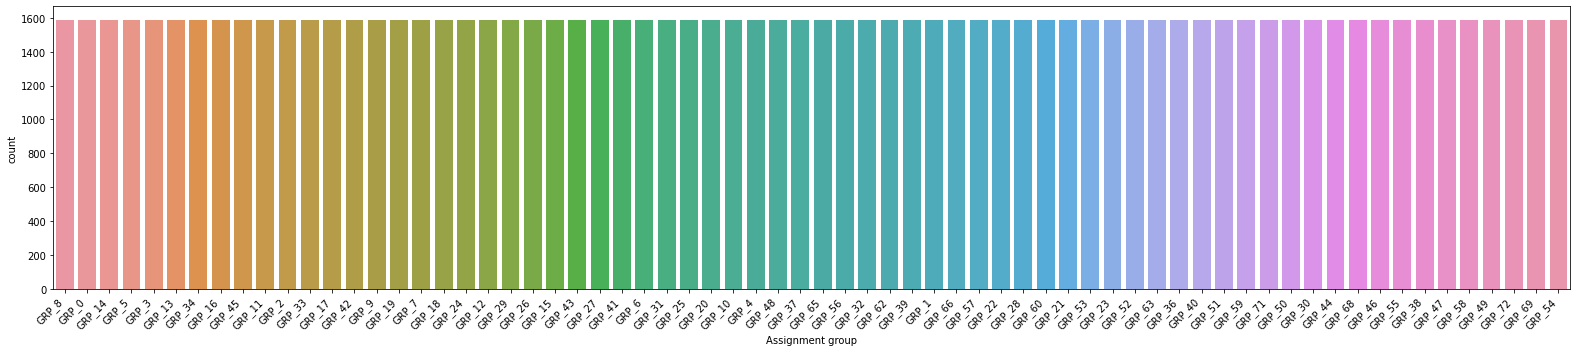

In [ ]:
descending_order = train_data_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=train_data_resampled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
X_trainChk2_smp = train_data_resampled['cleaned_description']
y_trainChk2_smp = train_data_resampled['Assignment group']

In [ ]:
print(X_trainChk2_smp.shape)
print(X_testChk2.shape)

print(y_trainChk2_smp.shape)
print(y_testChk2.shape)

(107984,)
(1684,)
(107984,)
(1684,)


#### **Traditional ML Models - with Resampling**

**Traditional ML Models considered:**

  *   Multinomial Naive Bayes
  *   K Nearest neighbor (KNN)
  *   Support Vector Machine
  *   Decision Tree
  *   Random Forest
  *   Logistic Regression
  *   Ada Boost Classifier
  *   Bagging Classifier
  *   XG Boost Classifier

##### **Multinomial Naive Bayes - with Resampling**

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels
y_trainChk2_smp = encoder.fit_transform(y_trainChk2_smp)
y_testChk2 = encoder.fit_transform(y_testChk2)

In [ ]:
log_cols=["Classifier","Training accuracy","Testing accuracy","f1-score","Recall"]
log = pd.DataFrame(columns=log_cols)

emptyArr = []
cbArr = []

In [ ]:
logTmp = []
logTmp, y_pred_MultinomialNB = run_classification(MultinomialNB(), X_trainChk2_smp, X_testChk2, y_trainChk2_smp, y_testChk2, emptyArr)
logTmp['Classifier'] = "Naive Bayes Model - with Resampling"
log = log.append(logTmp)

Prediction Model: MultinomialNB()
--------------------------------------------------------------------------------
Training accuracy: 92.32%
Testing accuracy: 32.84%
--------------------------------------------------------------------------------
(68, 68)
Confusion Matrix:

[[223   0   4  13   4   7  10   3  29  31   5  40  31   2  12   8   7   0
   15  20  33   7   7  30   3  13   1   8  11   4   9   0   2  16  20   4
    4   4   1   0   3   0   0   0   4   7   6   3  59   0   1   1   0   0
    3   0   0   3   3   1   3   5   1  15   1  34   0   0]
 [  2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  12   0   0   4   0   0   0   0   1   0   1   0   0   0   0   0
    0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  

##### **K-Nearest Neighbor (KNN) - with Resampling**

In [ ]:
logTmp = []
logTmp, y_pred_KNeighbors = run_classification(KNeighborsClassifier(weights='uniform'), X_trainChk2_smp, X_testChk2, y_trainChk2_smp, y_testChk2, emptyArr)
logTmp['Classifier'] = "KNN Model - with Resampling"
log = log.append(logTmp)

Prediction Model: KNeighborsClassifier()
--------------------------------------------------------------------------------
Training accuracy: 95.59%
Testing accuracy: 41.03%
--------------------------------------------------------------------------------
(67, 67)
Confusion Matrix:

[[424   0   3   3  14   4   4   2   9  10   2  46  38   0   4   5   2   8
   16   6  16   0   4  30   0  20   1  12  11   9   0   0   0   4   6   2
    3   0   0   0   1   0   3   0   5   9   0   2   1   0   0   0   0   0
    0   0   0   9   0   2   0   0   0  25  12   3   4]
 [  0   2   0   0   1   0   0   0   0   0   0   0   1   0   0   0   0   1
    0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0  14   0   1   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   

##### **Support Vector Machine (SVM) - with Resampling**

**Linear SVM**

In [ ]:
# SVM with Linear kernel
logTmp = []
logTmp, y_pred_LinearSVC = run_classification(LinearSVC(class_weight='balanced'), X_trainChk2_smp, X_testChk2, y_trainChk2_smp, y_testChk2, emptyArr)
logTmp['Classifier'] = "Linear SVM Model - with Resampling"
log = log.append(logTmp)

Prediction Model: LinearSVC(class_weight='balanced')
--------------------------------------------------------------------------------
Training accuracy: 95.88%
Testing accuracy: 48.16%
--------------------------------------------------------------------------------
(67, 67)
Confusion Matrix:

[[501   1   6   1  10   5   5   3  15   6   0  44  28   0   2   0   0   6
   14   6   9   2   2  28   0  12   0   7  13   2   0   0   0  13   7   0
    4   0   1   0   0   0   1   0   3   6   0   1   0   0   0   0   0   0
    0   0   0   4   0   1   0   0   0  12   8   1   4]
 [  1   3   0   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0  16   0   0   2   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    

##### **Decision Trees - with Resampling**

In [ ]:
logTmp = []
logTmp, y_pred_DecisionTree = run_classification(DecisionTreeClassifier(class_weight='balanced'), X_trainChk2_smp, X_testChk2, y_trainChk2_smp, y_testChk2, emptyArr)
logTmp['Classifier'] = "Decision Tree Model - with Resampling"
log = log.append(logTmp)

Prediction Model: DecisionTreeClassifier(class_weight='balanced')
--------------------------------------------------------------------------------
Training accuracy: 96.02%
Testing accuracy: 41.21%
--------------------------------------------------------------------------------
(67, 67)
Confusion Matrix:

[[469   0   4   8  10   3   9   1   8   1   5  27  26   6   3   7   3   6
   16  12  20  13   4  17   0   7   0   5   8   5   4   0   1   8   8   9
    5   1   0   3   0   0   1   5   1   8   3   0   0   0   1   0   0   0
    0   3   1   3   0   0   0   0   0  14   6   4   2]
 [  0   3   0   0   2   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0   7   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0

##### **Random Forest Classifier - with Resampling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

logTmp = []
logTmp, y_pred_RandomForest = run_classification(RandomForestClassifier(n_estimators=100,class_weight='balanced'), X_trainChk2_smp, X_testChk2, y_trainChk2_smp, y_testChk2, emptyArr)
logTmp['Classifier'] = "Random Forest Classifier Model - with Resampling"
log = log.append(logTmp)

Prediction Model: RandomForestClassifier(class_weight='balanced')
--------------------------------------------------------------------------------
Training accuracy: 96.02%
Testing accuracy: 55.11%
--------------------------------------------------------------------------------
(67, 67)
Confusion Matrix:

[[676   0   0   0   5   3   1   1   8   2   0  12   8   0   0   0   0   6
   13   0   3   0   3   8   0   4   0   1   3   3   0   0   0   5   1   0
    1   0   0   0   0   0   1   0   1   4   0   0   0   0   1   0   0   0
    0   1   0   1   0   0   0   0   0  12   6   0   0]
 [  2   1   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 11   0   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

##### **Logistic Regression - with Resampling**

In [ ]:
from sklearn.linear_model import LogisticRegression

logTmp = []
logTmp, y_pred_LogReg = run_classification(LogisticRegression(class_weight='balanced'), X_trainChk2_smp, X_testChk2, y_trainChk2_smp, y_testChk2, emptyArr)
logTmp['Classifier'] = "Logistic Regression Model - with Resampling"
log = log.append(logTmp)

Prediction Model: LogisticRegression(class_weight='balanced')
--------------------------------------------------------------------------------
Training accuracy: 95.40%
Testing accuracy: 47.27%
--------------------------------------------------------------------------------
(67, 67)
Confusion Matrix:

[[458   0   7   1  10   4   9   3  16   8   2  51  34   0   2   3   2   5
   17  12   7   2   3  34   0  17   0   8   9   3   0   0   0  14  10   2
    2   0   0   0   0   0   1   0   0   6   0   2   0   0   0   0   0   0
    0   0   0   3   0   0   0   0   0  16   7   0   4]
 [  1   2   0   0   1   0   0   0   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  15   0   0   3   1   0   0   0   1   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

##### **ADA Boost Classifier - with Resampling**

In [ ]:
logTmp = []
dtc = DecisionTreeClassifier(max_depth=7,class_weight='balanced')

logTmp, y_pred_AdaBoost = run_classification(AdaBoostClassifier(n_estimators= 200, base_estimator=dtc, learning_rate=0.1, random_state=22), X_trainChk2_smp, X_testChk2, y_trainChk2_smp, y_testChk2, emptyArr)
logTmp['Classifier'] = "ADA Boost Classifier Model - with Resampling"
log = log.append(logTmp)

Prediction Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=7),
                   learning_rate=0.1, n_estimators=200, random_state=22)
--------------------------------------------------------------------------------
Training accuracy: 49.97%
Testing accuracy: 32.90%
--------------------------------------------------------------------------------
(66, 66)
Confusion Matrix:

[[378   0   0   0  18   9   1   0   3   0   0  26  41   0   0   0   0 181
    5  24   0  39   0  41   0   8   0   6   1   0   0   0   0   3   0   0
    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   8   0   0   0   0   0   0   0   1]
 [  1   0   0   0   2   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   

##### **Bagging Classifier - with Resampling**

In [ ]:
logTmp = []
# dtc = DecisionTreeClassifier(max_depth=7,class_weight='balanced')
logTmp, y_pred_Bagging = run_classification(BaggingClassifier(n_estimators=100,max_samples= .7, bootstrap=True, oob_score=True, n_jobs=4, random_state=22), X_trainChk2_smp, X_testChk2, y_trainChk2_smp, y_testChk2, emptyArr)
logTmp['Classifier'] = "Bagging Classifier Model - with Resampling"
log = log.append(logTmp)

Prediction Model: BaggingClassifier(max_samples=0.7, n_estimators=100, n_jobs=4, oob_score=True,
                  random_state=22)
--------------------------------------------------------------------------------
Training accuracy: 95.99%
Testing accuracy: 41.86%
--------------------------------------------------------------------------------
(67, 67)
Confusion Matrix:

[[442   0   0  10   6   5   7   3  13   1   5  34  22   7   6   6   5   9
   19  17  25  14   1  18   0   9   0   6   5   7   6   0   1   8  13   6
    6   1   0   6   0   0   1   6   1   8   0   1   0   0   1   0   0   1
    0   1   1   2   0   0   0   0   0  11   6   3   2]
 [  2   3   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   9   0   0   1   0   0   0   0   2   0   0   0   0   0   0   0

##### **XG Boost Classifier - with Resampling**

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
logTmp = []
logTmp, y_pred_XGBoost = run_classification(XGBClassifier(n_estimators=100, max_depth=7, min_child_weight=6, colsample_bytree=0.8, subsample=0.8,n_jobs=4, learning_rate=0.1), X_trainChk2_smp, X_testChk2, y_trainChk2_smp, y_testChk2, emptyArr)
logTmp['Classifier'] = "XG Boost Classifier Model - with Resampling"
log = log.append(logTmp)

Prediction Model: XGBClassifier(colsample_bytree=0.8, max_depth=7, min_child_weight=6, n_jobs=4,
              objective='multi:softprob', subsample=0.8)
--------------------------------------------------------------------------------
Training accuracy: 95.41%
Testing accuracy: 45.13%
--------------------------------------------------------------------------------
(67, 67)
Confusion Matrix:

[[468   0   1   2  13   5  13   2  10   2   3  57  37   1   5   5   5  10
   16  15   6   3   2  32   0   6   0  10   9   4   0   0   0   8   7   2
    2   0   0   0   0   0   1   0   1   4   0   1   0   0   0   0   0   1
    0   0   0   3   2   0   0   0   0  13   6   0   1]
 [  2   2   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0  11   0   0   0   0   0   1   0   1   0  

#### **Comparison of Traditional ML Models - with Resampling**

In [ ]:
logObs = log.copy()
logObs.set_index(["Classifier"],inplace=True)
logObs.sort_values(by=['f1-score'])

Training accuracy  ...    Recall
Classifier                                                           ...          
ADA Boost Classifier Model - with Resampling               0.499750  ...  0.328979
Naive Bayes Model - with Resampling                        0.923192  ...  0.328385
Decision Tree Model - with Resampling                      0.960207  ...  0.412114
Bagging Classifier Model - with Resampling                 0.959864  ...  0.418646
KNN Model - with Resampling                                0.955855  ...  0.410333
XG Boost Classifier Model - with Resampling                0.954104  ...  0.451306
Logistic Regression Model - with Resampling                0.954002  ...  0.472684
Linear SVM Model - with Resampling                         0.958790  ...  0.481591
Random Forest Classifier Model - with Resampling           0.960207  ...  0.551069

[9 rows x 4 columns]

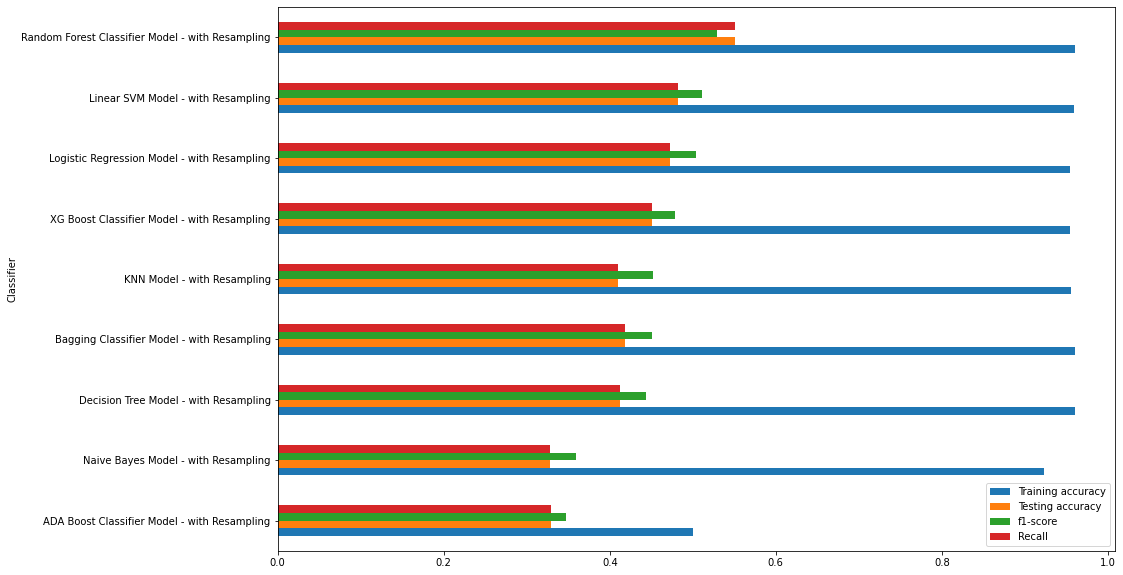

In [ ]:
logObs.sort_values(by=['f1-score']).plot(kind='barh',figsize=[15,10])

#### **Deep Learning Models - with Resampling**

**Deep Learning Models considered:**
  *   Recurrent Neural Network(RNN)-LSTM Model
  *   Recurrent Neural Network(RNN)-GRU Model
  *   Bidirectional LSTM Model

In [ ]:
from keras.layers import Embedding

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels
y_trainChk2_smp = encoder.fit_transform(y_trainChk2_smp)
y_testChk2 = encoder.fit_transform(y_testChk2)

In [ ]:
# Generate Glove embedded datasets
X_train_GloveSMP, X_test_GloveSMP, word_indexSMP, embeddings_indexSMP = loadData_Tokenizer(X_trainChk2_smp,X_testChk2,EMBEDDING_FILE)

Found 11005 unique tokens.
(109668, 800)
Total 400000 word vectors.


In [ ]:
embedding_matrixSMP = buildEmbed_matrices(word_indexSMP,EMBEDDING_DIM,embeddings_indexSMP)

In [ ]:
log_cols4=["Classifier","Training accuracy","Testing accuracy","f1-score","Recall"]
log4 = pd.DataFrame(columns=log_cols4)

##### **Recurrent Neural Network(RNN) - LSTM Model - with Resampling**

In [ ]:
# Adding callbacks
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 4)
mc = ModelCheckpoint('rnn_modelSMP.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='max')
rl = ReduceLROnPlateau(monitor='val_loss',mode='min', factor=0.2,patience=4, min_lr=0.0001)

In [ ]:
model_RNNSMP = Build_Model_RNN_Text(word_indexSMP,embedding_matrixSMP,y_trainChk2_smp,17)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 800, 200)          2201200   
_________________________________________________________________
lstm (LSTM)                  (None, 800, 100)          120400    
_________________________________________________________________
dropout (Dropout)            (None, 800, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 68)                6868      
Total params: 2,408,868
Trainable params: 2,408,868
Non-trainable params: 0
______________________________________________

In [ ]:
logTmp4 = []
cbArr = [es, mc, rl]
logTmp4, y_pred_RNNmodelSMP = run_classification(model_RNNSMP,X_train_GloveSMP, X_test_GloveSMP, y_trainChk2_smp, y_testChk2, cbArr, pipelineRequired = False,isDeepModel=True)
logTmp4['Classifier'] = "RNN-LSTM Model - with Resampling"
log4 = log4.append(logTmp4)

Epoch 1/20
540/540 [==============================] - ETA: 0s - loss: 1.2401 - accuracy: 0.7068
Epoch 00001: val_accuracy improved from -inf to 0.35333, saving model to rnn_modelSMP.h5
540/540 [==============================] - 116s 214ms/step - loss: 1.2401 - accuracy: 0.7068 - val_loss: 3.2965 - val_accuracy: 0.3533
Epoch 2/20
540/540 [==============================] - ETA: 0s - loss: 0.2577 - accuracy: 0.9290
Epoch 00002: val_accuracy improved from 0.35333 to 0.41390, saving model to rnn_modelSMP.h5
540/540 [==============================] - 114s 211ms/step - loss: 0.2577 - accuracy: 0.9290 - val_loss: 3.3387 - val_accuracy: 0.4139
Epoch 3/20
540/540 [==============================] - ETA: 0s - loss: 0.1737 - accuracy: 0.9475
Epoch 00003: val_accuracy improved from 0.41390 to 0.46615, saving model to rnn_modelSMP.h5
540/540 [==============================] - 114s 211ms/step - loss: 0.1737 - accuracy: 0.9475 - val_loss: 3.4055 - val_accuracy: 0.4662
Epoch 4/20
540/540 [==============

##### **Recurrent Neural Network(RNN) - GRU Model - with Resampling**

In [ ]:
# Adding callbacks
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 4)
mc = ModelCheckpoint('rnnGru_modelSMP.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='max')
rl = ReduceLROnPlateau(monitor='val_loss',mode = 'min', factor=0.2,patience=4, min_lr=0.0001)

In [ ]:
model_RNNGRUSMP = Build_Model_RNNGRU_Text(word_indexSMP,embedding_matrixSMP,y_trainChk2_smp,17)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 800)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 800, 200)          2201200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 800, 200)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 796, 100)          100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 100)          0         
_________________________________________________________________
gru (GRU)                    (None, 100)               60600     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

In [ ]:
logTmp4 = []
cbArr = [es, mc, rl]
logTmp4, y_pred_RNNGRUmodelSMP = run_classification(model_RNNGRUSMP, X_train_GloveSMP, X_test_GloveSMP, y_trainChk2_smp, y_testChk2, cbArr, pipelineRequired = False,isDeepModel=True)
logTmp4['Classifier'] = "RNN-GRU Model - with Resampling"
log4 = log4.append(logTmp4)

Epoch 1/20
540/540 [==============================] - ETA: 0s - loss: 1.1825 - accuracy: 0.7159
Epoch 00001: val_accuracy improved from -inf to 0.34086, saving model to rnnGru_modelSMP.h5
540/540 [==============================] - 66s 122ms/step - loss: 1.1825 - accuracy: 0.7159 - val_loss: 3.9677 - val_accuracy: 0.3409
Epoch 2/20
540/540 [==============================] - ETA: 0s - loss: 0.2542 - accuracy: 0.9237
Epoch 00002: val_accuracy improved from 0.34086 to 0.38599, saving model to rnnGru_modelSMP.h5
540/540 [==============================] - 65s 121ms/step - loss: 0.2542 - accuracy: 0.9237 - val_loss: 4.1261 - val_accuracy: 0.3860
Epoch 3/20
540/540 [==============================] - ETA: 0s - loss: 0.1813 - accuracy: 0.9423
Epoch 00003: val_accuracy did not improve from 0.38599
540/540 [==============================] - 65s 120ms/step - loss: 0.1813 - accuracy: 0.9423 - val_loss: 4.3978 - val_accuracy: 0.3836
Epoch 4/20
540/540 [==============================] - ETA: 0s - loss

##### **LSTM model (Bidirectional)  - with Sampling**

In [ ]:
len(word_indexSMP) + 1

11006

In [ ]:
# Adding callbacks
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 4)
mc = ModelCheckpoint('bidirlstm_modelSMP.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='max')
rl = ReduceLROnPlateau(monitor='val_loss',mode = 'min', factor=0.2,patience=4, min_lr=0.0001)

In [ ]:
model_BiDirLSTMSMP = Build_Model_BiDirLSTM_Text(word_indexSMP,embedding_matrixSMP,y_trainChk2_smp)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 800)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 800, 200)          2201200   
_________________________________________________________________
dropout_4 (Dropout)          (None, 800, 200)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 800, 400)          641600    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               961600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)              

In [ ]:
logTmp4 = []
cbArr = [es, mc, rl]
logTmp4, y_pred_BiDirLSTMSMP = run_classification(model_BiDirLSTMSMP, X_train_GloveSMP, X_test_GloveSMP, y_trainChk2_smp, y_testChk2, cbArr, pipelineRequired = False,isDeepModel=True)
logTmp4['Classifier'] = "BiDirectional LSTM Model - with Resampling"
log4 = log4.append(logTmp4)

Epoch 1/20
540/540 [==============================] - ETA: 0s - loss: 1.1020 - accuracy: 0.7159
Epoch 00001: val_accuracy improved from -inf to 0.32779, saving model to bidirlstm_modelSMP.h5
540/540 [==============================] - 321s 595ms/step - loss: 1.1020 - accuracy: 0.7159 - val_loss: 3.9780 - val_accuracy: 0.3278
Epoch 2/20
540/540 [==============================] - ETA: 0s - loss: 0.2503 - accuracy: 0.9217
Epoch 00002: val_accuracy improved from 0.32779 to 0.38064, saving model to bidirlstm_modelSMP.h5
540/540 [==============================] - 320s 592ms/step - loss: 0.2503 - accuracy: 0.9217 - val_loss: 4.2035 - val_accuracy: 0.3806
Epoch 3/20
540/540 [==============================] - ETA: 0s - loss: 0.1813 - accuracy: 0.9405
Epoch 00003: val_accuracy improved from 0.38064 to 0.43705, saving model to bidirlstm_modelSMP.h5
540/540 [==============================] - 319s 592ms/step - loss: 0.1813 - accuracy: 0.9405 - val_loss: 4.0558 - val_accuracy: 0.4371
Epoch 4/20
540/5

#### **Comparison of Deep Learning Models - with Resampling**

In [ ]:
logObs4 = log4.copy()
logObs4.set_index(["Classifier"],inplace=True)
logObs4.sort_values(by=['f1-score'])

Training accuracy  ...    Recall
Classifier                                                     ...          
RNN-GRU Model - with Resampling                      0.959707  ...  0.476841
RNN-LSTM Model - with Resampling                     0.959901  ...  0.505344
BiDirectional LSTM Model - with Resampling           0.959846  ...  0.525534

[3 rows x 4 columns]

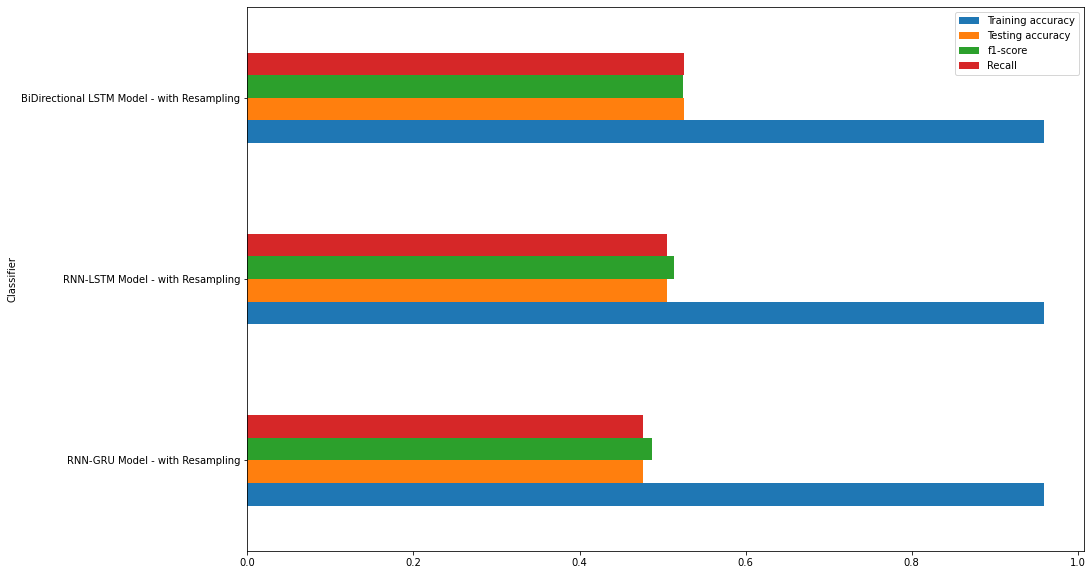

In [ ]:
logObs4.sort_values(by=['f1-score']).plot(kind='barh',figsize=[15,10])

#### **Conclusion on Model Improvement 2**

*   The performance of the models are not increasing as per expectations.
*   We have to utilize better techniques for text classifications given such datasets.
*   We have to use grouping in the datasets are divided into groups as per ranges of ticket counts.
*   We need faster and better performing text classiffication modelling technique and we have decided to use fasttext which is developed by Facebook.





### **Model Improvement 3: Utilization of Grouping and fastext**

---



---



---



In [ ]:
# Setting the current working directory
import os; os.chdir('/content/drive/My Drive/AIML/CapstoneProject/TestFolder2')

In [ ]:
os.getcwd()

'/content/drive/My Drive/AIML/CapstoneProject/TestFolder2'

In [ ]:
#Install libraries which are not available
!pip install -U imbalanced-learn
!pip install nltk rake-nltk
!pip install -U scikit-learn
!pip install six
!pip install mlrose fasttext

In [ ]:
log_cols=["Classifier","Training accuracy","Testing accuracy","f1-score","Recall"]

In [ ]:
df_tranlated_inc = pd.read_csv('cleaned_data.csv')
df_tranlated_inc.head()

Assignment group  ...                                         token_desc
0            GRP_0  ...  able ad advise caller check check confirm deta...
1            GRP_0  ...  advise appear calendar correct etc kind meetin...
2            GRP_0  ...                       good can not can not log vpn
3            GRP_0  ...                         access hr page tool unable
4            GRP_0  ...                                        error skype

[5 rows x 7 columns]

In [ ]:
ticket_df = df_tranlated_inc.copy()

In [ ]:
ticket_df = ticket_df.rename(columns={"Assignment group": "Asgn_Grp"})

In [ ]:
ticket_dfCpy = ticket_df.copy()

#### **Grouping of Dataset based on ticket count**

The groups with tickets less than 40 are grouped into a new Group - GRP_LE40 and all the other ticket categories are considered individually for final evaluation & testing.
GRP_0 is also considered individually since it has highest no of the ticket counts and quite higher than the rest.

But during the model building process, we grouped the rest of the ticket categories in to groups based on ticket counts.

New dataframes are created to hold these group data separately.

The dataframe "df_sample1" holds all the groups.


In [ ]:
ticket_dfCpy.tail()

Asgn_Grp  ...                                         token_desc
8420   GRP_29  ...  advise afternoon come email good mail receivin...
8421    GRP_0  ...                           issue software telephony
8422    GRP_0  ...        password pedxruyf reset tifpdchb vip window
8423   GRP_62  ...  access adjustment drawer e finish funcionando ...
8424   GRP_49  ...  area can not cnc different open pc program sev...

[5 rows x 7 columns]

In [ ]:
ticket_dfCpy['Asgn_Grp'].value_counts()

GRP_0     3970
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_73       1
GRP_70       1
GRP_67       1
GRP_35       1
Name: Asgn_Grp, Length: 74, dtype: int64

In [ ]:
df_sample1 = ticket_dfCpy.copy()

In [ ]:
df_sample1.head()

Asgn_Grp  ...                                         token_desc
0    GRP_0  ...  able ad advise caller check check confirm deta...
1    GRP_0  ...  advise appear calendar correct etc kind meetin...
2    GRP_0  ...                       good can not can not log vpn
3    GRP_0  ...                         access hr page tool unable
4    GRP_0  ...                                        error skype

[5 rows x 7 columns]

In [ ]:
#Ticket Counts
Ticket1 = pd.DataFrame(ticket_dfCpy['Asgn_Grp'].value_counts())
Ticket1 = Ticket1.T
Ticket1

GRP_0  GRP_8  GRP_24  GRP_12  ...  GRP_73  GRP_70  GRP_67  GRP_35
Asgn_Grp   3970    661     289     257  ...       1       1       1       1

[1 rows x 74 columns]

In [ ]:
df_sample1['GrpCount'] = ticket_dfCpy.apply(lambda row: Ticket1[row['Asgn_Grp']], axis=1)

In [ ]:
df_sample1['NewGrp1'] = df_sample1['Asgn_Grp']

In [ ]:
df_sample1.loc[df_sample1['GrpCount'] <= 662 , "NewGrp1"] = "GRP_Others1"

In [ ]:
df_sample1['NewGrp2'] = df_sample1['NewGrp1']

In [ ]:
df_sample1['NewGrp2X'] = df_sample1['NewGrp1']

In [ ]:
# df_sample1.loc[df_sample1['GrpCount'] <= 40 , "NewGrp2"] = "GRP_LE40"
df_sample1.loc[(df_sample1['GrpCount'] > 100) & (df_sample1['GrpCount'] <= 200) , "NewGrp2"] = "GRP_LE200GT100"
df_sample1.loc[(df_sample1['GrpCount'] <= 100) , "NewGrp2"] = "GRP_LE100"
df_sample1.loc[df_sample1['GrpCount'] > 289 , "NewGrp2"] = df_sample1.loc[df_sample1['GrpCount'] > 289, "Asgn_Grp"]

In [ ]:
# df_sample1.loc[df_sample1['GrpCount'] <= 40 , "NewGrp2X"] = "GRP_LE40"

In [ ]:
df_sample1.loc[(df_sample1['GrpCount'] <= 100) , "NewGrp2X"] = "GRP_LE100"
# df_sample1.loc[(df_sample1['GrpCount'] > 40) & (df_sample1['GrpCount'] <= 100) , "NewGrp2X"] = "GRP_LE100GT40"

In [ ]:
df_sample1.loc[(df_sample1['GrpCount'] > 100) & (df_sample1['GrpCount'] <= 200) , "NewGrp2X"] = "GRP_LE200GT100"

In [ ]:
df_sample1.loc[(df_sample1['GrpCount'] > 200) & (df_sample1['GrpCount'] <= 289) , "NewGrp2X"] = "GRP_LE289GT200"

In [ ]:
df_sample1.loc[df_sample1['GrpCount'] > 289 , "NewGrp2X"] = df_sample1.loc[df_sample1['GrpCount'] > 289, "Asgn_Grp"]

In [ ]:
# df_sample1.loc[df_sample1['GrpCount'] > 40 , "NewGrp2"] = df_sample1.loc[df_sample1['GrpCount'] > 40, "Asgn_Grp"]

In [ ]:
df_sample1['NewGrp3'] = df_sample1['NewGrp2X']

In [ ]:
df_sample1.loc[(df_sample1['GrpCount'] > 100) & (df_sample1['GrpCount'] <= 200) , "NewGrp3"] = "GRP_LE200GT100"
df_sample1.loc[(df_sample1['GrpCount'] > 40) & (df_sample1['GrpCount'] <= 100) , "NewGrp3"] = "GRP_LE100GT40"
df_sample1.loc[(df_sample1['GrpCount'] <= 40), "NewGrp3"] = "GRP_LE40"
df_sample1.loc[df_sample1['GrpCount'] > 200 , "NewGrp3"] = df_sample1.loc[df_sample1['GrpCount'] > 200, "Asgn_Grp"]

In [ ]:
# df_sample1.loc[df_sample1['GrpCount'] <= 10 , "NewGrp3"] = "GRP_LE10"

In [ ]:
# df_sample1.loc[df_sample1['GrpCount'] > 10 , "NewGrp3"] = df_sample1.loc[df_sample1['GrpCount'] > 10, "Asgn_Grp"]

In [ ]:
df_sample1['NewGrp4'] = df_sample1['NewGrp3']

In [ ]:
df_sample1.loc[(df_sample1['GrpCount'] > 40) & (df_sample1['GrpCount'] <= 100) , "NewGrp4"] = "GRP_LE100GT40"
df_sample1.loc[(df_sample1['GrpCount'] <= 40) , "NewGrp4"] = "GRP_LE40"
df_sample1.loc[df_sample1['GrpCount'] > 100 , "NewGrp4"] = df_sample1.loc[df_sample1['GrpCount'] > 100, "Asgn_Grp"]

In [ ]:
df_sample1['NewGrp5'] = df_sample1['NewGrp4']

In [ ]:
df_sample1.loc[df_sample1['GrpCount'] > 40 & (df_sample1['GrpCount'] <= 100) , "NewGrp5"] = "GRP_LE100GT40"
df_sample1.loc[(df_sample1['GrpCount'] <= 40), "NewGrp5"] = "GRP_LE40"

In [ ]:
df_sample1['NewGrp6'] = df_sample1['NewGrp5']

In [ ]:
df_sample1.loc[(df_sample1['GrpCount'] <= 40) , "NewGrp6"] = "GRP_LE40"
df_sample1.loc[df_sample1['GrpCount'] > 40 , "NewGrp6"] = df_sample1.loc[df_sample1['GrpCount'] > 40, "Asgn_Grp"]

In [ ]:
#df_sample2 has all groups except for "GRP_0"
df_sample2 = df_sample1[df_sample1['Asgn_Grp'] != 'GRP_0']

**Sample 1: GRP_0 vs GRP_Others1**

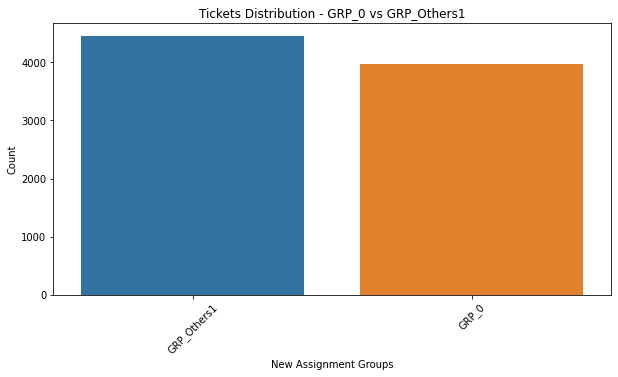

In [ ]:
plt.subplots(figsize = (10, 5))

sns.countplot(x='NewGrp1', data=df_sample1,order = df_sample1['NewGrp1'].value_counts().index)
plt.xlabel('New Assignment Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Tickets Distribution - GRP_0 vs GRP_Others1')

plt.show()

**Sample 2(df_sample2): GRP_Others1 - GRP_LE100, GRP_LE289GT200, GRP_LE200GT100 & GRP_8**

In [ ]:
df_sample2['NewGrp2X'].value_counts()

GRP_LE100         1401
GRP_LE289GT200    1254
GRP_LE200GT100    1139
GRP_8              661
Name: NewGrp2X, dtype: int64

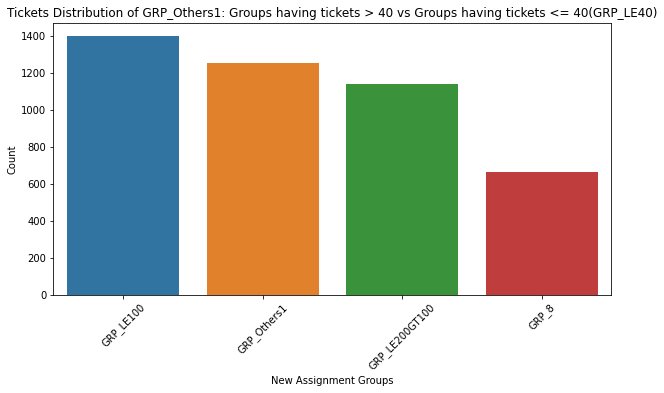

In [ ]:
plt.subplots(figsize = (10,5))

sns.countplot(x='NewGrp2', data=df_sample2,order = df_sample2['NewGrp2'].value_counts().index)
plt.xlabel('New Assignment Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Tickets Distribution of GRP_Others1: Groups having tickets > 40 vs Groups having tickets <= 40(GRP_LE40)')

plt.show()

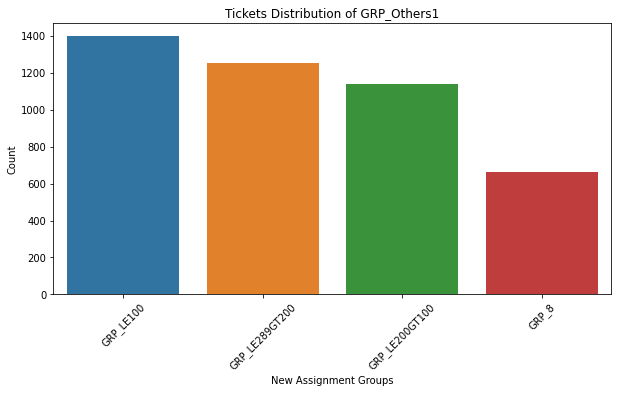

In [ ]:
plt.subplots(figsize = (10,5))

sns.countplot(x='NewGrp2X', data=df_sample2,order = df_sample2['NewGrp2X'].value_counts().index)
plt.xlabel('New Assignment Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Tickets Distribution of GRP_Others1')

plt.show()

In [ ]:
#df_sample3 has all groups having ticket counts <= 289 & > 200
df_sample3 = df_sample2[df_sample2['NewGrp2X'] == 'GRP_LE289GT200']

#df_sample4 has all groups having ticket counts <= 200 & > 100
df_sample4 = df_sample2[df_sample2['NewGrp2X'] == 'GRP_LE200GT100']

#df_sample5 has all groups having ticket counts <= 100
df_sample5 = df_sample2[df_sample2['NewGrp2X'] == 'GRP_LE100']

**Sample 3(df_sample3): In GRP_LE289GT200 - Groups with tickets counts <= 289 & > 200**

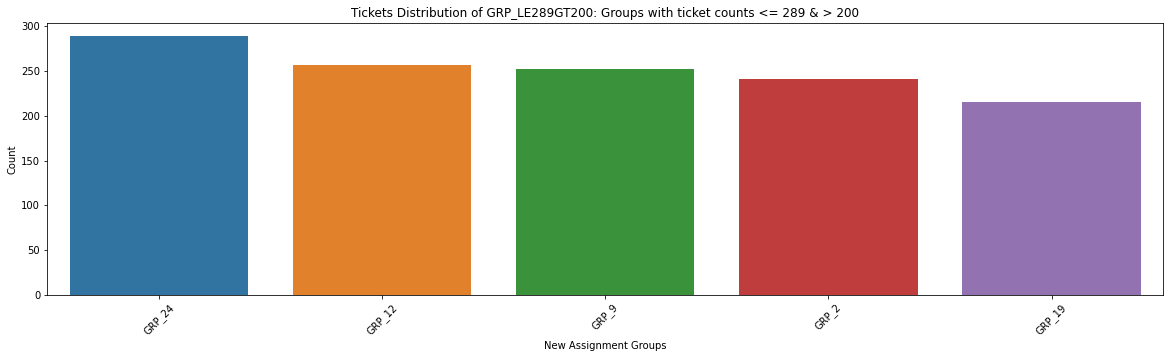

In [ ]:
plt.subplots(figsize = (20,5))

sns.countplot(x='NewGrp3', data=df_sample3,order = df_sample3['NewGrp3'].value_counts().index)
plt.xlabel('New Assignment Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Tickets Distribution of GRP_LE289GT200: Groups with ticket counts <= 289 & > 200')

plt.show()

**Sample 4(df_sample4): Groups with ticket counts <= 200 & > 100(GRP_LE200GT100)**

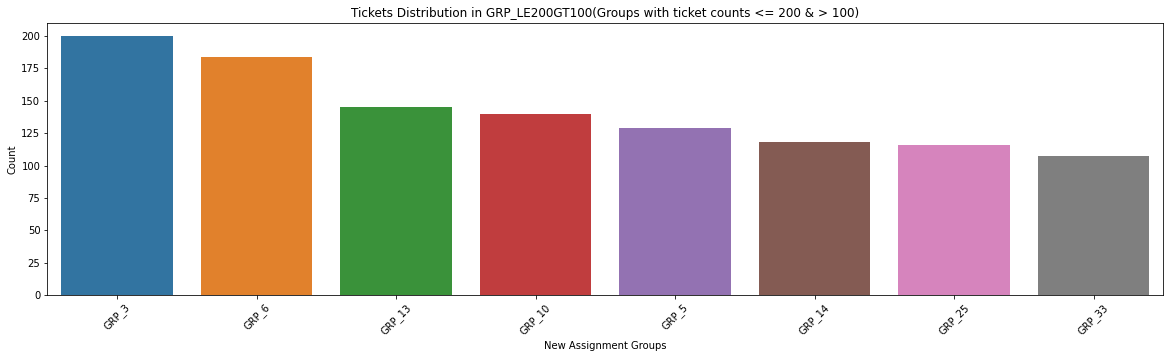

In [ ]:
plt.subplots(figsize = (20,5))

sns.countplot(x='NewGrp4', data=df_sample4,order = df_sample4['NewGrp4'].value_counts().index)
plt.xlabel('New Assignment Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Tickets Distribution in GRP_LE200GT100(Groups with ticket counts <= 200 & > 100)')

plt.show()

**Sample 5(df_sample5): Groups with ticket counts <= 100(GRP_LE100)**

In [ ]:
df_sample5['NewGrp5'].value_counts()

GRP_LE100GT40    777
GRP_LE40         624
Name: NewGrp5, dtype: int64

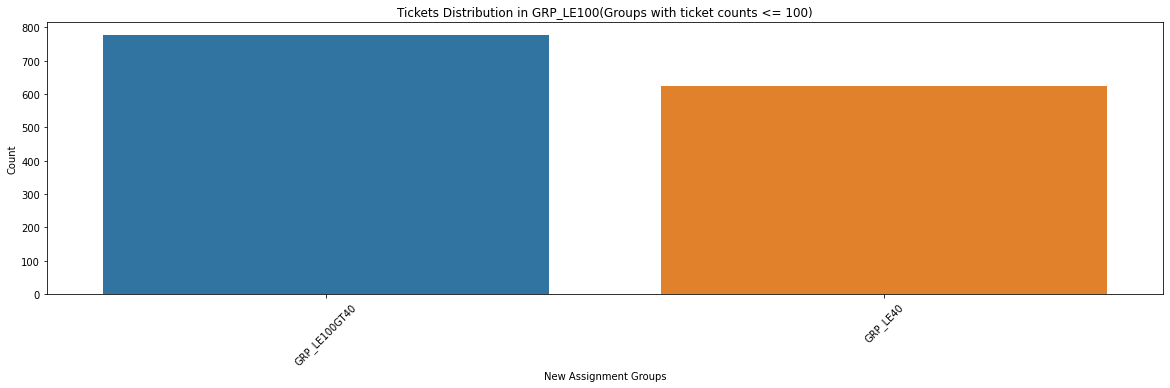

In [ ]:
plt.subplots(figsize = (20,5))

sns.countplot(x='NewGrp5', data=df_sample5, order=df_sample5['NewGrp5'].value_counts().index)
plt.xlabel('New Assignment Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Tickets Distribution in GRP_LE100(Groups with ticket counts <= 100)')

plt.show()

**Sample 6(df_sample6): Groups with ticket counts <= 100 & > 40(GRP_LE100GT40)**

In [ ]:
#df_sample6 has all groups having ticket counts <= 100 & > 40 (Groups with Ticket count < 40 has been grouped into a single gorup)
df_sample6 = df_sample5[df_sample5['NewGrp5'] == 'GRP_LE100GT40']

In [ ]:
df_sample6['NewGrp6'].value_counts()

GRP_4     100
GRP_29     97
GRP_18     88
GRP_16     85
GRP_17     81
GRP_7      68
GRP_34     61
GRP_26     56
GRP_31     52
GRP_40     45
GRP_28     44
Name: NewGrp6, dtype: int64

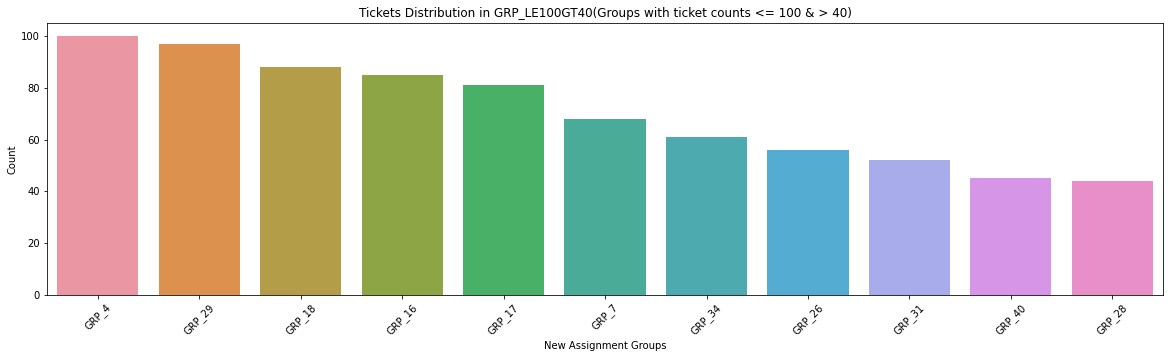

In [ ]:
plt.subplots(figsize = (20,5))

sns.countplot(x='NewGrp6', data=df_sample6, order=df_sample6['NewGrp6'].value_counts().index)
plt.xlabel('New Assignment Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Tickets Distribution in GRP_LE100GT40(Groups with ticket counts <= 100 & > 40)')

plt.show()

In [ ]:
df_sample1Tmp = df_sample1.copy()
df_sample2Tmp = df_sample2.copy()
df_sample3Tmp = df_sample3.copy()
df_sample4Tmp = df_sample4.copy()
df_sample5Tmp = df_sample5.copy()
df_sample6Tmp = df_sample6.copy()

In [ ]:
df_sample1.drop(columns=['GrpCount'],inplace=True)
df_sample2.drop(columns=['GrpCount'],inplace=True)
df_sample3.drop(columns=['GrpCount'],inplace=True)
df_sample4.drop(columns=['GrpCount'],inplace=True)
df_sample5.drop(columns=['GrpCount'],inplace=True)
df_sample6.drop(columns=['GrpCount'],inplace=True)

#### **Utilization of Classifications Techniques on df_sample1(GRP_0 vs GRP_Others1)**

In [ ]:
x1 = df_sample1['token_desc']
y1 = df_sample1['NewGrp1']

In [ ]:
y1Org = y1
x1Org = x1

In [ ]:
x1 = x1.to_numpy()
y1 = y1.to_numpy()

In [ ]:
from sklearn.model_selection import StratifiedKFold
def split_dat(x,y):
  skf = StratifiedKFold(n_splits=5, random_state=42 , shuffle=True)
  for train_index, test_index in skf.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

  return X_train, X_test, y_train, y_test

In [ ]:
X_train1, X_test1, y_train1, y_test1 = split_dat(x1,y1)

In [ ]:
X_train1 = np.asarray(X_train1)
y_train1 = np.asarray(y_train1)
X_test1 = np.asarray(X_test1)
y_test1 = np.asarray(y_test1)

In [ ]:
# Copy of Original X_train1 & X_test1
X_trainOrg1 = X_train1
X_testOrg1 = X_test1
# Copy of Original of y_train1 & y_test1
y_trainOrg1 = y_train1
y_testOrg1 = y_test1

In [ ]:
print('\033[1mShape of the df_sample1 training set:\033[0m', X_train1.shape, y_train1.shape)
print('\033[1mShape of the df_sample1 testing set:\033[0m', X_test1.shape, y_test1.shape)

Shape of the df_sample1 training set: (6740,) (6740,)
Shape of the df_sample1 testing set: (1685,) (1685,)


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [ ]:
from imblearn import under_sampling
from imblearn import over_sampling
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

##### **Classification using FastText on unsampled dataset1(df_sample1: GRP_0 vs GRP_Others1)**

In [ ]:
TrainData1 = pd.DataFrame(columns = ["Text", "Labels"])
TestData1 = pd.DataFrame(columns = ["Text", "Labels"])

In [ ]:
TrainData1['Text'] = X_train1
TrainData1['Labels'] = y_train1
TestData1['Text'] = X_test1
TestData1['Labels'] = y_test1

In [ ]:
trainLabelRR1 = []

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!cp fasttext ../
%cd ..

fatal: destination path 'fastText' already exists and is not an empty directory.
/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText
make: Nothing to be done for 'opt'.
/content/drive/My Drive/AIML/CapstoneProject/TestFolder2


In [ ]:
%cd fastText

/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText


In [ ]:
file = open("TrainData1.txt", "w+")
for i in TrainData1.index:
  line = '__label__'+str(TrainData1['Labels'][i])+' '+TrainData1['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TrainLabels1.txt", "w+")
for i in TrainData1.index:
  line = '__label__'+str(TrainData1['Labels'][i])
  trainLabelRR1.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TestData1.txt", "w+")
for i in TestData1.index:
  line = '__label__'+str(TestData1['Labels'][i])+' '+TestData1['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
testLabelRR1 = []

In [ ]:
file = open("TestLabels1.txt", "w+")
for i in TestData1.index:
  line = '__label__'+str(TestData1['Labels'][i])
  testLabelRR1.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import fasttext

In [ ]:
# fstmodelSet1 = fasttext.train_supervised(input="TrainData1.txt",lr=0.1, epoch=100, wordNgrams=2, bucket=2000000, dim=200, loss='hs', ws=2)
fstmodelSet1 = fasttext.train_supervised(input="TrainData1.txt", autotuneValidationFile="TestData1.txt")

In [ ]:
len(fstmodelSet1.get_words())

10725

In [ ]:
fstmodelSet1.test("TestData1.txt")

(1685, 0.8427299703264095, 0.8427299703264095)

In [ ]:
fstmodelSet1.save_model("fstmodelSet1.bin")

In [ ]:
fstmodelSet1 = fasttext.load_model("fstmodelSet1.bin")

In [ ]:
fstmodelSet1.predict("I am trying to install flash player and it is not working. Please help!!")

(('__label__GRP_0',), array([0.89036596]))

In [ ]:
fstmodelSet1.predict("Job scheduler is failing. please guide.")

(('__label__GRP_Others1',), array([0.99920386]))

In [ ]:
testTxtArr1 = pd.DataFrame(columns=['Text'])
txt1 = []
for i in TestData1.index:
  line = '__label__'+str(TestData1['Labels'][i])+' '+TestData1['Text'][i]
  txt1.append(line)

In [ ]:
testTxtArr1['Text'] = txt1

In [ ]:
pred_fstmodelSet1 = fstmodelSet1.predict(txt1)

In [ ]:
predArr_fstmodelSet1 = np.asarray(pred_fstmodelSet1)

In [ ]:
PredData_fstmodelSet1 = pd.DataFrame(columns = ["Labels"])

In [ ]:
PredData_fstmodelSet1["Labels"] = pred_fstmodelSet1[0]
predTxtRR1 = []

In [ ]:
file = open("PredData_fstmodelSet1.txt", "w+")
for i in PredData_fstmodelSet1.index:
  line = '__label__'+str(PredData_fstmodelSet1['Labels'][i])
  predTxtRR1.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import os
import sys

In [ ]:
import argparse
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
predFilna1 = os.getcwd() + '/PredData_fstmodelSet1.txt'
testFilna1 = os.getcwd() + '/TestLabels1.txt'

In [ ]:
(predArr_fstmodelSet1.T).shape

(1, 1685, 2)

In [ ]:
predTupT1 = (predArr_fstmodelSet1.T).reshape(1685,2)

In [ ]:
testLabelDF1 = pd.DataFrame(testLabelRR1, columns=["TestLabel"])

In [ ]:
predDF_fstmodelSet1 = pd.DataFrame(predTupT1, columns=["Pred", "Val"])

##### **Evaluation of Model set1(df-sample1: GRP_0 vs GRP_Others1)**

In [ ]:
test_labels1 = testLabelDF1.TestLabel
pred_labels1 = predDF_fstmodelSet1.Pred

In [ ]:
log_colsFST=["Classifier","Testing accuracy","f1-score","Recall"]

In [ ]:
def ModelEvalRepo(test_labels,pred_labels):
  print("Evaluation of Model set1(df-sample1: GRP_0 vs GRP_Others1)/n")
  print("\n")

  # accuracy: (tp + tn) / (p + n)
  accuracy_fstmodelSet  = accuracy_score(test_labels, pred_labels)
  print('Accuracy: %f' % accuracy_fstmodelSet)
  print("\n")

  # precision tp / (tp + fp)
  precision_fstmodelSet  = precision_score(test_labels, pred_labels, average='micro')
  print('Precision: %f' % precision_fstmodelSet)
  print("\n")

  # recall: tp / (tp + fn)
  recall_fstmodelSet  = recall_score(test_labels, pred_labels, average='micro')
  print('Recall: %f' % recall_fstmodelSet)
  print("\n")

  # f1: 2 tp / (2 tp + fp + fn)
  f1_fstmodelSet  = f1_score(test_labels, pred_labels, average='micro')
  print('F1 score: %f' % f1_fstmodelSet )
  print("\n")

  #Confusion Matrix
  print("\nConfusion Matrix:\n")
  cm_fstmodelSet = confusion_matrix(test_labels, pred_labels)
  print(cm_fstmodelSet)
  print("\n")

  #Classification Report
  print("\nClassification Report:\n")
  print(classification_report(test_labels, pred_labels))
  print("\n")
  log_entryTest = []
  predModName="FastTextModel"
  log_entryTest = pd.DataFrame([[predModName, accuracy_fstmodelSet, f1_fstmodelSet, recall_fstmodelSet]], columns=log_colsFST)
  return log_entryTest

In [ ]:
logfstModel1 =[]
logfstModel1 = ModelEvalRepo(test_labels1,pred_labels1)
logfstModel1['Classifier'] = "FastText Model1 - with Grouping"

Evaluation of Model set1(df-sample1: GRP_0 vs GRP_Others1)/n


Accuracy: 0.842730


Precision: 0.842730


Recall: 0.842730


F1 score: 0.842730



Confusion Matrix:

[[672 122]
 [143 748]]



Classification Report:

                      precision    recall  f1-score   support

      __label__GRP_0       0.82      0.85      0.84       794
__label__GRP_Others1       0.86      0.84      0.85       891

            accuracy                           0.84      1685
           macro avg       0.84      0.84      0.84      1685
        weighted avg       0.84      0.84      0.84      1685





In [ ]:
 os.chdir('/content/drive/My Drive/AIML/CapstoneProject/TestFolder2')

In [ ]:
import pickle
filename = 'logfstModel1.pic'
pickle.dump(logfstModel1, open(filename, 'wb'))

In [ ]:
log_cols4=["Classifier","Testing accuracy","f1-score","Recall"]
log4 = pd.DataFrame(columns=log_cols4)

In [ ]:
logObs4 = []

In [ ]:
logObs4 = log4.copy()

In [ ]:
logObs4 = logObs4.append(logfstModel1)

In [ ]:
logObs4

Classifier  Testing accuracy  f1-score   Recall
0  FastText Model1 - with Grouping           0.84273   0.84273  0.84273

In [ ]:
logObs4.set_index(["Classifier"],inplace=True)
logObs4.sort_values(by=['f1-score'])

Testing accuracy  f1-score   Recall
Classifier                                                          
FastText Model1 - with Grouping           0.84273   0.84273  0.84273

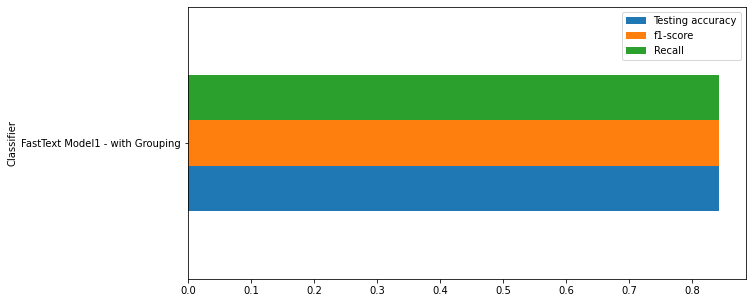

In [ ]:
logObs4.sort_values(by=['f1-score']).plot(kind='barh',figsize=[10,5])

#### **Utilization of Classifications Techniques on Sample 2(df_sample2: GRP_Others1 - GRP_LE100, GRP_LE289GT200, GRP_LE200GT100 & GRP_8)**

In [ ]:
x2 = df_sample2['token_desc']
y2 = df_sample2['NewGrp2X']

In [ ]:
y2Org = y2
x2Org = x2

In [ ]:
x2 = x2.to_numpy()
y2 = y2.to_numpy()

In [ ]:
X_train2, X_test2, y_train2, y_test2 = split_dat(x2,y2)

In [ ]:
X_train2 = np.asarray(X_train2)
y_train2 = np.asarray(y_train2)
X_test2 = np.asarray(X_test2)
y_test2 = np.asarray(y_test2)

In [ ]:
# Copy of Original X_train2 & X_test2
X_trainOrg2 = X_train2
X_testOrg2 = X_test2

# Copy of Original of y_train2 & y_test2
y_trainOrg2 = y_train2
y_testOrg2 = y_test2

In [ ]:
print('\033[1mShape of the df_sample2 training set:\033[0m', X_train2.shape, y_train2.shape)
print('\033[1mShape of the df_sample2 testing set:\033[0m', X_test2.shape, y_test2.shape)

Shape of the df_sample2 training set: (3564,) (3564,)
Shape of the df_sample2 testing set: (891,) (891,)


##### **Classification using FastText on Sample 2(df_sample2: GRP_Others1 - GRP_LE100, GRP_LE289GT200, GRP_LE200GT100 & GRP_8)**

In [ ]:
TrainData2 = pd.DataFrame(columns = ["Text", "Labels"])
TestData2 = pd.DataFrame(columns = ["Text", "Labels"])

In [ ]:
TrainData2['Text'] = X_train2
TrainData2['Labels'] = y_train2
TestData2['Text'] = X_test2
TestData2['Labels'] = y_test2

In [ ]:
%cd fastText

/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText


In [ ]:
trainLabelRR2 = []

In [ ]:
file = open("TrainData2.txt", "w+")
for i in TrainData2.index:
  line = '__label__'+str(TrainData2['Labels'][i])+' '+TrainData2['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TrainLabels2.txt", "w+")
for i in TrainData2.index:
  line = '__label__'+str(TrainData2['Labels'][i])
  trainLabelRR2.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TestData2.txt", "w+")
for i in TestData2.index:
  line = '__label__'+str(TestData2['Labels'][i])+' '+TestData2['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
testLabelRR2 = []

In [ ]:
file = open("TestLabels2.txt", "w+")
for i in TestData2.index:
  line = '__label__'+str(TestData2['Labels'][i])
  testLabelRR2.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import fasttext

In [ ]:
fstmodelSet2 = fasttext.train_supervised(input="TrainData2.txt",lr=0.1, epoch=200, wordNgrams=2, bucket=2000000, dim=100, loss='ova', ws=2)
# fstmodelSet2 = fasttext.train_supervised(input="TrainData2.txt", autotuneValidationFile="TestData2.txt")

In [ ]:
fstmodelSet2.test("TestData2.txt")

(891, 0.6632996632996633, 0.6632996632996633)

In [ ]:
fstmodelSet2.save_model("fstmodelSet2.bin")

In [ ]:
fstmodelSet2 = fasttext.load_model("fstmodelSet2.bin")

In [ ]:
testTxtArr2 = pd.DataFrame(columns=['Text'])
txt2 = []
for i in TestData2.index:
  line = '__label__'+str(TestData2['Labels'][i])+' '+TestData2['Text'][i]
  txt2.append(line)

In [ ]:
testTxtArr2['Text'] = txt2

In [ ]:
pred_fstmodelSet2 = fstmodelSet2.predict(txt2)

In [ ]:
predArr_fstmodelSet2 = np.asarray(pred_fstmodelSet2)

In [ ]:
PredData_fstmodelSet2 = pd.DataFrame(columns = ["Labels"])

In [ ]:
PredData_fstmodelSet2["Labels"] = pred_fstmodelSet2[0]
predTxtRR2 = []

In [ ]:
file = open("PredData_fstmodelSet2.txt", "w+")
for i in PredData_fstmodelSet2.index:
  line = '__label__'+str(PredData_fstmodelSet2['Labels'][i])
  predTxtRR2.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import os
import sys

In [ ]:
os.getcwd()

'/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText'

In [ ]:
predFilna2 = os.getcwd() + '/PredData_fstmodelSet2.txt'
testFilna2 = os.getcwd() + '/TestLabels2.txt'

In [ ]:
(predArr_fstmodelSet2.T).shape

(1, 891, 2)

In [ ]:
predTupT2 = (predArr_fstmodelSet2.T).reshape(891,2)

In [ ]:
testLabelDF2 = pd.DataFrame(testLabelRR2, columns=["TestLabel"])

In [ ]:
predDF_fstmodelSet2 = pd.DataFrame(predTupT2, columns=["Pred", "Val"])

##### **Evaluation of Model set2(df_sample2: GRP_Others1 - GRP_LE100, GRP_LE289GT200, GRP_LE200GT100 & GRP_8)**

In [ ]:
test_labels2 = testLabelDF2.TestLabel
pred_labels2 = predDF_fstmodelSet2.Pred

In [ ]:
log_colsFST=["Classifier","Testing accuracy","f1-score","Recall"]

In [ ]:
print("Evaluation of Model set2(df_sample2: GRP_Others1 - GRP_LE100, GRP_LE289GT200, GRP_LE200GT100 & GRP_8)/n")
print("\n")
logfstModel2 =[]
logfstModel2 = ModelEvalRepo(test_labels2,pred_labels2)
logfstModel2['Classifier'] = "FastText Model2 - with Grouping"

Evaluation of Model set2(df_sample2: GRP_Others1 - GRP_LE100, GRP_LE289GT200, GRP_LE200GT100 & GRP_8)/n


Evaluation of Model set1(df-sample1: GRP_0 vs GRP_Others1)/n


Accuracy: 0.663300


Precision: 0.663300


Recall: 0.663300


F1 score: 0.663300



Confusion Matrix:

[[103  10  10   9]
 [  7 203  36  34]
 [ 29  54 126  19]
 [ 37  38  17 159]]



Classification Report:

                         precision    recall  f1-score   support

         __label__GRP_8       0.59      0.78      0.67       132
     __label__GRP_LE100       0.67      0.72      0.69       280
__label__GRP_LE200GT100       0.67      0.55      0.60       228
__label__GRP_LE289GT200       0.72      0.63      0.67       251

               accuracy                           0.66       891
              macro avg       0.66      0.67      0.66       891
           weighted avg       0.67      0.66      0.66       891





In [ ]:
 os.chdir('/content/drive/My Drive/AIML/CapstoneProject/TestFolder2')

In [ ]:
import pickle
filename = 'logfstModel2.pic'
pickle.dump(logfstModel2, open(filename, 'wb'))

In [ ]:
log_cols=["Classifier","Testing accuracy","f1-score","Recall"]
log = pd.DataFrame(columns=log_cols)

emptyArr = []
cbArr = []

In [ ]:
log_cols5=["Classifier","Testing accuracy","f1-score","Recall"]
log5 = pd.DataFrame(columns=log_cols5)

In [ ]:
log5

Empty DataFrame
Columns: [Classifier, Testing accuracy, f1-score, Recall]
Index: []

In [ ]:
logObs5 = []

In [ ]:
logObs5 = log5.copy()

In [ ]:
logObs5 = logObs5.append(logfstModel2)

In [ ]:
logObs5

Classifier  Testing accuracy  f1-score  Recall
0  FastText Model2 - with Grouping            0.6633    0.6633  0.6633

In [ ]:
logObs5.set_index(["Classifier"],inplace=True)
logObs5.sort_values(by=['f1-score'])

Testing accuracy  f1-score  Recall
Classifier                                                         
FastText Model2 - with Grouping            0.6633    0.6633  0.6633

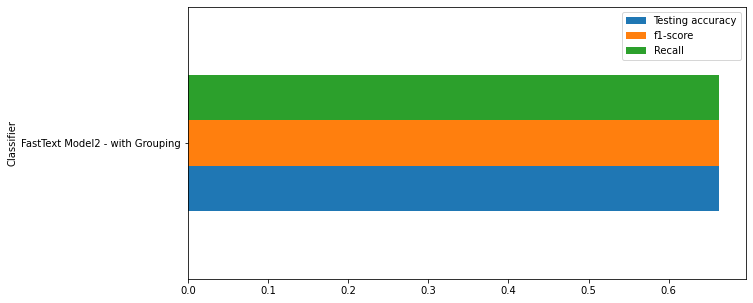

In [ ]:
logObs5.sort_values(by=['f1-score']).plot(kind='barh',figsize=[10,5])

#### **Utilization of Classifications Techniques on Sample 3(df_sample3: In GRP_LE289GT200 - Groups with tickets counts <= 289 & > 200)**

In [ ]:
x3 = df_sample3['token_desc']
y3 = df_sample3['NewGrp3']

In [ ]:
y3Org = y3
x3Org = x3

In [ ]:
x3 = x3.to_numpy()
y3 = y3.to_numpy()

In [ ]:
X_train3, X_test3, y_train3, y_test3 = split_dat(x3,y3)

In [ ]:
X_train3 = np.asarray(X_train3)
y_train3 = np.asarray(y_train3)
X_test3 = np.asarray(X_test3)
y_test3 = np.asarray(y_test3)

In [ ]:
# Copy of Original X_train3 & X_test3
X_trainOrg3 = X_train3
X_testOrg3 = X_test3
# Copy of Original of y_train3 & y_test3
y_trainOrg3 = y_train3
y_testOrg3 = y_test3

In [ ]:
print('\033[1mShape of the df_sample3 training set:\033[0m', X_train3.shape, y_train3.shape)
print('\033[1mShape of the df_sample3 testing set:\033[0m', X_test3.shape, y_test3.shape)

Shape of the df_sample3 training set: (1004,) (1004,)
Shape of the df_sample3 testing set: (250,) (250,)


##### **Classification using FastText on Sample 3(df_sample3: In GRP_LE289GT200 - Groups with tickets counts <= 289 & > 200)**

In [ ]:
TrainData3 = pd.DataFrame(columns = ["Text", "Labels"])
TestData3 = pd.DataFrame(columns = ["Text", "Labels"])

In [ ]:
TrainData3['Text'] = X_train3
TrainData3['Labels'] = y_train3
TestData3['Text'] = X_test3
TestData3['Labels'] = y_test3

In [ ]:
%cd fastText

/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText


In [ ]:
trainLabelRR3 = []

In [ ]:
file = open("TrainData3.txt", "w+")
for i in TrainData3.index:
  line = '__label__'+str(TrainData3['Labels'][i])+' '+TrainData3['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TrainLabels3.txt", "w+")
for i in TrainData3.index:
  line = '__label__'+str(TrainData3['Labels'][i])
  trainLabelRR3.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TestData3.txt", "w+")
for i in TestData3.index:
  line = '__label__'+str(TestData3['Labels'][i])+' '+TestData3['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
testLabelRR3 = []

In [ ]:
file = open("TestLabels3.txt", "w+")
for i in TestData3.index:
  line = '__label__'+str(TestData3['Labels'][i])
  testLabelRR3.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import fasttext

In [ ]:
fstmodelSet3 = fasttext.train_supervised(input="TrainData3.txt",lr=0.5, epoch=200, wordNgrams=2, bucket=2000000, dim=100, loss='ova', ws=2)
# fstmodelSet3 = fasttext.train_supervised(input="TrainData3.txt", autotuneValidationFile="TestData3.txt")

In [ ]:
fstmodelSet3.test("TestData3.txt")

(250, 0.86, 0.86)

In [ ]:
fstmodelSet3.save_model("fstmodelSet3.bin")

In [ ]:
fstmodelSet3 = fasttext.load_model("fstmodelSet3.bin")

In [ ]:
testTxtArr3 = pd.DataFrame(columns=['Text'])
txt3 = []
for i in TestData3.index:
  line = '__label__'+str(TestData3['Labels'][i])+' '+TestData3['Text'][i]
  txt3.append(line)

In [ ]:
testTxtArr3['Text'] = txt3

In [ ]:
pred_fstmodelSet3 = fstmodelSet3.predict(txt3)

In [ ]:
predArr_fstmodelSet3 = np.asarray(pred_fstmodelSet3)

In [ ]:
PredData_fstmodelSet3 = pd.DataFrame(columns = ["Labels"])

In [ ]:
PredData_fstmodelSet3["Labels"] = pred_fstmodelSet3[0]
predTxtRR3 = []

In [ ]:
file = open("PredData_fstmodelSet3.txt", "w+")
for i in PredData_fstmodelSet3.index:
  line = '__label__'+str(PredData_fstmodelSet3['Labels'][i])
  predTxtRR3.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import os
import sys

In [ ]:
os.getcwd()

'/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText'

In [ ]:
predFilna3 = os.getcwd() + '/PredData_fstmodelSet3.txt'
testFilna3 = os.getcwd() + '/TestLabels3.txt'

In [ ]:
(predArr_fstmodelSet3.T).shape

(1, 250, 2)

In [ ]:
predTupT3 = (predArr_fstmodelSet3.T).reshape(250,2)

In [ ]:
testLabelDF3 = pd.DataFrame(testLabelRR3, columns=["TestLabel"])

In [ ]:
predDF_fstmodelSet3 = pd.DataFrame(predTupT3, columns=["Pred", "Val"])

##### **Evaluation of Model set3(df_sample3: In GRP_LE289GT200 - Groups with tickets counts <= 289 & > 200)**

In [ ]:
test_labels3 = testLabelDF3.TestLabel
pred_labels3 = predDF_fstmodelSet3.Pred

In [ ]:
log_colsFST=["Classifier","Testing accuracy","f1-score","Recall"]

In [ ]:
print("Evaluation of Model set3(df_sample3: In GRP_LE289GT200 - Groups with tickets counts <= 289 & > 200)/n")
print("\n")
logfstModel3 =[]
logfstModel3 = ModelEvalRepo(test_labels3,pred_labels3)
logfstModel3['Classifier'] = "FastText Model3 - with Grouping"

Evaluation of Model set3(df_sample3: In GRP_LE289GT200 - Groups with tickets counts <= 289 & > 200)/n


Accuracy: 0.860000


Precision: 0.860000


Recall: 0.860000


F1 score: 0.860000



Confusion Matrix:

[[46  0  1  3  1]
 [ 3 32  4  4  0]
 [ 5  3 39  0  2]
 [ 1  0  1 55  0]
 [ 3  1  2  1 43]]



Classification Report:

                 precision    recall  f1-score   support

__label__GRP_12       0.79      0.90      0.84        51
__label__GRP_19       0.89      0.74      0.81        43
 __label__GRP_2       0.83      0.80      0.81        49
__label__GRP_24       0.87      0.96      0.92        57
 __label__GRP_9       0.93      0.86      0.90        50

       accuracy                           0.86       250
      macro avg       0.86      0.85      0.86       250
   weighted avg       0.86      0.86      0.86       250





In [ ]:
os.chdir('/content/drive/My Drive/AIML/CapstoneProject/TestFolder2')

In [ ]:
import pickle
filename = 'logfstModel3.pic'
pickle.dump(logfstModel3, open(filename, 'wb'))

In [ ]:
log_cols=["Classifier","Testing accuracy","f1-score","Recall"]
log = pd.DataFrame(columns=log_cols)

emptyArr = []
cbArr = []

In [ ]:
log_cols6=["Classifier","Testing accuracy","f1-score","Recall"]
log6 = pd.DataFrame(columns=log_cols6)

In [ ]:
log6

Empty DataFrame
Columns: [Classifier, Testing accuracy, f1-score, Recall]
Index: []

In [ ]:
logObs6 = []

In [ ]:
logObs6 = log6.copy()

In [ ]:
logObs6 = logObs6.append(logfstModel3)

In [ ]:
logObs6

Classifier  Testing accuracy  f1-score  Recall
0  FastText Model3 - with Grouping              0.86      0.86    0.86

In [ ]:
logObs6.set_index(["Classifier"],inplace=True)
logObs6.sort_values(by=['f1-score'])

Testing accuracy  f1-score  Recall
Classifier                                                         
FastText Model3 - with Grouping              0.86      0.86    0.86

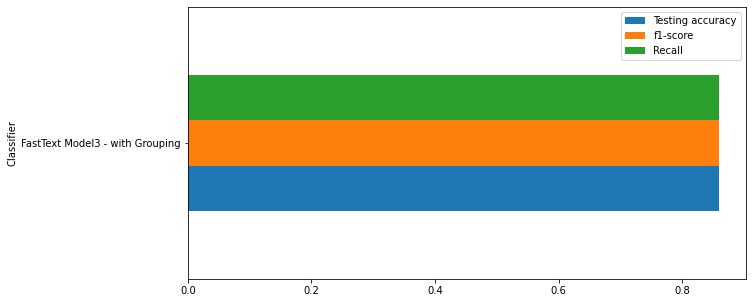

In [ ]:
logObs6.sort_values(by=['f1-score']).plot(kind='barh',figsize=[10,5])

#### **Utilization of Classifications Techniques on Sample 4(df_sample4): Groups with ticket counts <= 200 & > 100(GRP_LE200GT100)**

In [ ]:
x4 = df_sample4['token_desc']
y4 = df_sample4['NewGrp4']

In [ ]:
y4Org = y4
x4Org = x4

In [ ]:
x4 = x4.to_numpy()
y4 = y4.to_numpy()

In [ ]:
X_train4, X_test4, y_train4, y_test4 = split_dat(x4,y4)

In [ ]:
X_train4 = np.asarray(X_train4)
y_train4 = np.asarray(y_train4)
X_test4 = np.asarray(X_test4)
y_test4 = np.asarray(y_test4)

In [ ]:
# Copy of Original X_train4 & X_test4
X_trainOrg4 = X_train4
X_testOrg4 = X_test4
# Copy of Original of y_train4 & y_test4
y_trainOrg4 = y_train4
y_testOrg4 = y_test4

In [ ]:
print('\033[1mShape of the df_sample4 training set:\033[0m', X_train4.shape, y_train4.shape)
print('\033[1mShape of the df_sample4 testing set:\033[0m', X_test4.shape, y_test4.shape)

Shape of the df_sample4 training set: (912,) (912,)
Shape of the df_sample4 testing set: (227,) (227,)


##### **Classification using FastText on Sample 4(df_sample4): Groups with ticket counts <= 200 & > 100(GRP_LE200GT100)**

In [ ]:
TrainData4 = pd.DataFrame(columns = ["Text", "Labels"])
TestData4 = pd.DataFrame(columns = ["Text", "Labels"])

In [ ]:
TrainData4['Text'] = X_train4
TrainData4['Labels'] = y_train4
TestData4['Text'] = X_test4
TestData4['Labels'] = y_test4

In [ ]:
%cd fastText

[Errno 2] No such file or directory: 'fastText'
/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText


In [ ]:
trainLabelRR4 = []

In [ ]:
file = open("TrainData4.txt", "w+")
for i in TrainData4.index:
  line = '__label__'+str(TrainData4['Labels'][i])+' '+TrainData4['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TrainLabels4.txt", "w+")
for i in TrainData4.index:
  line = '__label__'+str(TrainData4['Labels'][i])
  trainLabelRR4.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TestData4.txt", "w+")
for i in TestData4.index:
  line = '__label__'+str(TestData4['Labels'][i])+' '+TestData4['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
testLabelRR4 = []

In [ ]:
file = open("TestLabels4.txt", "w+")
for i in TestData4.index:
  line = '__label__'+str(TestData4['Labels'][i])
  testLabelRR4.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import fasttext

In [ ]:
fstmodelSet4 = fasttext.train_supervised(input="TrainData4.txt",lr=0.1, epoch=50, wordNgrams=2, bucket=2000000, dim=100, loss='ova', ws=2)
# fstmodelSet4 = fasttext.train_supervised(input="TrainData4.txt", autotuneValidationFile="TestData4.txt")

In [ ]:
fstmodelSet4.test("TestData4.txt")

(227, 0.7312775330396476, 0.7312775330396476)

In [ ]:
fstmodelSet4.save_model("fstmodelSet4.bin")

In [ ]:
fstmodelSet4 = fasttext.load_model("fstmodelSet4.bin")

In [ ]:
testTxtArr4 = pd.DataFrame(columns=['Text'])
txt4 = []
for i in TestData4.index:
  line = '__label__'+str(TestData4['Labels'][i])+' '+TestData4['Text'][i]
  txt4.append(line)

In [ ]:
testTxtArr4['Text'] = txt4

In [ ]:
pred_fstmodelSet4 = fstmodelSet4.predict(txt4)

In [ ]:
predArr_fstmodelSet4 = np.asarray(pred_fstmodelSet4)

In [ ]:
PredData_fstmodelSet4 = pd.DataFrame(columns = ["Labels"])

In [ ]:
PredData_fstmodelSet4["Labels"] = pred_fstmodelSet4[0]
predTxtRR4 = []

In [ ]:
file = open("PredData_fstmodelSet4.txt", "w+")
for i in PredData_fstmodelSet4.index:
  line = '__label__'+str(PredData_fstmodelSet4['Labels'][i])
  predTxtRR4.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import os
import sys

In [ ]:
os.getcwd()

'/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText'

In [ ]:
predFilna4 = os.getcwd() + '/PredData_fstmodelSet4.txt'
testFilna4 = os.getcwd() + '/TestLabels4.txt'

In [ ]:
(predArr_fstmodelSet4.T).shape

(1, 227, 2)

In [ ]:
predTupT4 = (predArr_fstmodelSet4.T).reshape(227,2)

In [ ]:
testLabelDF4 = pd.DataFrame(testLabelRR4, columns=["TestLabel"])

In [ ]:
predDF_fstmodelSet4 = pd.DataFrame(predTupT4, columns=["Pred", "Val"])

##### **Evaluation of Model 4(df_sample4: Groups with ticket counts <= 200 & > 100(GRP_LE200GT100))**

In [ ]:
test_labels4 = testLabelDF4.TestLabel
pred_labels4 = predDF_fstmodelSet4.Pred

In [ ]:
log_colsFST=["Classifier","Testing accuracy","f1-score","Recall"]

In [ ]:
print("Evaluation of  Model 4(df_sample4: Groups with ticket counts <= 200 & > 100)/n")
print("\n")
logfstModel4 =[]
logfstModel4 = ModelEvalRepo(test_labels4,pred_labels4)
logfstModel4['Classifier'] = "FastText Model4 - with Grouping"

Evaluation of  Model 4(df_sample4: Groups with ticket counts <= 200 & > 100)/n


Accuracy: 0.731278


Precision: 0.731278


Recall: 0.731278


F1 score: 0.731278



Confusion Matrix:

[[13  8  1  0  0  0  0  6]
 [ 1 20  3  0  0  3  0  2]
 [ 1  2 17  0  2  0  2  0]
 [ 0  3  0 17  2  1  0  0]
 [ 0  0  1  0 38  1  0  0]
 [ 0  0  1  1  7 12  0  0]
 [ 0  0  1  0  1  0 17  6]
 [ 0  5  0  0  0  0  0 32]]



Classification Report:

                 precision    recall  f1-score   support

__label__GRP_10       0.87      0.46      0.60        28
__label__GRP_13       0.53      0.69      0.60        29
__label__GRP_14       0.71      0.71      0.71        24
__label__GRP_25       0.94      0.74      0.83        23
 __label__GRP_3       0.76      0.95      0.84        40
__label__GRP_33       0.71      0.57      0.63        21
 __label__GRP_5       0.89      0.68      0.77        25
 __label__GRP_6       0.70      0.86      0.77        37

       accuracy                           0.73       227


In [ ]:
os.chdir('/content/drive/My Drive/AIML/CapstoneProject/TestFolder2')

In [ ]:
import pickle
filename = 'logfstModel4.pic'
pickle.dump(logfstModel4, open(filename, 'wb'))

In [ ]:
log_cols=["Classifier","Testing accuracy","f1-score","Recall"]
log = pd.DataFrame(columns=log_cols)

emptyArr = []
cbArr = []

In [ ]:
log_cols7=["Classifier","Testing accuracy","f1-score","Recall"]
log7 = pd.DataFrame(columns=log_cols7)

In [ ]:
log7

Empty DataFrame
Columns: [Classifier, Testing accuracy, f1-score, Recall]
Index: []

In [ ]:
logObs7 = []

In [ ]:
logObs7 = log7.copy()

In [ ]:
logObs7 = logObs7.append(logfstModel4)

In [ ]:
logObs7

Classifier  Testing accuracy  f1-score    Recall
0  FastText Model4 - with Grouping          0.731278  0.731278  0.731278

In [ ]:
logObs7.set_index(["Classifier"],inplace=True)
logObs7.sort_values(by=['f1-score'])

Testing accuracy  f1-score    Recall
Classifier                                                           
FastText Model4 - with Grouping          0.731278  0.731278  0.731278

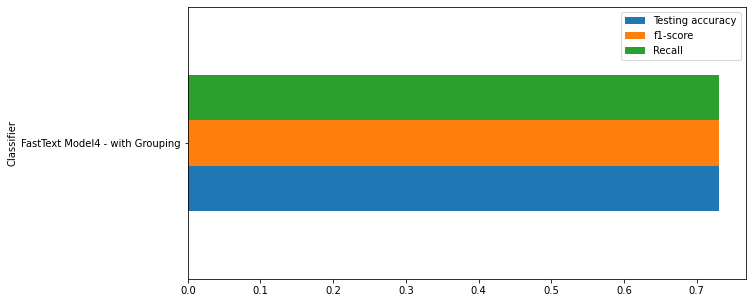

In [ ]:
logObs7.sort_values(by=['f1-score']).plot(kind='barh',figsize=[10,5])

#### **Utilization of Classifications Techniques on Sample 5(df_sample5): Groups with ticket counts <= 100(GRP_LE100)**

In [ ]:
x5 = df_sample5['token_desc']
y5 = df_sample5['NewGrp5']

In [ ]:
y5Org = y5
x5Org = x5

In [ ]:
x5 = x5.to_numpy()
y5 = y5.to_numpy()

In [ ]:
X_train5, X_test5, y_train5, y_test5 = split_dat(x5,y5)

In [ ]:
X_train5 = np.asarray(X_train5)
y_train5 = np.asarray(y_train5)
X_test5 = np.asarray(X_test5)
y_test5 = np.asarray(y_test5)

In [ ]:
# Copy of Original X_train5 & X_test5
X_trainOrg5 = X_train5
X_testOrg5 = X_test5

# Copy of Original of y_train5 & y_test5
y_trainOrg5 = y_train5
y_testOrg5 = y_test5

In [ ]:
print('\033[1mShape of the df_sample5 training set:\033[0m', X_train5.shape, y_train5.shape)
print('\033[1mShape of the df_sample5 testing set:\033[0m', X_test5.shape, y_test5.shape)

Shape of the df_sample5 training set: (1121,) (1121,)
Shape of the df_sample5 testing set: (280,) (280,)


##### **Classification using FastText on Sample 5(df_sample5: Groups with ticket counts <= 100)**

In [ ]:
TrainData5 = pd.DataFrame(columns = ["Text", "Labels"])
TestData5 = pd.DataFrame(columns = ["Text", "Labels"])

In [ ]:
TrainData5['Text'] = X_train5
TrainData5['Labels'] = y_train5
TestData5['Text'] = X_test5
TestData5['Labels'] = y_test5

In [ ]:
%cd fastText

/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText


In [ ]:
trainLabelRR5 = []

In [ ]:
file = open("TrainData5.txt", "w+")
for i in TrainData5.index:
  line = '__label__'+str(TrainData5['Labels'][i])+' '+TrainData5['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TrainLabels5.txt", "w+")
for i in TrainData5.index:
  line = '__label__'+str(TrainData5['Labels'][i])
  trainLabelRR5.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TestData5.txt", "w+")
for i in TestData5.index:
  line = '__label__'+str(TestData5['Labels'][i])+' '+TestData5['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
testLabelRR5 = []

In [ ]:
file = open("TestLabels5.txt", "w+")
for i in TestData5.index:
  line = '__label__'+str(TestData5['Labels'][i])
  testLabelRR5.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import fasttext

In [ ]:
# fstmodelSet5 = fasttext.train_supervised(input="TrainData5.txt",lr=1.0, epoch=300, wordNgrams=2, bucket=2000000, dim=200, loss='hs', ws=2)
fstmodelSet5 = fasttext.train_supervised(input="TrainData5.txt", autotuneValidationFile="TestData5.txt")

In [ ]:
fstmodelSet5.test("TestData5.txt")

(280, 0.8, 0.8)

In [ ]:
fstmodelSet5.save_model("fstmodelSet5.bin")

In [ ]:
fstmodelSet5 = fasttext.load_model("fstmodelSet5.bin")

In [ ]:
testTxtArr5 = pd.DataFrame(columns=['Text'])
txt5 = []
for i in TestData5.index:
  line = '__label__'+str(TestData5['Labels'][i])+' '+TestData5['Text'][i]
  txt5.append(line)

In [ ]:
testTxtArr5['Text'] = txt5

In [ ]:
pred_fstmodelSet5 = fstmodelSet5.predict(txt5)

In [ ]:
predArr_fstmodelSet5 = np.asarray(pred_fstmodelSet5)

In [ ]:
PredData_fstmodelSet5 = pd.DataFrame(columns = ["Labels"])

In [ ]:
PredData_fstmodelSet5["Labels"] = pred_fstmodelSet5[0]
predTxtRR5 = []

In [ ]:
file = open("PredData_fstmodelSet5.txt", "w+")
for i in PredData_fstmodelSet5.index:
  line = '__label__'+str(PredData_fstmodelSet5['Labels'][i])
  predTxtRR5.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import os
import sys

In [ ]:
os.getcwd()

'/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText'

In [ ]:
predFilna5 = os.getcwd() + '/PredData_fstmodelSet5.txt'
testFilna5 = os.getcwd() + '/TestLabels5.txt'

In [ ]:
(predArr_fstmodelSet5.T).shape

(1, 280, 2)

In [ ]:
predTupT5 = (predArr_fstmodelSet5.T).reshape(280,2)

In [ ]:
testLabelDF5 = pd.DataFrame(testLabelRR5, columns=["TestLabel"])

In [ ]:
predDF_fstmodelSet5 = pd.DataFrame(predTupT5, columns=["Pred", "Val"])

##### **Evaluation of Model 5(df_sample5: Groups with ticket counts <= 100)**

In [ ]:
test_labels5 = testLabelDF5.TestLabel
pred_labels5 = predDF_fstmodelSet5.Pred

In [ ]:
log_colsFST=["Classifier","Testing accuracy","f1-score","Recall"]

In [ ]:
print("Evaluation of  Model 5(df_sample5: Groups with ticket counts <= 100)/n")
print("\n")
logfstModel5 =[]
logfstModel5 = ModelEvalRepo(test_labels5,pred_labels5)
logfstModel5['Classifier'] = "FastText Model5 - with Grouping"

Evaluation of  Model 5(df_sample5: Groups with ticket counts <= 100)/n


Accuracy: 0.800000


Precision: 0.800000


Recall: 0.800000


F1 score: 0.800000



Confusion Matrix:

[[132  24]
 [ 32  92]]



Classification Report:

                        precision    recall  f1-score   support

__label__GRP_LE100GT40       0.80      0.85      0.83       156
     __label__GRP_LE40       0.79      0.74      0.77       124

              accuracy                           0.80       280
             macro avg       0.80      0.79      0.80       280
          weighted avg       0.80      0.80      0.80       280





In [ ]:
os.chdir('/content/drive/My Drive/AIML/CapstoneProject/TestFolder2')

In [ ]:
import pickle
filename = 'logfstModel5.pic'
pickle.dump(logfstModel5, open(filename, 'wb'))

In [ ]:
log_cols=["Classifier","Testing accuracy","f1-score","Recall"]
log = pd.DataFrame(columns=log_cols)

emptyArr = []
cbArr = []

In [ ]:
log_cols8=["Classifier","Testing accuracy","f1-score","Recall"]
log8 = pd.DataFrame(columns=log_cols8)

In [ ]:
log8

Empty DataFrame
Columns: [Classifier, Testing accuracy, f1-score, Recall]
Index: []

In [ ]:
logObs8 = []

In [ ]:
logObs8 = log8.copy()

In [ ]:
logObs8 = logObs8.append(logfstModel5)

In [ ]:
logObs8

Classifier  Testing accuracy  f1-score  Recall
0  FastText Model5 - with Grouping               0.8       0.8     0.8

In [ ]:
logObs8.set_index(["Classifier"],inplace=True)
logObs8.sort_values(by=['f1-score'])

Testing accuracy  f1-score  Recall
Classifier                                                         
FastText Model5 - with Grouping               0.8       0.8     0.8

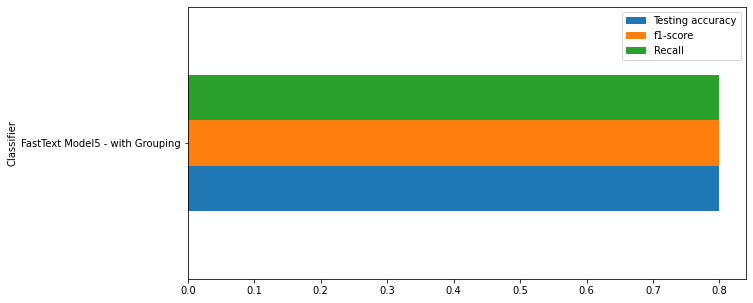

In [ ]:
logObs8.sort_values(by=['f1-score']).plot(kind='barh',figsize=[10,5])

#### **Utilization of Classifications Techniques on Sample 6(df_sample6): Groups with ticket counts <= 100 & > 40(GRP_LE100GT40)**

In [ ]:
x6 = df_sample6['token_desc']
y6 = df_sample6['NewGrp6']

In [ ]:
y6Org = y6
x6Org = x6

In [ ]:
x6 = x6.to_numpy()
y6 = y6.to_numpy()

In [ ]:
X_train6, X_test6, y_train6, y_test6 = split_dat(x6,y6)

In [ ]:
X_train6 = np.asarray(X_train6)
y_train6 = np.asarray(y_train6)
X_test6 = np.asarray(X_test6)
y_test6 = np.asarray(y_test6)

In [ ]:
# Copy of Original X_train6 & X_test6
X_trainOrg6 = X_train6
X_testOrg6 = X_test6

# Copy of Original of y_train6 & y_test6
y_trainOrg6 = y_train6
y_testOrg6 = y_test6

In [ ]:
print('\033[1mShape of the df_sample6 training set:\033[0m', X_train6.shape, y_train6.shape)
print('\033[1mShape of the df_sample6 testing set:\033[0m', X_test6.shape, y_test6.shape)

Shape of the df_sample6 training set: (622,) (622,)
Shape of the df_sample6 testing set: (155,) (155,)


##### **Classification using FastText on Sample 6(df_sample6: Groups with ticket counts <= 100 & > 40)**

In [ ]:
TrainData6 = pd.DataFrame(columns = ["Text", "Labels"])
TestData6 = pd.DataFrame(columns = ["Text", "Labels"])

In [ ]:
TrainData6['Text'] = X_train6
TrainData6['Labels'] = y_train6
TestData6['Text'] = X_test6
TestData6['Labels'] = y_test6

In [ ]:
%cd fastText

/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText


In [ ]:
trainLabelRR6 = []

In [ ]:
file = open("TrainData6.txt", "w+")
for i in TrainData6.index:
  line = '__label__'+str(TrainData6['Labels'][i])+' '+TrainData6['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TrainLabels6.txt", "w+")
for i in TrainData6.index:
  line = '__label__'+str(TrainData6['Labels'][i])
  trainLabelRR6.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
file = open("TestData6.txt", "w+")
for i in TestData6.index:
  line = '__label__'+str(TestData6['Labels'][i])+' '+TestData6['Text'][i]
  file.write(line+'\n')

file.close()

In [ ]:
testLabelRR6 = []

In [ ]:
file = open("TestLabels6.txt", "w+")
for i in TestData6.index:
  line = '__label__'+str(TestData6['Labels'][i])
  testLabelRR6.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import fasttext

In [ ]:
# fstmodelSet6 = fasttext.train_supervised(input="TrainData6.txt",lr=1.0, epoch=300, wordNgrams=2, bucket=2000000, dim=200, loss='hs', ws=2)
# fstmodelSet6 = fasttext.train_supervised(input="TrainData6.txt", autotuneValidationFile="TestData6.txt")
fstmodelSet6 = fasttext.train_supervised(input="TrainData6.txt",lr=1.0, epoch=100, wordNgrams=2, bucket=2000000, dim=100, loss='ova', ws=2)

In [ ]:
fstmodelSet6.test("TestData6.txt")

(155, 0.8, 0.8)

In [ ]:
fstmodelSet6.save_model("fstmodelSet6.bin")

In [ ]:
fstmodelSet6 = fasttext.load_model("fstmodelSet6.bin")

In [ ]:
testTxtArr6 = pd.DataFrame(columns=['Text'])
txt6 = []
for i in TestData6.index:
  line = '__label__'+str(TestData6['Labels'][i])+' '+TestData6['Text'][i]
  txt6.append(line)

In [ ]:
testTxtArr6['Text'] = txt6

In [ ]:
pred_fstmodelSet6 = fstmodelSet6.predict(txt6)

In [ ]:
predArr_fstmodelSet6 = np.asarray(pred_fstmodelSet6)

In [ ]:
PredData_fstmodelSet6 = pd.DataFrame(columns = ["Labels"])

In [ ]:
PredData_fstmodelSet6["Labels"] = pred_fstmodelSet6[0]
predTxtRR6 = []

In [ ]:
file = open("PredData_fstmodelSet6.txt", "w+")
for i in PredData_fstmodelSet6.index:
  line = '__label__'+str(PredData_fstmodelSet6['Labels'][i])
  predTxtRR6.append(line)
  file.write(line+'\n')

file.close()

In [ ]:
import os
import sys

In [ ]:
os.getcwd()

'/content/drive/My Drive/AIML/CapstoneProject/TestFolder2/fastText'

In [ ]:
predFilna6 = os.getcwd() + '/PredData_fstmodelSet6.txt'
testFilna6 = os.getcwd() + '/TestLabels6.txt'

In [ ]:
(predArr_fstmodelSet6.T).shape

(1, 155, 2)

In [ ]:
predTupT6 = (predArr_fstmodelSet6.T).reshape(155,2)

In [ ]:
testLabelDF6 = pd.DataFrame(testLabelRR6, columns=["TestLabel"])

In [ ]:
predDF_fstmodelSet6 = pd.DataFrame(predTupT6, columns=["Pred", "Val"])

##### **Evaluation of Model 6(df_sample6: Groups with ticket counts <= 100 & > 40)**

In [ ]:
test_labels6 = testLabelDF6.TestLabel
pred_labels6 = predDF_fstmodelSet6.Pred

In [ ]:
log_colsFST=["Classifier","Testing accuracy","f1-score","Recall"]

In [ ]:
print("Evaluation of  Model 6(df_sample6: Groups with ticket counts <= 100 & > 40)/n")
print("\n")
logfstModel6 =[]
logfstModel6 = ModelEvalRepo(test_labels6,pred_labels6)
logfstModel6['Classifier'] = "FastText Model6 - with Grouping"

Evaluation of  Model 6(df_sample6: Groups with ticket counts <= 100 & > 40)/n


Accuracy: 0.800000


Precision: 0.800000


Recall: 0.800000


F1 score: 0.800000



Confusion Matrix:

[[15  0  0  1  0  0  0  0  0  1  0]
 [ 0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  1  0  3  0  0  0  0  0]
 [ 1  0  0  7  1  0  0  1  1  0  0]
 [ 0  0  0  0  5  0  1  0  2  0  1]
 [ 0  0  1  0  0 17  0  0  0  1  0]
 [ 0  0  2  1  1  0  7  0  0  0  0]
 [ 0  0  1  0  0  1  0 10  0  0  0]
 [ 0  0  1  0  1  0  1  0 17  0  0]
 [ 1  0  0  1  0  0  0  0  1  6  0]
 [ 0  0  0  0  2  0  0  0  1  0 10]]



Classification Report:

                 precision    recall  f1-score   support

__label__GRP_16       0.88      0.88      0.88        17
__label__GRP_17       1.00      1.00      1.00        16
__label__GRP_18       0.74      0.78      0.76        18
__label__GRP_26       0.64      0.64      0.64        11
__label__GRP_28       0.50      0.56      0.53         9
__label__GRP_29       0.81      0.89      0.85    

In [ ]:
os.chdir('/content/drive/My Drive/AIML/CapstoneProject/TestFolder2')

In [ ]:
import pickle
filename = 'logfstModel6.pic'
pickle.dump(logfstModel6, open(filename, 'wb'))

In [ ]:
log_cols=["Classifier","Testing accuracy","f1-score","Recall"]
log = pd.DataFrame(columns=log_cols)

emptyArr = []
cbArr = []

In [ ]:
log_cols9=["Classifier","Testing accuracy","f1-score","Recall"]
log9 = pd.DataFrame(columns=log_cols9)

In [ ]:
log9

Empty DataFrame
Columns: [Classifier, Testing accuracy, f1-score, Recall]
Index: []

In [ ]:
logObs9 = []

In [ ]:
logObs9 = log9.copy()

In [ ]:
logObs9 = logObs9.append(logfstModel6)

In [ ]:
logObs9

Classifier  Testing accuracy  f1-score  Recall
0  FastText Model6 - with Grouping               0.8       0.8     0.8

In [ ]:
logObs9.set_index(["Classifier"],inplace=True)
logObs9.sort_values(by=['f1-score'])

Testing accuracy  f1-score  Recall
Classifier                                                         
FastText Model6 - with Grouping               0.8       0.8     0.8

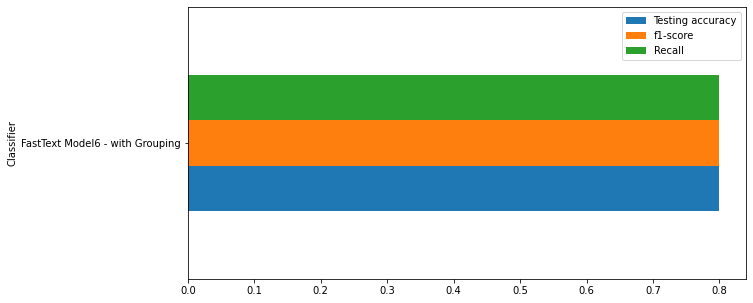

In [ ]:
logObs9.sort_values(by=['f1-score']).plot(kind='barh',figsize=[10,5])

### **All Groups Models**

In [ ]:
log_cols10=["Classifier","Testing accuracy","f1-score","Recall"]
log10 = pd.DataFrame(columns=log_cols10)

In [ ]:
log10

Empty DataFrame
Columns: [Classifier, Testing accuracy, f1-score, Recall]
Index: []

In [ ]:
logObs10 = []

In [ ]:
logObs10 = log10.copy()

In [ ]:
logObs10 = logObs10.append(logfstModel1)
logObs10 = logObs10.append(logfstModel2)
logObs10 = logObs10.append(logfstModel3)
logObs10 = logObs10.append(logfstModel4)
logObs10 = logObs10.append(logfstModel5)
logObs10 = logObs10.append(logfstModel6)

In [ ]:
logObs10

Classifier  Testing accuracy  f1-score    Recall
0  FastText Model1 - with Grouping          0.842730  0.842730  0.842730
0  FastText Model2 - with Grouping          0.663300  0.663300  0.663300
0  FastText Model3 - with Grouping          0.860000  0.860000  0.860000
0  FastText Model4 - with Grouping          0.731278  0.731278  0.731278
0  FastText Model5 - with Grouping          0.800000  0.800000  0.800000
0  FastText Model6 - with Grouping          0.800000  0.800000  0.800000

In [ ]:
logObs10.set_index(["Classifier"],inplace=True)
# logObs10.sort_values(by=['f1-score'])

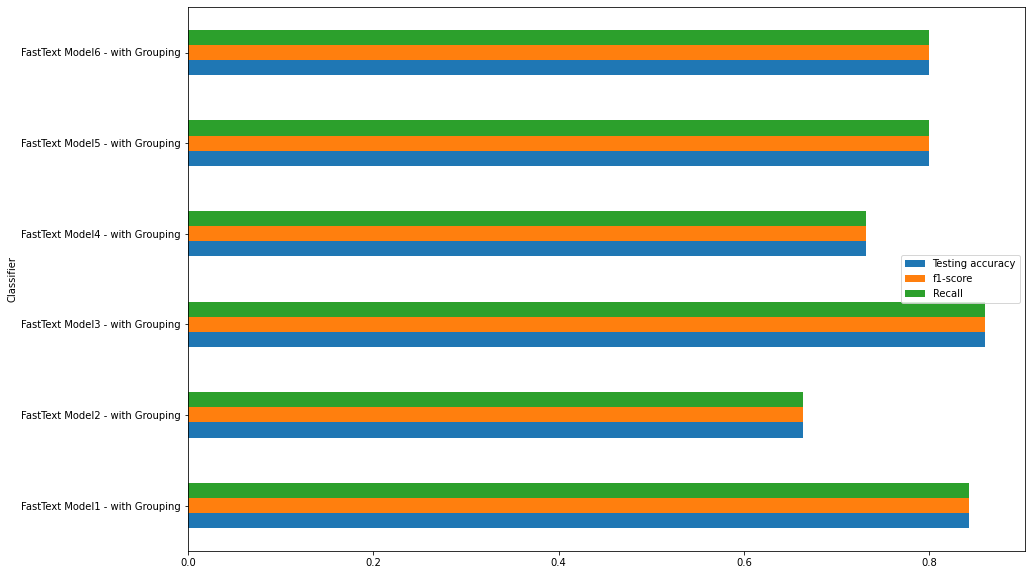

In [ ]:
logObs10.plot(kind='barh',figsize=[15,10])

### **Conclusion**

We have better results based on the grouping and fasttext modelling technique which we employed for text classification.

One could conclude from this study that text classification doesn't have definite method for building models. We have to employ several techniques and find those set of techniques which could serve our model building purpose.